<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
#from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import spacy

<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [2]:
data = pd.read_csv('training/training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [3]:
# note the seprator in this file
data_text =pd.read_csv("training/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

In [9]:
data_text.loc[data_text['TEXT'].isnull]

ID      1109
TEXT     NaN
Name: 1109, dtype: object

<h3>3.1.3. Preprocessing of text</h3>

In [106]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))

# let's add few more words with respect to this literature like results,cancer,mutation
stop_words.remove('not')
stop_words.add('cancer')
stop_words.add('results')
stop_words.add('mutations')
stop_words.add('cell')
stop_words.add('cells')
stop_words.add('variants')

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [5]:
# before pre-processing which gonna remove nouns value like The and verb like is or are let's count them first
# function to compute the count of verb and noun [[noun],[verb]]
# count of nouns in the text
# Let's understand the noun to verb ratio, if certain classes need more nouns to describe or not with respect to verb.

nlp = spacy.load('en_core_web_sm')

def compute_pos_tag(_text):
    #text = re.sub('[^A-Za-z0-9]+', '', _text)
    doc = nlp(text)
    count_n = 0
    count_v = 0
    for words in doc:
        if words.pos_ == "NOUN":
            count_n +=1
        elif words.pos_ == "VERB":
            count_v +=1
    return count_n/count_v
    

In [10]:
# countinf noun to verb ration for text before pre processing as preprocessing might distort the structure of text
from tqdm import tqdm_notebook as tqdm
import timeit

start = timeit.default_timer()
print("Counting Nouns and verbs from the sentence \n")
pos_list = []
for i in tqdm(data_text['TEXT']):
    if isinstance(i,str):
        temp = compute_pos_tag(i)
        pos_list.append(temp)
    else:
        pos_list.append(0.0)
print("POS conversion Done...")
stop = timeit.default_timer()
print('Duration: ', stop - start)  

Counting Nouns and verbs from the sentence 



POS conversion Done...
Duration:  5700.148641558001


In [107]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 30.62768800000049 seconds


In [108]:
#merging both gene_variations and text data based on ID.
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small lung nsclc heter...  
2  abstract background non small lung nsclc heter...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic monomeric casitas b lineage lymphoma...

In [109]:
result[result.isnull().any(axis=1)]

ID    Gene             Variation  Class TEXT
1109  1109   FANCA                S1088F      1  NaN
1277  1277  ARID5B  Truncating Mutations      1  NaN
1407  1407   FGFR3                 K508M      6  NaN
1639  1639    FLT1         Amplification      6  NaN
2755  2755    BRAF                 G596C      7  NaN

In [110]:
# lets check if we have previous record of same gene and variations
result[(result['Gene']=='FANCA') & (result['Variation']=='S1088F')]

ID   Gene Variation  Class TEXT
1109  1109  FANCA    S1088F      1  NaN

In [111]:
# replacing the nan text value with concat of gene and variations 
# can create a hashtable if these Gene Variation can denote some sense (requires pathologist) that could have improved 
# better as we are not introducing new information gain in data points.

result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']


In [112]:
result[result['ID']==1109]

ID   Gene Variation  Class          TEXT
1109  1109  FANCA    S1088F      1  FANCA S1088F

In [188]:
# adding noun count to result df
result['n2v_ratio'] = np.array(pos_list)


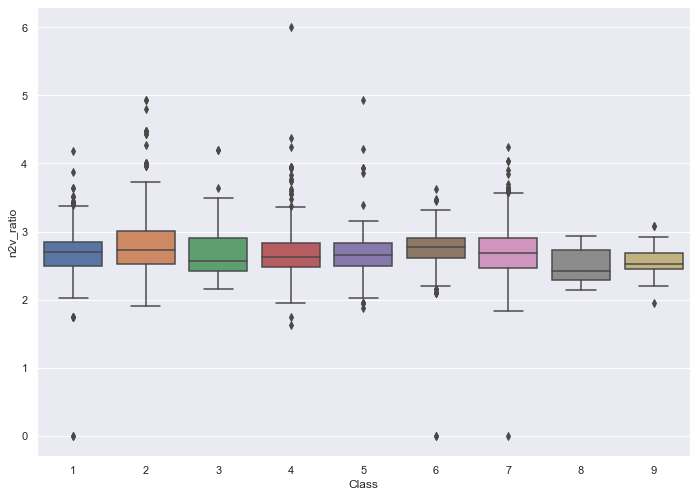

In [26]:
# Let's check the distribution by using box plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Class',y='n2v_ratio', data=result)
plt.show()

In [420]:
# adding noun count to result df
result['n2v_ratio_log'] = np.array(pos_list)


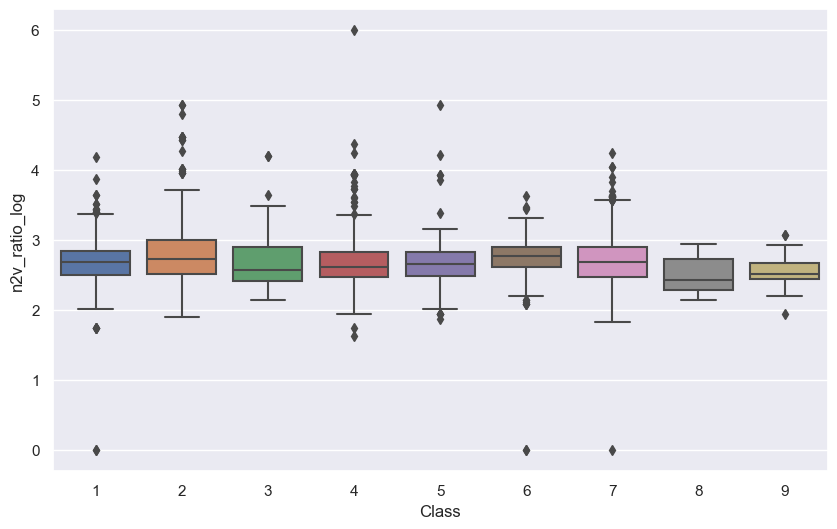

In [421]:
# # Let's check the distribution by using box plot
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x='Class',y='n2v_ratio_log', data=result)
plt.show()

We can extract the text count per class, number of unique words per class as well as freq

In [113]:
# Adding count of text in the features
result['text_count'] = result['TEXT'].map(lambda x : len(x.split()))

In [114]:
# Adding number of unique words in a text
result['unique_words'] = result['TEXT'].apply(lambda x : len(set(x.split())))
result.head(2)

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   

                                                TEXT  text_count  unique_words  
0  cyclin dependent kinases cdks regulate variety...        4271          1361  
1  abstract background non small lung nsclc heter...        3920          1308

In [115]:
result['unique_norm_words'] = result.unique_words.values / result.text_count.values 
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  text_count  \
0  cyclin dependent kinases cdks regulate variety...        4271   
1  abstract background non small lung nsclc heter...        3920   
2  abstract background non small lung nsclc heter...        3920   
3  recent evidence demonstrated acquired uniparen...        3695   
4  oncogenic monomeric casitas b lineage lymphoma...        3995   

   unique_words  unique_norm_words  
0          1361           0.318661  
1          1308           0.333673  
2          1308           0.333673  
3          1310           0.354533  
4          1357           0.339675

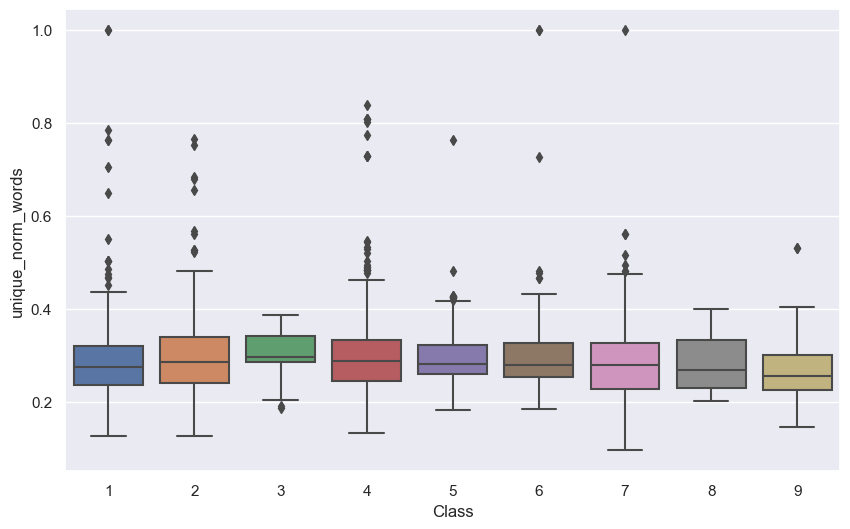

In [117]:
# Let's check the distribution by using box plot
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x='Class',y='unique_norm_words', data=result)
plt.show()

In [118]:
result['unique_norm_words_log'] = np.log(result['unique_norm_words'])
result.head(2)

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   

                                                TEXT  text_count  \
0  cyclin dependent kinases cdks regulate variety...        4271   
1  abstract background non small lung nsclc heter...        3920   

   unique_words  unique_norm_words  unique_norm_words_log  
0          1361           0.318661              -1.143628  
1          1308           0.333673              -1.097592

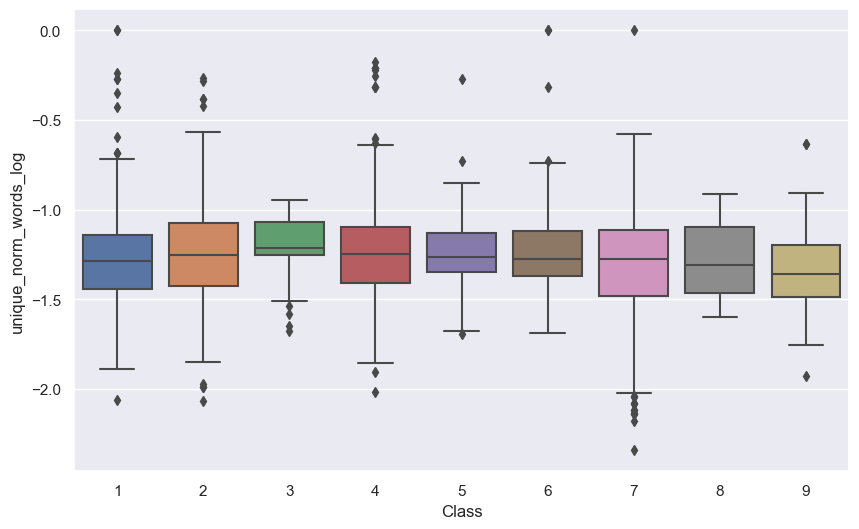

In [119]:
# Let's check the distribution by using box plot
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x='Class',y='unique_norm_words_log', data=result)
plt.show()

As We can see the variance or spread of this variables has been increased by applying log transformations and it has penalized the extreme values. So we will be going with the log transformation of the above plotted feature.

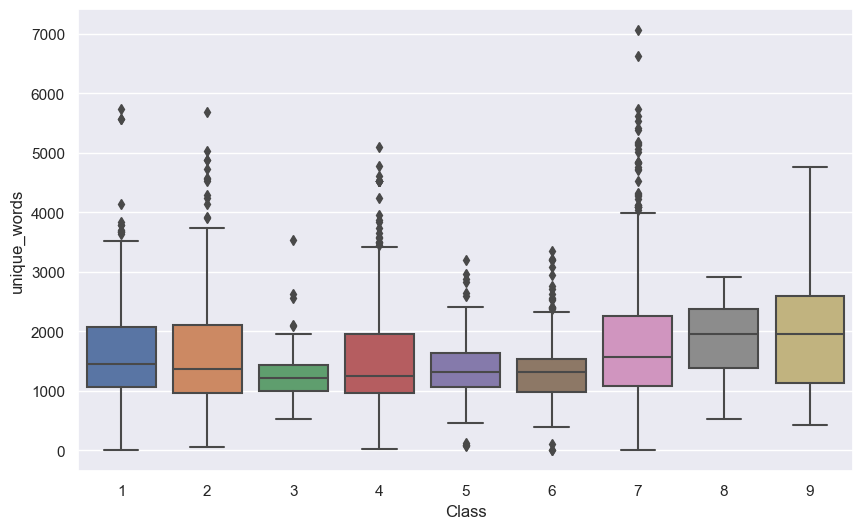

In [120]:
# Let's check the distribution by using box plot
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x='Class',y='unique_words', data=result)
plt.show()

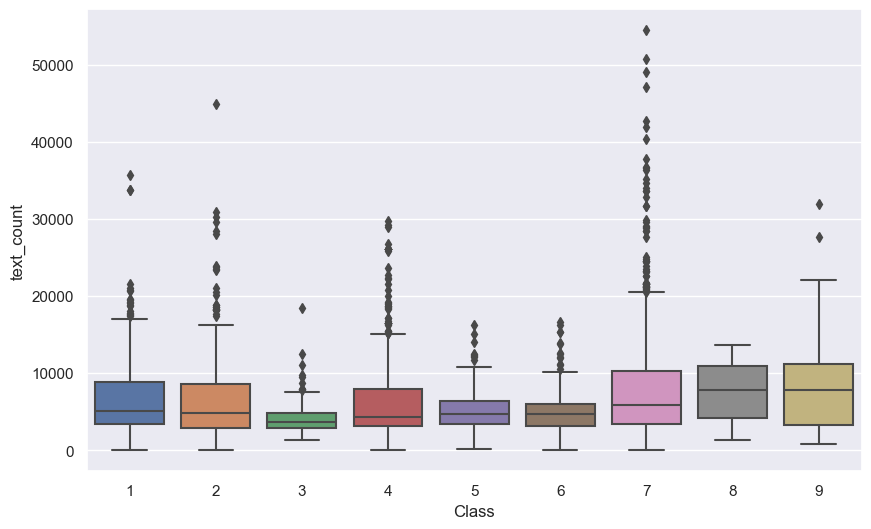

In [121]:
# Let's check the distribution by using box plot
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x='Class',y='text_count', data=result)
plt.show()

In [122]:
# word_length for word available in Text data
result['word_length'] = result['TEXT'].map(lambda x: np.mean(np.array([len(w) for w in str(x).split()])))

# char length for variation as variation feature seems to be unstable (almost unique)
result['var_length'] = result['Variation'].map(lambda x: len(x))

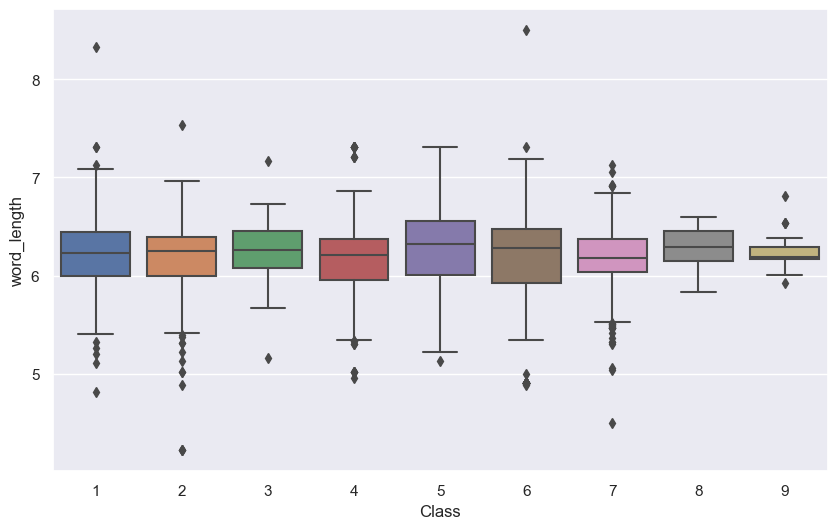

In [123]:
# Let's check the distribution by using box plot
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x='Class',y='word_length', data=result)
plt.show()

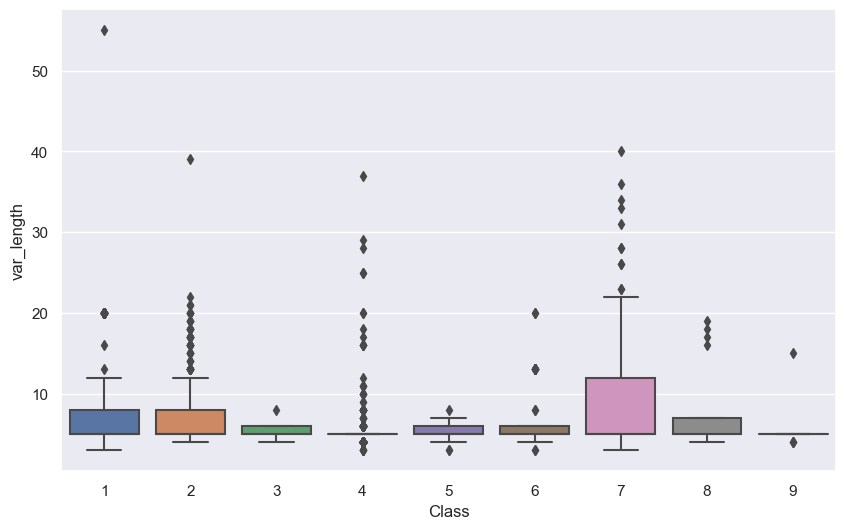

In [124]:
# Let's check the distribution by using box plot
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x='Class',y='var_length', data=result)
plt.show()

In [194]:
plt.style.use('default')

In [424]:
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating_Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  text_count  \
0  cyclin dependent kinases cdks regulate variety...        4271   
1  abstract background non small lung nsclc heter...        3920   
2  abstract background non small lung nsclc heter...        3920   
3  recent evidence demonstrated acquired uniparen...        3695   
4  oncogenic monomeric casitas b lineage lymphoma...        3995   

   unique_words  unique_norm_words  unique_norm_words_log  word_length  \
0          1361           0.318661              -1.143628     6.054554   
1          1308           0.333673              -1.097592     5.654082   
2          1308           0.333673              -1.097592     5.654082   
3          1310           0.354533              -1.036953     6.242219   
4          1357           0.339675              -1.079767     6.342929   

   var_length  n2v_ratio  
0          20   2.303519  
1           5   2.748682  
2           5   2.748682  
3           5   2.733706  
4           5   2.281633

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [196]:
y_true = result['Class'].values
result.Gene = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output variable 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [197]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

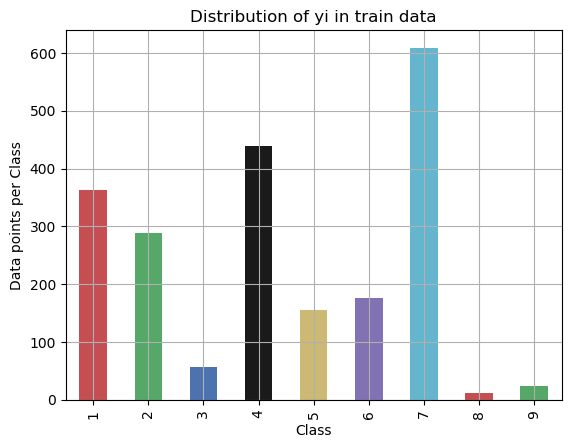

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


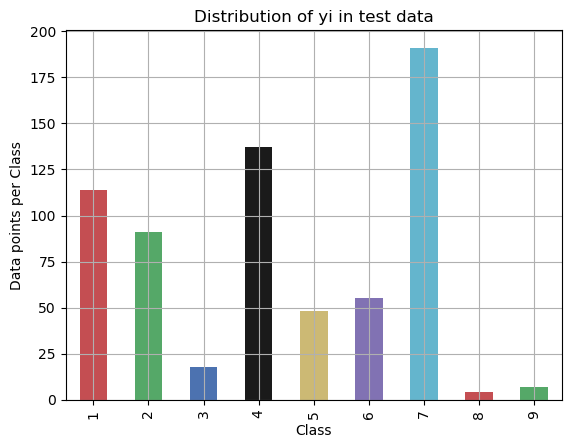

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


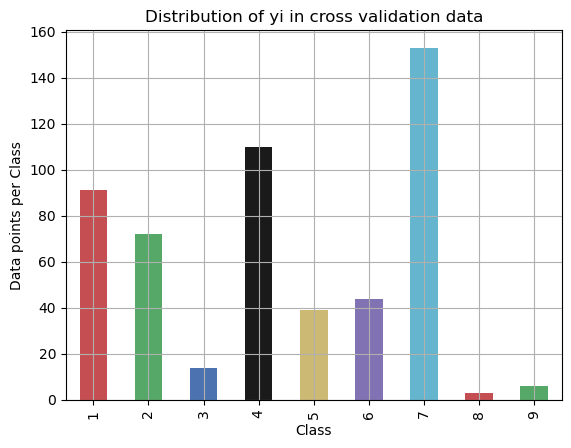

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [198]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

# Make a list by cycling through the colors you care about
# to match the length of your data.
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar',color=[x for x in my_colors])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar',color=[x for x in my_colors])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar',color=[x for x in my_colors])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [199]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    #Recall
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    # precision
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.493448795788133
Log loss on Test Data using Random Model 2.536092402894081
-------------------- Confusion matrix --------------------


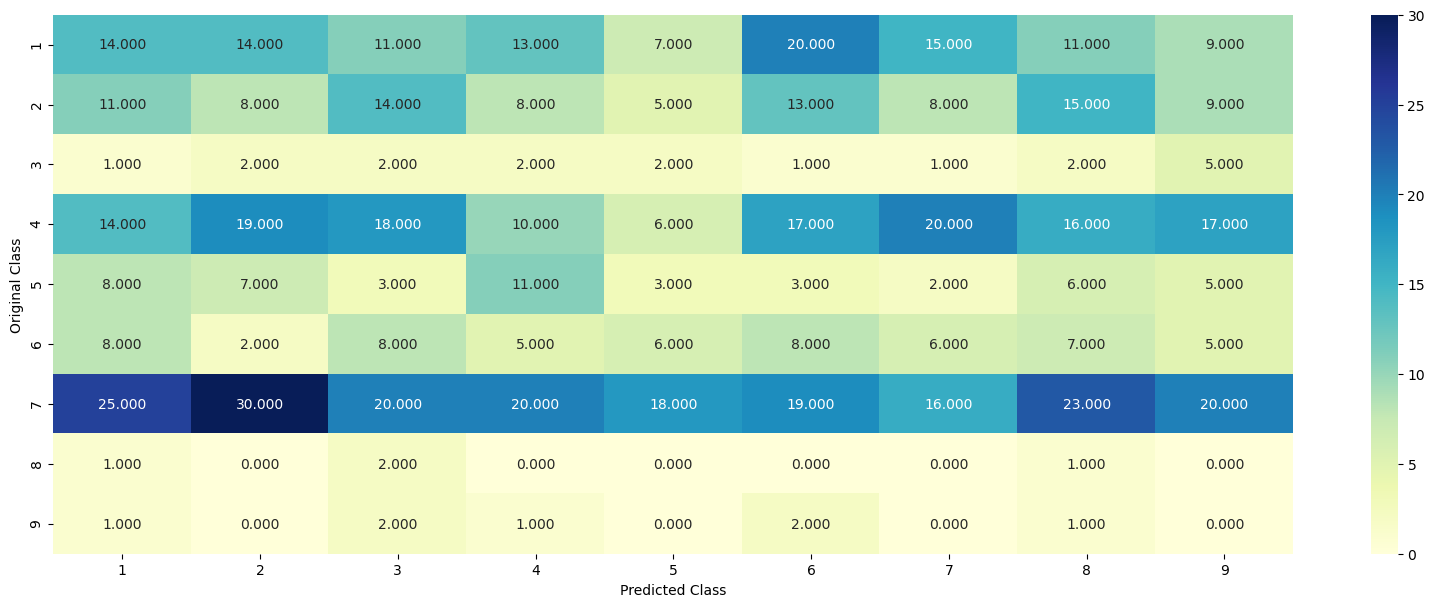

-------------------- Precision matrix (Columm Sum=1) --------------------


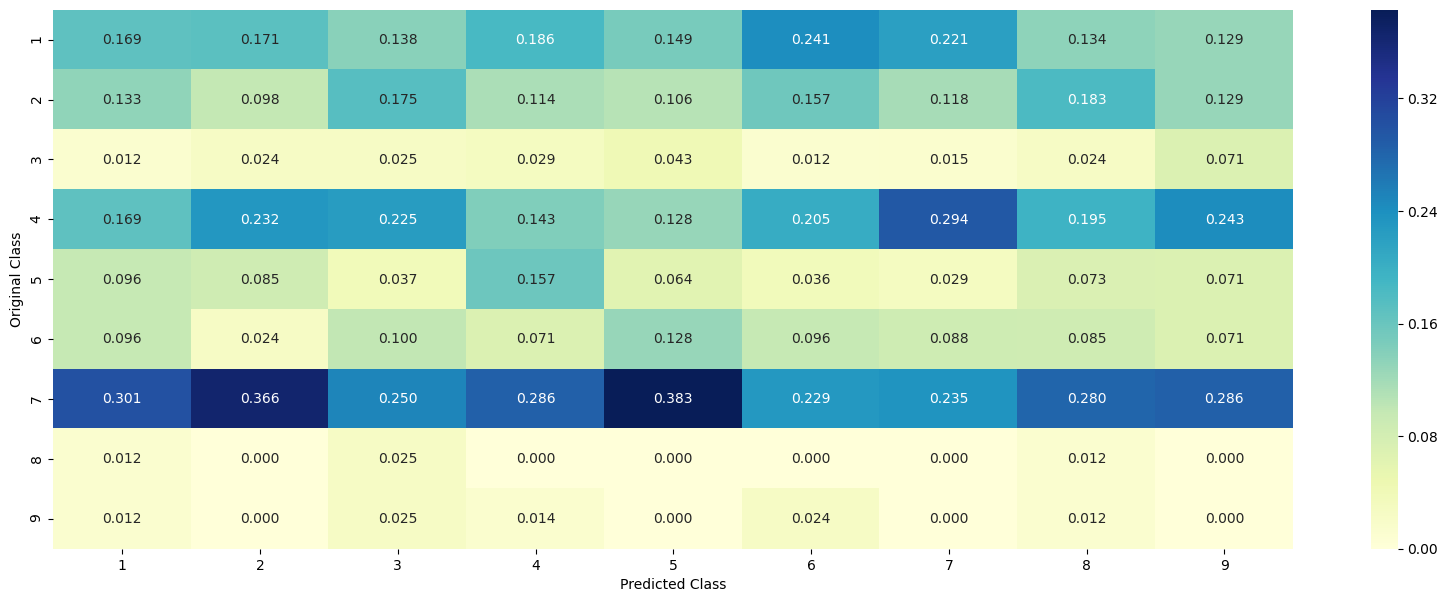

-------------------- Recall matrix (Row sum=1) --------------------


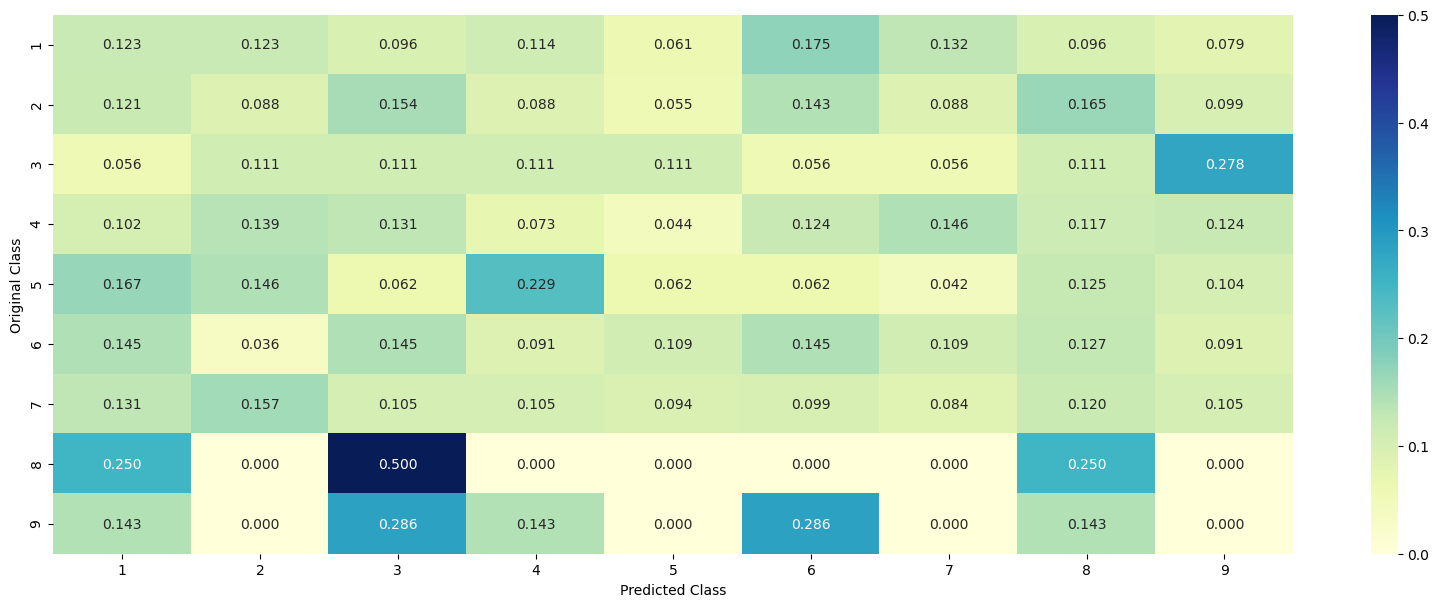

In [200]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [201]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene variation Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)] #i is label
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    # Not effiecient though as we have to calculate everytime probality 
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [202]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 228
BRCA1     157
TP53      102
EGFR       81
BRCA2      80
PTEN       74
KIT        72
BRAF       66
ALK        45
PDGFRA     43
PIK3CA     40
Name: Gene, dtype: int64


In [203]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)


Ans: There are 228 different categories of genes in the train data, and they are distibuted as follows


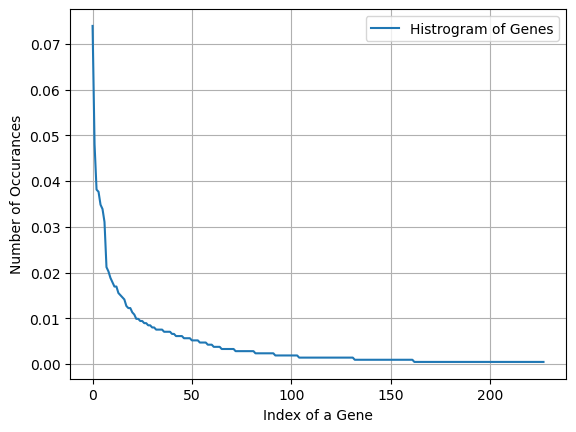

In [204]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid(True)
plt.show()


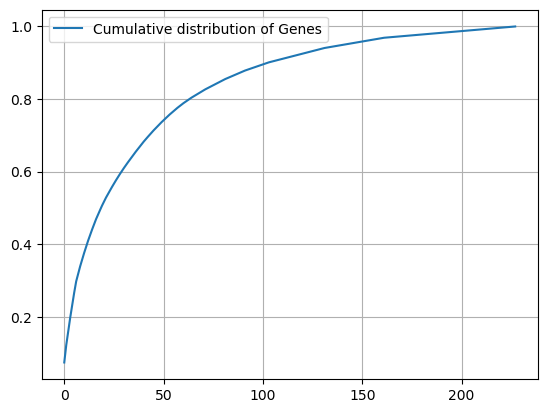

In [205]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid(True)
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [206]:
# response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [207]:
train_df.shape

(2124, 13)

In [208]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)


train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [209]:
# one-hot encoding of Gene feature using countvectorizer
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [210]:
gene_vectorizer.get_feature_names()[:10]

['abl1', 'acvr1', 'ago2', 'akt1', 'akt2', 'akt3', 'alk', 'apc', 'ar', 'araf']

In [211]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)


train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 227)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.1732289172617043
For values of alpha =  0.0001 The log loss is: 1.1575181517644881
For values of alpha =  0.001 The log loss is: 1.1985247175823421
For values of alpha =  0.01 The log loss is: 1.3021614333751688
For values of alpha =  0.1 The log loss is: 1.381924343172357
For values of alpha =  1 The log loss is: 1.4219156346206583


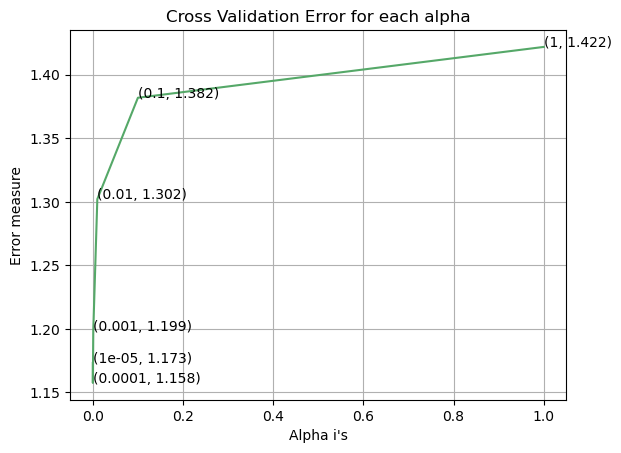

For values of best alpha =  0.0001 The train log loss is: 1.007266590679965
For values of best alpha =  0.0001 The cross validation log loss is: 1.1575181517644881
For values of best alpha =  0.0001 The test log loss is: 1.1850514304004816


In [212]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [213]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  228  genes in train dataset?
Ans
1. In test data 636 out of 665 : 95.6390977443609
2. In cross validation data 517 out of  532 : 97.18045112781954


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [214]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(20))

Number of Unique Variations : 1952
Truncating_Mutations         57
Amplification                41
Deletion                     40
Fusions                      17
Q22K                          2
Q61L                          2
T286A                         2
A146T                         2
Q61R                          2
Y64A                          2
V321M                         2
G12V                          2
G13D                          2
G12D                          2
TMPRSS2-ETV1_Fusion           2
EWSR1-ETV1_Fusion             2
Y42C                          2
G67R                          2
Promoter_Hypermethylation     2
I31M                          2
Name: Variation, dtype: int64


In [606]:
test_df['Variation'].value_counts().head(20)

Truncating_Mutations    23
Deletion                20
Amplification           17
Fusions                 10
Overexpression           4
R170W                    2
P130S                    2
T58I                     2
A121V                    1
G207E                    1
R158L                    1
M18T                     1
K1434I                   1
V471F                    1
N826Y                    1
K656E                    1
L193F                    1
E326L                    1
R156C                    1
G101W                    1
Name: Variation, dtype: int64

In [215]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1952 different categories of variations in the train data, and they are distibuted as follows


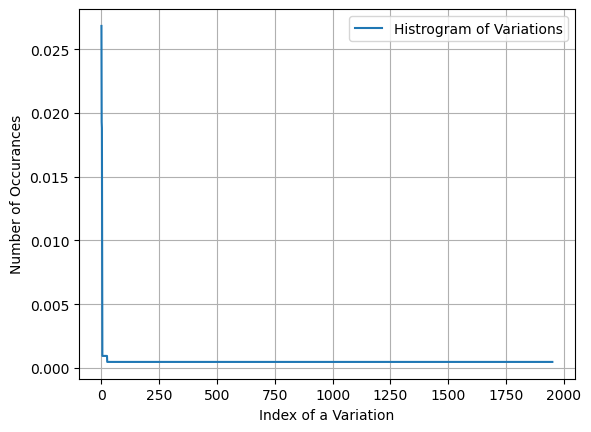

In [216]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02683616 0.04613936 0.06497175 ... 0.99905838 0.99952919 1.        ]


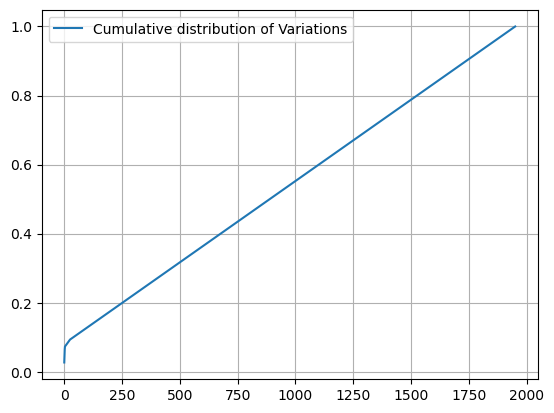

In [217]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [218]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [219]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [220]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [643]:
len(train_df['Variation'].unique())

1952

In [221]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1979)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7294475661711664
For values of alpha =  0.0001 The log loss is: 1.7208653527903603
For values of alpha =  0.001 The log loss is: 1.719776634590507
For values of alpha =  0.01 The log loss is: 1.723772683229473
For values of alpha =  0.1 The log loss is: 1.729509920605381
For values of alpha =  1 The log loss is: 1.730866071731262


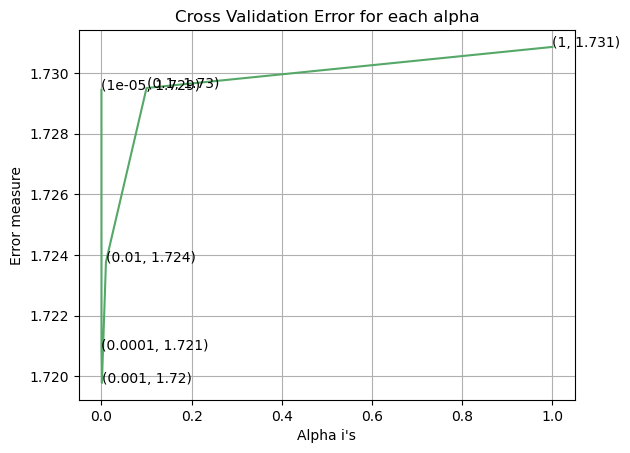

For values of best alpha =  0.001 The train log loss is: 1.0757545046488497
For values of best alpha =  0.001 The cross validation log loss is: 1.719776634590507
For values of best alpha =  0.001 The test log loss is: 1.6826485556532027


In [222]:
# with one hot encoding 
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For values of alpha =  1e-05 The log loss is: 2.1251168841612547
For values of alpha =  0.0001 The log loss is: 2.0549161914129157
For values of alpha =  0.001 The log loss is: 2.089201224560142
For values of alpha =  0.01 The log loss is: 2.0859799863437645
For values of alpha =  0.1 The log loss is: 2.08153452223724
For values of alpha =  1 The log loss is: 2.057174964140874


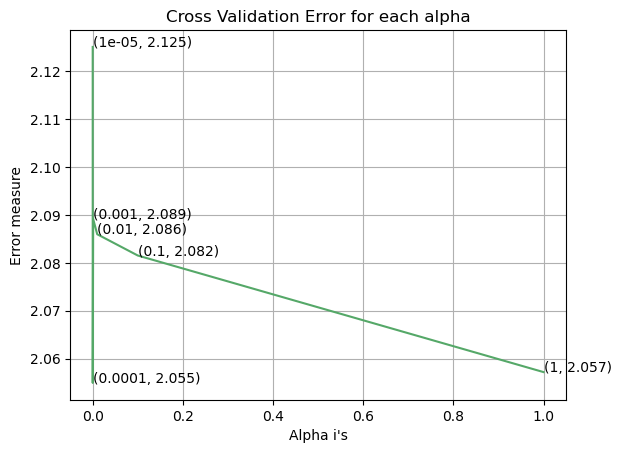

For values of best alpha =  0.0001 The train log loss is: 0.5379655544425407
For values of best alpha =  0.0001 The cross validation log loss is: 2.0549161914129157
For values of best alpha =  0.0001 The test log loss is: 2.04055272679908


In [223]:
# with response coding
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_responseCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_responseCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_responseCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_responseCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_responseCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Clearly response coding is useless here as variations are almost unique

<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [224]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1952  genes in test and cross validation data sets?
Ans
1. In test data 87 out of 665 : 13.082706766917292
2. In cross validation data 62 out of  532 : 11.654135338345863


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [225]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [226]:
# let's check the count of most occuring words in train and text dataset.
# We can find out the most occuring the words which are common to all classes and we can eliminate these as stop words

for i in range(1,10):
    print(f"Class {i}\n")
    print("Train Dataset most frequent words")
    print(sorted(extract_dictionary_paddle(train_df[train_df['Class']==i]).items(),key=lambda kv:kv[1],reverse=True)[:10])
    print("Test Dataset most requent words")
    print(sorted(extract_dictionary_paddle(test_df[test_df['Class']==i]).items(),key=lambda kv:kv[1],reverse=True)[:10])
    print("-"*90)
    
    

Class 1

Train Dataset most frequent words
[('1', 22230), ('2', 15812), ('3', 13391), ('fig', 11652), ('c', 11286), ('et', 11176), ('al', 11129), ('not', 11075), ('protein', 10895), ('5', 10711)]
Test Dataset most requent words
[('1', 8062), ('p53', 6724), ('2', 5645), ('3', 4814), ('protein', 4076), ('fig', 3920), ('5', 3778), ('0', 3777), ('et', 3774), ('al', 3757)]
------------------------------------------------------------------------------------------
Class 2

Train Dataset most frequent words
[('1', 15899), ('2', 12272), ('patients', 11954), ('3', 11606), ('et', 9948), ('al', 9944), ('0', 9175), ('5', 8723), ('not', 8567), ('fig', 8482)]
Test Dataset most requent words
[('1', 5254), ('patients', 4640), ('egfr', 4307), ('2', 4003), ('3', 3519), ('0', 3098), ('5', 2828), ('kinase', 2762), ('fig', 2753), ('not', 2573)]
------------------------------------------------------------------------------------------
Class 3

Train Dataset most frequent words
[('1', 2431), ('brca1', 2076), 

Need to add mutations, cell, cells and variants to the stop words as they are common to all classes and won't be contributing much to the models.<br>
Added... and re ran the entire cell again now...let's check <br>
there are again numbers are present 1,2,3 and so on, but we don't know what's the significance these numbers wrt cancer mutations hence we will be keeping these numbers as it is.

In [227]:
import math
#https://stackoverflow.com/a/1602964
# Using Naive Bayes Priciple 
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [228]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features = text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 52597


In [229]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [230]:
# Word a for class 0,1,2 ... ,9
confuse_array[0]

array([0.10417465, 0.03446955, 0.00497894, 0.25162773, 0.09076982,
       0.38184604, 0.12217541, 0.00421295, 0.00574493])

In [231]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [232]:
train_text_feature_responseCoding.shape

(2124, 9)

In [233]:
# https://stackoverflow.com/a/16202486

# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T


In [234]:

# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)


In [235]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [236]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur[:100]))

Counter({66424: 1, 66275: 1, 66172: 1, 65218: 1, 62713: 1, 53521: 1, 52448: 1, 48513: 1, 47226: 1, 47112: 1, 45789: 1, 43141: 1, 43053: 1, 42041: 1, 41901: 1, 39980: 1, 39679: 1, 38615: 1, 38067: 1, 36687: 1, 36146: 1, 35450: 1, 35124: 1, 34861: 1, 34847: 1, 33689: 1, 33010: 1, 32490: 1, 32386: 1, 31050: 1, 30000: 1, 27833: 1, 26208: 1, 25818: 1, 25600: 1, 25501: 1, 25338: 1, 25269: 1, 24677: 1, 24253: 1, 24138: 1, 23976: 1, 23842: 1, 23808: 1, 23339: 1, 23115: 1, 22970: 1, 22166: 1, 21871: 1, 21533: 1, 20809: 1, 20714: 1, 20624: 1, 20594: 1, 20249: 1, 20016: 1, 19976: 1, 19931: 1, 19726: 1, 19714: 1, 19657: 1, 19321: 1, 19296: 1, 19140: 1, 18770: 1, 18756: 1, 18703: 1, 18635: 1, 18516: 1, 18349: 1, 18006: 1, 17866: 1, 17827: 1, 17693: 1, 17688: 1, 17512: 1, 17357: 1, 17314: 1, 17268: 1, 17267: 1, 17148: 1, 17051: 1, 16941: 1, 16937: 1, 16707: 1, 16666: 1, 16558: 1, 16509: 1, 16495: 1, 16424: 1, 16094: 1, 15582: 1, 15487: 1, 15483: 1, 15451: 1, 15402: 1, 15371: 1, 15236: 1, 15223: 1, 1

For values of alpha =  1e-05 The log loss is: 1.2943795356542929
For values of alpha =  0.0001 The log loss is: 1.1375921402117086
For values of alpha =  0.001 The log loss is: 1.1036136824080343
For values of alpha =  0.01 The log loss is: 1.19373762396577
For values of alpha =  0.1 The log loss is: 1.44689155509966
For values of alpha =  1 The log loss is: 1.6565533766994187


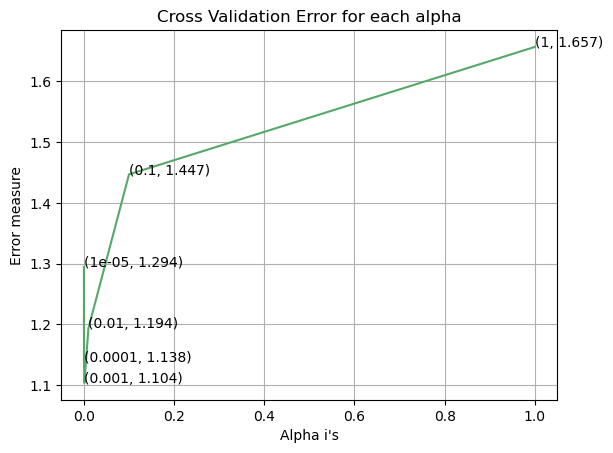

For values of best alpha =  0.001 The train log loss is: 0.7088832170910799
For values of best alpha =  0.001 The cross validation log loss is: 1.1036136824080343
For values of best alpha =  0.001 The test log loss is: 1.1697240346344264


In [237]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [238]:
# to check the occurence of the words across entire dataset i.e. train,test,cv dataset
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [239]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

97.445 % of word of test data appeared in train data
98.352 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [240]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", str((np.count_nonzero((pred_y- test_y))/test_y.shape[0]) * 100) + "%")
    plot_confusion_matrix(test_y, pred_y)

In [241]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [242]:
# # get top 1000 Top TFIDF features. 

# https://stackoverflow.com/questions/34232190/scikit-learn-tfidfvectorizer-how-to-get-top-n-terms-with-highest-tf-idf-score
# https://stackoverflow.com/questions/52299420/scipy-csr-matrix-understand-indptr

def get_top_tf_idf_words(tfidf_vec, x, top_n=1000):
    """
        tfidf_vec = tfidf trained vectorizer model
        x = tfidf transformed sparse matrix
        top_n = top n features according to their TFIDF values
        
    """
    feature_names = np.array(tfidf_vec.get_feature_names())
    sorted_nzs = np.argsort(x.data)[:-(top_n+1):-1]
    return feature_names[x.indices[sorted_nzs]]


In [243]:
# Building TFIDF vectorizer model
tfidf_vec = TfidfVectorizer(min_df=4)
tfidf_train_vec = tfidf_vec.fit_transform(train_df['TEXT'])
tfidf_feat = tfidf_vec.get_feature_names()
print(tfidf_feat[:100])

['00', '000', '0000001', '000001', '000002', '000007', '00001', '000011', '000012', '00002644', '00005', '000059', '000077', '0001', '000132', '00014', '000141', '000179', '0002', '0002158', '000245', '000249', '000251', '000258', '000267', '00029', '0003', '000369266', '00037', '0004', '0005', '000535', '000548', '000588', '0006', '0007', '0008', '00088', '0009', '000g', '000xg', '001', '0010', '0011', '001198', '0012', '001210', '0013', '0014', '0015', '0016', '001635', '001654', '0017', '0018', '001810', '0019', '001a', '002', '0021', '0022', '0023', '0024', '0025', '0025021', '0026', '0027', '002755', '0028', '002a', '003', '0030', '003008', '003133', '0032', '0033', '003333', '0034', '0035', '0036', '003797', '0038', '0039', '003a', '004', '0041', '0043', '004304', '00433', '004333', '0044', '004448', '004456', '0045', '0048', '004927', '004972', '004985', '005', '005026']


In [244]:
tfidf_train_vec.shape

(2124, 43869)

In [245]:
# The features will be in descending order 
top1000_tfidf_feat = get_top_tf_idf_words(tfidf_vec, x=tfidf_train_vec, top_n=5000)
print(top1000_tfidf_feat[:10])
print("Total Number of unique features will be - ",len(list(set(top1000_tfidf_feat))))

['fgfr3' 'braf' 'ptprd' 'flt1' 'fat1' 'fat1' 'ptprd' 'bap1' 'merlin'
 'elf3']
Total Number of unique features will be -  1167


In [246]:
# Now selecting the Top 1000 features responsible for top 1000 TFIDF value

d = defaultdict(int)
top1000_tfidf_features = []
for words in top1000_tfidf_feat:
    try:
        d[words] += 1
        if d[words] < 2 and len(top1000_tfidf_features)<1000:
            top1000_tfidf_features.append(words)
    except:
        print("Exeption raised !!")
print("The Top 10 words are : ",top1000_tfidf_features[:10])
print("Done ... ")

The Top 10 words are :  ['fgfr3', 'braf', 'ptprd', 'flt1', 'fat1', 'bap1', 'merlin', 'elf3', 'rit1', 'kdm5a']
Done ... 


In [247]:
# now let us understand how many features are present in cv and test data in this top 1000 TFIDF features.
# https://stackoverflow.com/questions/25116595/understanding-numpys-dstack-function
print("Intersection of cv text with top 1000 tfidf features\n")
print(set(np.dstack([cv_df['TEXT']]).flatten()[0].split()).intersection(set(top1000_tfidf_features)))
print("{}% of train features are present in cv".format((len(set(np.dstack([cv_df['TEXT']]).flatten()[0].split()).intersection(set(top1000_tfidf_features)))/len(top1000_tfidf_features))*100))
print("-"*70)
print("Intersection of test text with top 1000 tfidf features\n")
print(set(np.dstack([test_df['TEXT']]).flatten()[0].split()).intersection(set(top1000_tfidf_features)))
print("{}% of train features are present in test".format((len(set(np.dstack([test_df['TEXT']]).flatten()[0].split()).intersection(set(top1000_tfidf_features)))/len(top1000_tfidf_features))*100))



Intersection of cv text with top 1000 tfidf features

{'lines', 'phosphatase', 'uv', 'pten', 'astrocytoma', 'ras', 'glioblastoma', 'xl', 'ptprd', 'ptp', 'gbm', 'melanoma', 'exo', 'ii', 'breast', 'ig', 'patients', 'g1', 'alleles', 'insulin', 'kit', 'p16ink4a', 'kg', 'surveyor', 'pik3ca', 'protein', 'raf', 'u87mg', 'her2', 'polymorphism', 'copy', 'cdkn2a', 'p53'}
3.3000000000000003% of train features are present in cv
----------------------------------------------------------------------
Intersection of test text with top 1000 tfidf features

{'ki', 'f1174l', 'subgroups', 'ros1', 'brigatinib', 'mycn', 'tkis', 'abl', 'kg', 'bcr', 'pik3ca', 'cr', 'asp3026', 'mtor', 'akt1', 'specimens', 'cdkn2a', 'wildtype', 'nm', 'erk', 'nsclc', 'pten', 'families', 'lymphoma', 'kras', 'nras', 'met', 'appendix', 'et', 'mek1', 'apc', 'fusion', 'pc9', 'caspase', 'kit', 'neuroblastoma', 'atp', 'crizotinib', 'tp53', 'loop', 'resistance', 'egfr', 'lines', 'gefitinib', 'ctnnb1', 'melanomas', 'jak2', 'ii', 'akt', 

In [248]:
len(set(top1000_tfidf_features))

1000

In [249]:
# Now using this top 1000 tfidf features to re-train the tfidf model
tfidf_vec = TfidfVectorizer(vocabulary=top1000_tfidf_features)
tfidf_train_vec = tfidf_vec.fit_transform(train_df['TEXT'])
tfidf_feat = tfidf_vec.get_feature_names()
print(tfidf_feat[:100])

['fgfr3', 'braf', 'ptprd', 'flt1', 'fat1', 'bap1', 'merlin', 'elf3', 'rit1', 'kdm5a', 'ago2', 'kdm5c', 'kmt2d', 'ddr2', 'cdk12', 'mef2b', 'fbw7', 'ret', 'casp8', 'ezh2', 'atr', 'foxa1', 'mpl', 'sox9', 'myd88', 'raf', 'foxp1', 'fancj', 'pak1', 'ctcf', 'rnf43', 'cbl', 'lkb1', 'ercc3', 'xrcc2', 'fgfr2', 'carm1', 'her2', 'mga', 'asxl1', 'caspase', 'igf1r', 'brip1', 'hla', 'chek2', 'rkip', 'trkb', 'ercc2', 'vhl', 'erbb4', 'jak1', 'alk', 'stag2', 'nrf2', 'atm', 'mll', 'etv6', 'srsf2', 'smarca4', 'ros1', 'hnf', 'map3k1', 'ercc4', 'runx1', 'p16', 'ptp', 'npm1', 'egfr', 'bcor', 'abl1', 'stk33', 'tert', 'atrx', 'gata3', 'akt2', 'vegfa', 'btk', 'rybp', 'cbfa2', 'fgfr4', 'smo', 'blimp1', 'erbb3', 'pten', 'mycn', 'prb', 'map2k1', 'shp2', 'myc', 'idh1', 'bach1', 'mtor', 'flt3', 'krasg12c', 'dicer1', 'kdr', 'nsd2', 'smad3', 'brca1', 'met']


In [250]:
# transforming the cv and test data
tfidf_cv_vec = tfidf_vec.transform(cv_df['TEXT'])
print("cv shape : ",tfidf_cv_vec.shape)
tfidf_test_vec = tfidf_vec.transform(test_df['TEXT'])
print("test shape : ",tfidf_test_vec.shape)

cv shape :  (532, 1000)
test shape :  (665, 1000)


In [430]:
train_df.head(2)

ID    Gene           Variation  Class  \
2103  2103   CDK12               D887N      1   
952    952  PDGFRB  ETV6-PDGFRB_Fusion      7   

                                                   TEXT  text_count  \
2103  introduction brca1 brca2 found 20 high grade e...        2306   
952   etv6 pdgfrb also called tel pdgfrb fip1l1 pdgf...        9469   

      unique_words  unique_norm_words_log  word_length  var_length  n2v_ratio  
2103           812              -1.043769     5.931483           5   2.093827  
952           1978              -1.565937     6.383462          18   2.473138

In [ ]:
# drop unique norm words as we already have transformed version
train_df.drop([['unique_norm_words','n2v_ratio']],axis=1,inplace=True)
cv_df.drop([['unique_norm_words','n2v_ratio']],axis=1,inplace=True)
cv_df.drop([['unique_norm_words','n2v_ratio']],axis=1,inplace=True)

In [393]:
# As the feature have this (float,float] this shape which countvectorizer can misinterpret as (,num,.] four feature per feature
# replacing - with __
# replacing . with _
# removing brackets

def adjust_features(text,whos_label):
    # changing - to __ and . to _ as countvectorizer doesn't ignore symbols other than underscore.
    temp = "to".join(re.findall(r"[-+]?\d+\.\d+",text))
    temp = re.sub("[-]+","__",temp)
    temp = re.sub("[\.]+","_",temp)
    return temp+whos_label

In [392]:
# Let's do the binning of real valued features on the basis of percentile distribution to make it categorical variables
# Also it helps in reducing noise

# cutting the real valued functions on the basis every tenth percentiles
# Adaptive Binning 

def bin_data(s_train,s_cv,s_test,whos_label,q_val=10):
    # https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b
    s_train = pd.qcut(s_train,q=q_val,duplicates='drop').astype(str).apply(lambda x: adjust_features(x,whos_label))
    s_cv = pd.qcut(s_cv,q=q_val,duplicates='drop').astype(str).apply(lambda x: adjust_features(x,whos_label))
    s_test = pd.qcut(s_test,q=q_val,duplicates='drop').astype(str).apply(lambda x: adjust_features(x,whos_label))
    return s_train,s_cv,s_test


In [431]:
bin_train_tc, bin_cv_tc, bin_test_tc = bin_data(train_df['text_count'],cv_df['text_count'],test_df['text_count'],whos_label='_tc')

bin_train_uw, bin_cv_uw, bin_test_uw = bin_data(train_df['unique_words'],cv_df['unique_words'],test_df['unique_words'],whos_label='_uw')

bin_train_unw, bin_cv_unw, bin_test_unw = bin_data(train_df['unique_norm_words_log'],cv_df['unique_norm_words_log'],test_df['unique_norm_words_log'],whos_label='_unw')

bin_train_wl, bin_cv_wl, bin_test_wl = bin_data(train_df['word_length'],cv_df['word_length'],test_df['word_length'],whos_label='_wl')


bin_train_vl, bin_cv_vl, bin_test_vl = bin_data(train_df['var_length'],cv_df['var_length'],test_df['var_length'],whos_label='_vl',q_val=4)

bin_train_n2v, bin_cv_n2v, bin_test_n2v = bin_data(train_df['n2v_ratio'],cv_df['n2v_ratio'],test_df['n2v_ratio'],whos_label='_n2v',q_val=4)


In [363]:
def print_dimension_info(_obj,_name):
    data_list= ['Training count : ','Cross Validation count : ','Test count : '] * len(_obj)
    col_num = []
    row_num = list()
    for i in _obj:
        row_num.append(i.shape[0])
        col_num.append(i.shape[1])
    print("The Values for : ", _name)
    print("\nRow Values are : ",list(zip(data_list,row_num)))
    print("\nColumn Values are : ",list(zip(data_list,col_num)))
    print("\nType of matrices: ",[type(x) for x in _obj])
    print("*"*100)

In [364]:

def one_hot_encoder(df_col_train,df_col_cv,df_col_test,vocab=None,case=False,_bin=True):
    encoder_obj = CountVectorizer(vocabulary = vocab,lowercase=case,binary=_bin)
    encoder_obj.fit(df_col_train)
    print("features are : {0} and len is {1}\n".format(encoder_obj.get_feature_names(),len(encoder_obj.get_feature_names())))
    return encoder_obj.transform(df_col_train.values),encoder_obj.transform(df_col_cv.values),encoder_obj.transform(df_col_test.values),encoder_obj.get_feature_names()


In [432]:
# for text count features
train_tc,cv_tc,test_tc,tc_vec_feat = one_hot_encoder(bin_train_tc,bin_cv_tc,bin_test_tc,vocab=bin_train_tc.unique())
print_dimension_info(_obj=[train_tc,cv_tc,test_tc],_name="Text Count")
# for uniquw words features
train_uw,cv_uw,test_uw,uw_vec_feat = one_hot_encoder(bin_train_uw,bin_cv_uw,bin_test_uw,vocab=bin_train_uw.unique())
print_dimension_info(_obj=[train_uw,cv_uw,test_uw],_name="Unique Word Count")
# for unique log normalized word
train_unw,cv_unw,test_unw,unw_vec_feat = one_hot_encoder(bin_train_unw,bin_cv_unw,bin_test_unw,vocab=bin_train_unw.unique())
print_dimension_info(_obj=[train_unw,cv_unw,test_unw],_name="Log normalized Unique Word Count")
# for word length feature
train_wl,cv_wl,test_wl,wl_vec_feat = one_hot_encoder(bin_train_wl,bin_cv_wl,bin_test_wl,vocab=bin_train_wl.unique())
print_dimension_info(_obj=[train_wl,cv_wl,test_wl],_name="Word length features")
# for var length feature
train_vl,cv_vl,test_vl,vl_vec_feat = one_hot_encoder(bin_train_vl,bin_cv_vl,bin_test_vl,vocab=bin_train_vl.unique())
print_dimension_info(_obj=[train_vl,cv_vl,test_vl],_name="Variation length features")
# for noun to verb ration
train_n2v,cv_n2v,test_n2v,n2v_vec_feat = one_hot_encoder(bin_train_n2v,bin_cv_n2v,bin_test_n2v,vocab=bin_train_n2v.unique())
print_dimension_info(_obj=[train_n2v,cv_n2v,test_n2v],_name="Variation length features")

features are : ['2270_0to2903_0_tc', '9418_0to12326_0_tc', '7302_0to9418_0_tc', '12326_0to50702_0_tc', '4044_0to4751_0_tc', '2903_0to3443_0_tc', '1_999to2270_0_tc', '4751_0to5867_6_tc', '3443_0to4044_0_tc', '5867_6to7302_0_tc'] and len is 10

The Values for :  Text Count

Row Values are :  [('Training count : ', 2124), ('Cross Validation count : ', 532), ('Test count : ', 665)]

Column Values are :  [('Training count : ', 10), ('Cross Validation count : ', 10), ('Test count : ', 10)]

Type of matrices:  [<class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>, <class 'scipy.sparse.csr.csr_matrix'>]
****************************************************************************************************
features are : ['801_3to960_2_uw', '1865_8to2158_8_uw', '2721_0to5746_0_uw', '1366_0to1542_8_uw', '1233_2to1366_0_uw', '960_2to1091_0_uw', '1_999to801_3_uw', '2158_8to2721_0_uw', '1091_0to1233_2_uw', '1542_8to1865_8_uw'] and len is 10

The Values for :  Unique Word Count


In [433]:
# clubbing these binned features together -
from scipy.sparse import hstack
x_train_binned_feat = hstack((train_tc,train_uw,train_unw,train_wl,train_vl,train_n2v))
x_cv_binned_feat  = hstack((cv_tc,cv_uw,cv_unw,cv_wl,cv_vl,cv_n2v))
x_test_binned_feat = hstack((test_tc,test_uw,test_unw,test_wl,test_vl,test_n2v))

# concanating features - 
x_binned_feat = tc_vec_feat + uw_vec_feat + unw_vec_feat + wl_vec_feat + vl_vec_feat + n2v_vec_feat


In [426]:
# standardizing the text_count,unique_words and unique norm words
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(remainder='drop',transformers=[('std',StandardScaler(),\
                                                                       ['text_count','unique_words',\
                                                                        'unique_norm_words_log','word_length','var_length','n2v_ratio'])])

# It generates a matrices so need to convert the entire dataframe into matrice
print("PreProcessing of Numerical columns starts ...\n")
# preprocessing the certain numerical columns
x_train_trans = preprocessor.fit_transform(train_df)
x_cv_trans = preprocessor.transform(cv_df)
x_test_trans = preprocessor.transform(test_df)
print("PreProcessing of Numerical Columns ends")


PreProcessing of Numerical columns starts ...

PreProcessing of Numerical Columns ends


In [435]:
x_train_trans.shape

(2124, 6)

### Let's check the importance of these features (numerical) with Logistic Regression Model

For values of alpha =  1e-05 The log loss is: 1.7896861672571671
For values of alpha =  0.0001 The log loss is: 1.7774839128606852
For values of alpha =  0.001 The log loss is: 1.7613994901710985
For values of alpha =  0.01 The log loss is: 1.7590032956325266
For values of alpha =  0.1 The log loss is: 1.763853782182537
For values of alpha =  1 The log loss is: 1.7695522081715347


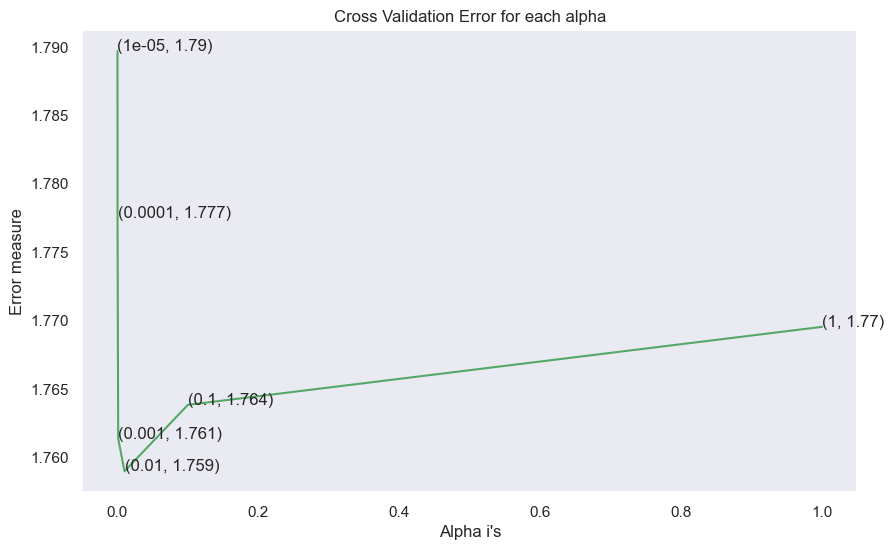

For values of best alpha =  0.01 The train log loss is: 1.7590751475388222
For values of best alpha =  0.01 The cross validation log loss is: 1.7590032956325266
For values of best alpha =  0.01 The test log loss is: 1.7407906415271828


In [436]:
# Train a Logistic regression+Calibration model using real values features.
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(x_train_trans, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_trans, y_train)
    predict_y = sig_clf.predict_proba(x_cv_trans)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_train_trans, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_trans, y_train)

predict_y = sig_clf.predict_proba(x_train_trans)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_cv_trans)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test_trans)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [437]:
# feature importance for Logistic regression to find out the best feature
np.median(clf.coef_,axis=0)

array([-0.05213995,  0.03980915,  0.00200003,  0.05987332, -0.26753244,
       -0.04348353])

For values of alpha =  1e-05 The log loss is: 1.9140116070058693
For values of alpha =  0.0001 The log loss is: 1.8788802473015114
For values of alpha =  0.001 The log loss is: 1.9295241508051537
For values of alpha =  0.01 The log loss is: 1.8459012380148998
For values of alpha =  0.1 The log loss is: 1.8019642076258389
For values of alpha =  1 The log loss is: 1.8302599806232425


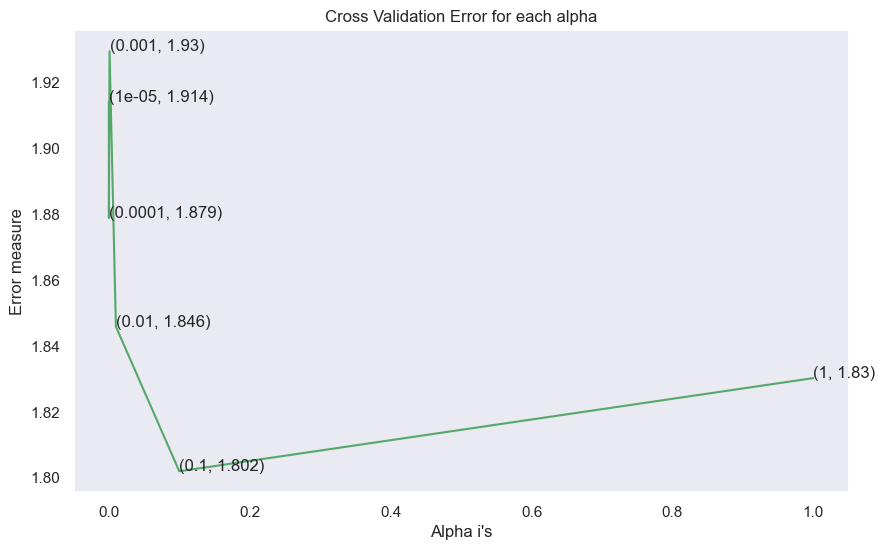

For values of best alpha =  0.1 The train log loss is: 1.8063318531250525
For values of best alpha =  0.1 The cross validation log loss is: 1.8019642076258389
For values of best alpha =  0.1 The test log loss is: 1.8127321690029339


In [438]:
# Train a Logistic regression+Calibration model using binned features
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='log', random_state=42)
    clf.fit(x_train_binned_feat, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train_binned_feat, y_train)
    predict_y = sig_clf.predict_proba(x_cv_binned_feat)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='log', random_state=42)
clf.fit(x_train_binned_feat, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train_binned_feat, y_train)

predict_y = sig_clf.predict_proba(x_train_binned_feat)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_cv_binned_feat)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test_binned_feat)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [415]:
# feature importance for Logistic regression to find out the best feature
(np.array(x_binned_feat)[np.argsort(np.median(clf.coef_,axis=0))])[:20]

array(['2_999to5_0_vl', '2270_0to2903_0_tc', '__0_981to0_0_unw',
       '__1_331to__1_265_unw', '__1_212to__1_139_unw',
       '__1_384to__1_331_unw', '__1_471to__1_384_unw', '5_776to5_959_wl',
       '6_373to6_459_wl', '6_459to6_581_wl', '6_294to6_373_wl',
       '6_063to6_154_wl', '6_154to6_24_wl', '4_218to5_776_wl',
       '5_959to6_063_wl', '6_581to8_5_wl', '6_24to6_294_wl',
       '6_0to55_0_vl', '5_0to6_0_vl', '0_912_n2v'], dtype='<U20')

Clearly These are not very important but still they are doing better than random model log loss i.e. 2.5 and also they are stable across train,cv and test dataset. Let's consider them also along with other features. We will be going with real valued feature as they tend to perform better as compared to binned valued which is understandable as they have lesser dimensions as compared to other.

<p style="font-size:24px;text-align:Center"> <b>Stacking all above derived features </b><p>

In [439]:
train_df.head()

ID    Gene           Variation  Class  \
2103  2103   CDK12               D887N      1   
952    952  PDGFRB  ETV6-PDGFRB_Fusion      7   
1284  1284    HRAS                G13R      2   
396    396    TP53               R175H      4   
705    705   ERBB2               R678Q      2   

                                                   TEXT  text_count  \
2103  introduction brca1 brca2 found 20 high grade e...        2306   
952   etv6 pdgfrb also called tel pdgfrb fip1l1 pdgf...        9469   
1284  three dimensional structure complex human h ra...        7736   
396   tumor suppressor p53 dependent apoptosis thoug...       19050   
705   abstract lapatinib dual tyrosine kinase inhibi...        7319   

      unique_words  unique_norm_words_log  word_length  var_length  n2v_ratio  
2103           812              -1.043769     5.931483           5   2.093827  
952           1978              -1.565937     6.383462          18   2.473138  
1284          2846              -0.999970     6.542270           4   2.684071  
396           3573              -1.673662     6.346772           5   2.821429  
705           2109              -1.244260     6.070092           5   2.743913

In [440]:
# merging gene, variance and text features for Multinomial Naive Bayes

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))


train_x_onehotCoding_nb = hstack((train_gene_var_onehotCoding,x_train_binned_feat,tfidf_train_vec)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_nb = hstack((test_gene_var_onehotCoding,x_test_binned_feat,tfidf_test_vec)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_nb = hstack((cv_gene_var_onehotCoding,x_cv_binned_feat,tfidf_cv_vec)).tocsr()
cv_y = np.array(list(cv_df['Class']))



In [441]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_nb.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_nb.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_nb.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 3253)
(number of data points * number of features) in test data =  (665, 3253)
(number of data points * number of features) in cross validation data = (532, 3253)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.1903212106697718
for alpha = 0.0001
Log Loss : 1.1905698944064929
for alpha = 0.001
Log Loss : 1.1904468426042585
for alpha = 0.1
Log Loss : 1.155101572006163
for alpha = 1
Log Loss : 1.6730486154874453
for alpha = 10
Log Loss : 2.5360145690783016
for alpha = 100
Log Loss : 2.3355413513673744
for alpha = 1000
Log Loss : 2.121860072537171


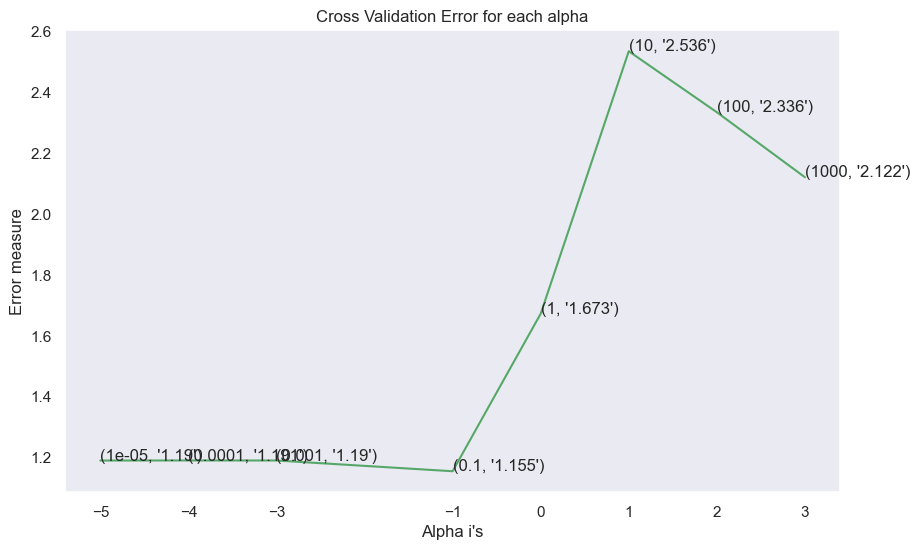

For values of best alpha =  0.1 The train log loss is: 0.6984142243560355
For values of best alpha =  0.1 The cross validation log loss is: 1.155101572006163
For values of best alpha =  0.1 The test log loss is: 1.1757781226101574


In [443]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding_nb, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_nb, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_nb)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding_nb, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_nb, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding_nb)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_nb)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_nb)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.155101572006163
Number of missclassified point : 0.34962406015037595
-------------------- Confusion matrix --------------------


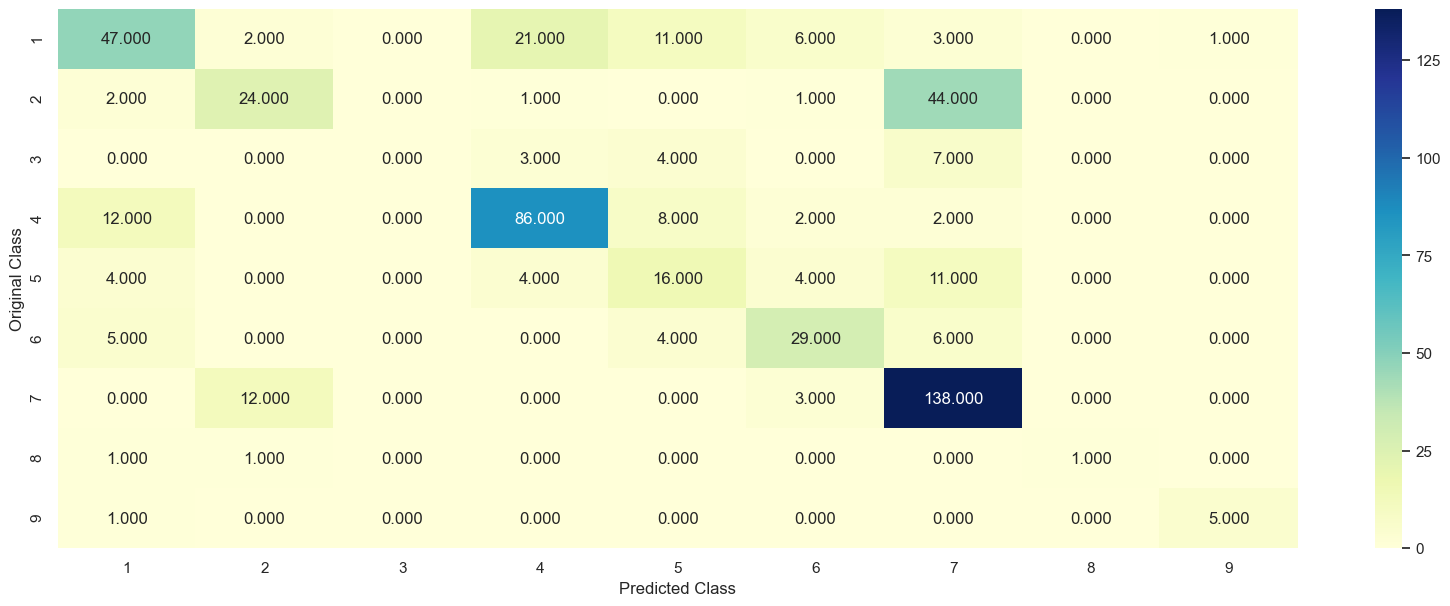

-------------------- Precision matrix (Columm Sum=1) --------------------


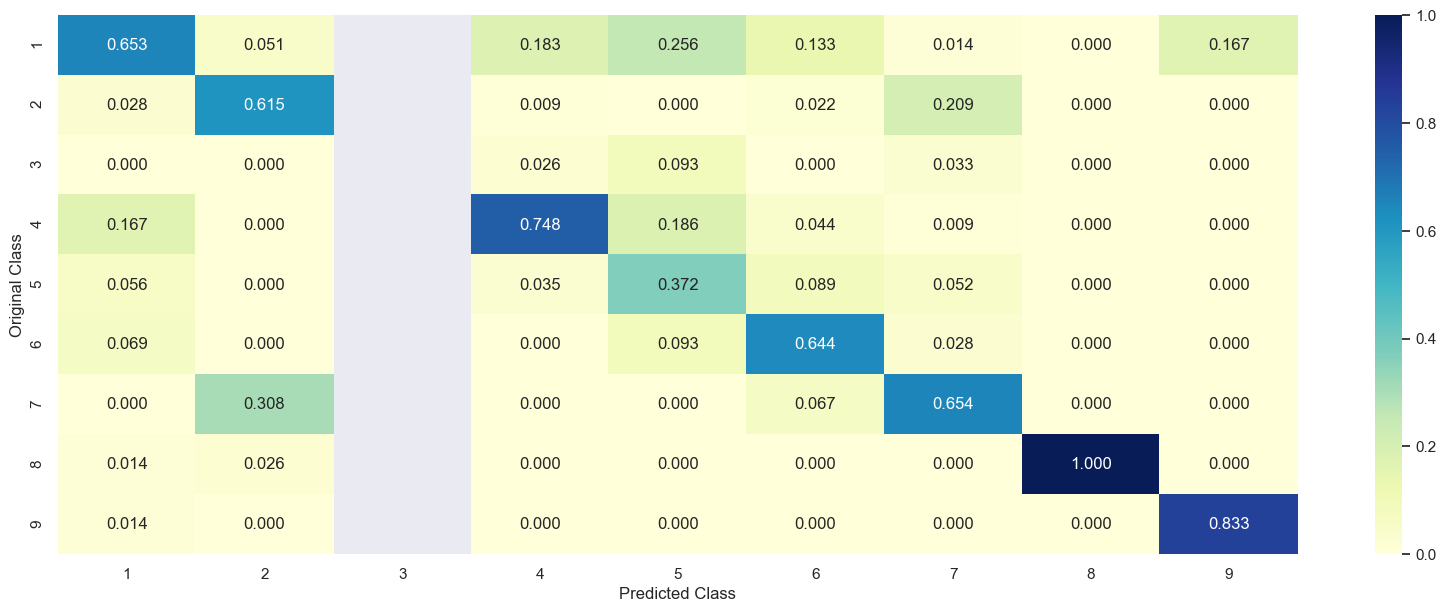

-------------------- Recall matrix (Row sum=1) --------------------


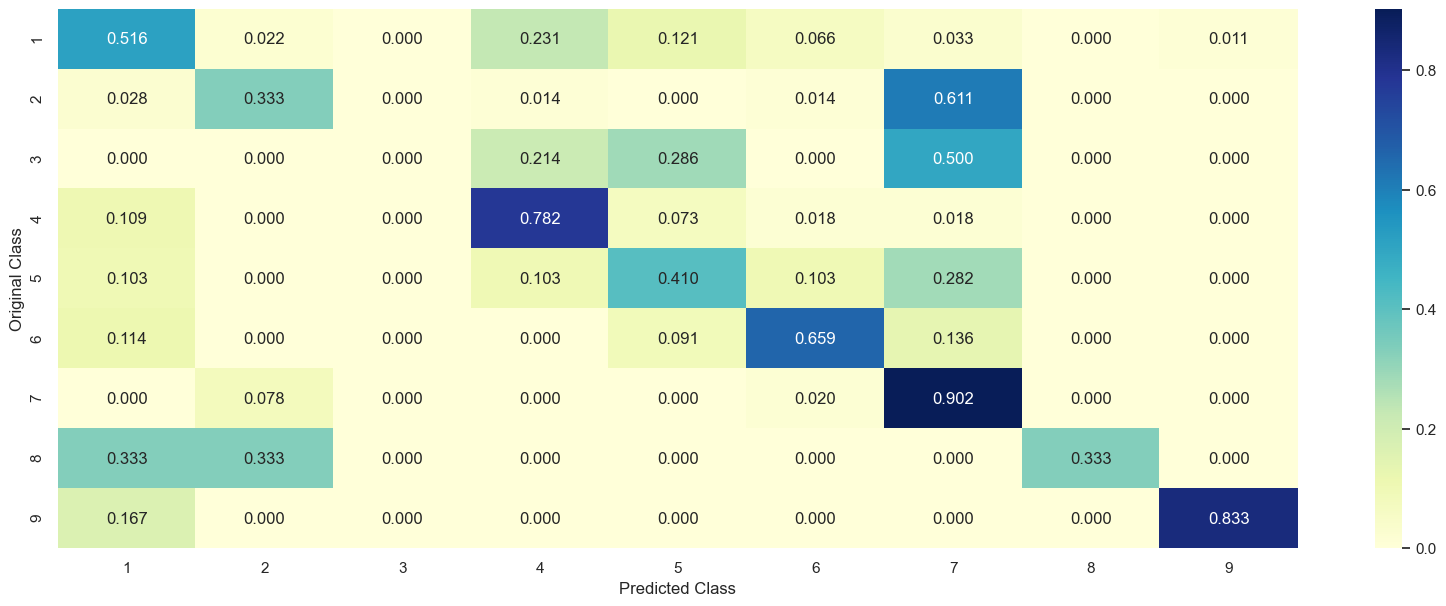

In [444]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding_nb, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_nb, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_nb)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding_nb)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding_nb.toarray()))

In [445]:
# this function is modified with the new features
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(top_indices, text, gene, var,no_features, **kwargs):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    #binned_feat = kwargs['bin_features']
    global tc_vec_feat,uw_vec_feat,unw_vec_feat,wl_vec_feat,vl_vec_feat,n2v_vec_feat
    text_count_vec = TfidfVectorizer(vocabulary = kwargs['vocab'])
    #import pdb
    #pdb.set_trace()
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    fea3_len = len(tc_vec_feat)
    fea4_len = len(uw_vec_feat)
    fea5_len = len(unw_vec_feat)
    fea6_len = len(wl_vec_feat)
    fea7_len = len(vl_vec_feat)
    fea8_len = len(n2v_vec_feat)

    word_present = 0
    for i,v in enumerate(top_indices):
        # gene feature
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if gene == word else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
                
        # variation feature
        elif (v < fea1_len+fea2_len):
            word = var_count_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if var == word else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
                
        # term count feature
        elif (v < fea1_len+fea2_len+fea3_len):
            word = tc_vec_feat[v-(fea1_len+fea2_len)]
            yes_no = True if word == kwargs['tc'] else False
            if yes_no:
                word_present +=1
                print(i, "Binned feature [{}] present in test data point [{}]".format(word,yes_no))
                
        # unique word count feature        
        elif (v < fea1_len+fea2_len+fea3_len+fea4_len):
            word = uw_vec_feat[v-(fea1_len+fea2_len+fea3_len)]
            yes_no = True if word == kwargs['uw'] else False
            if yes_no:
                word_present +=1
                print(i, "Binned feature [{}] present in test data point [{}]".format(word,yes_no))
        
        # Unique Normalized word count feature
        elif (v < fea1_len+fea2_len+fea3_len+fea4_len+fea5_len):
            word = unw_vec_feat[v-(fea1_len+fea2_len+fea3_len+fea4_len)]
            yes_no = True if word == kwargs['unw'] else False
            if yes_no:
                word_present +=1
                print(i, "Binned feature [{}] present in test data point [{}]".format(word,yes_no))
        
        # word length feature
        elif (v < fea1_len+fea2_len+fea3_len+fea4_len+fea5_len+fea6_len):
            word = nc_vec_feat[v-(fea1_len+fea2_len+fea3_len+fea4_len+fea5_len)]
            yes_no = True if word == kwargs['wl'] else False
            if yes_no:
                word_present +=1
                print(i, "Binned feature [{}] present in test data point [{}]".format(word,yes_no))
        
        # variation length feature
        elif (v < fea1_len+fea2_len+fea3_len+fea4_len+fea5_len+fea6_len+fea7_len):
            word = unw_vec_feat[v-(fea1_len+fea2_len+fea3_len+fea4_len+fea5_len+fea6_len)]
            yes_no = True if word == kwargs['vl'] else False
            if yes_no:
                word_present +=1
                print(i, "Binned feature [{}] present in test data point [{}]".format(word,yes_no))
                
        # Noun to verb ratio feature
        elif (v < fea1_len+fea2_len+fea3_len+fea4_len+fea5_len+fea6_len+fea7_len+fea8_len):
            word = unw_vec_feat[v-(fea1_len+fea2_len+fea3_len+fea4_len+fea5_len+fea6_len+fea7_len)]
            yes_no = True if word == kwargs['n2v'] else False
            if yes_no:
                word_present +=1
                print(i, "Binned feature [{}] present in test data point [{}]".format(word,yes_no))
        
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len+fea3_len+fea4_len+fea5_len+fea6_len+fea7_len+fea8_len)]
            yes_no = True if word in text.lower().split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [449]:
test_point_index = 1
no_feature = 2000
predicted_cls = sig_clf.predict(test_x_onehotCoding_nb[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_nb[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature] # sorting descending order 
print("-"*70)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],\
                     test_df['Variation'].iloc[test_point_index],no_feature,tc=bin_test_tc.iloc[test_point_index],\
                     uw=bin_test_uw.iloc[test_point_index],unw=bin_test_unw.iloc[test_point_index],\
                     wl=bin_test_wl.iloc[test_point_index],vl=bin_test_vl.iloc[test_point_index],\
                     n2v=bin_test_n2v.iloc[test_point_index],vocab=top1000_tfidf_features)


Predicted Class : 7
Predicted Class Probabilities: [[0.0662 0.2996 0.0162 0.0688 0.0355 0.0313 0.4684 0.0078 0.0062]]
Actual Class : 7
----------------------------------------------------------------------
1913 Text feature [ni] present in test data point [True]
Out of the top  2000  features  1 are present in query point


<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [452]:
test_point_index = 2
no_feature = 2000
predicted_cls = sig_clf.predict(test_x_onehotCoding_nb[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_nb[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],\
                     test_df['Variation'].iloc[test_point_index],no_feature,tc=bin_test_tc.iloc[test_point_index],\
                     uw=bin_test_uw.iloc[test_point_index],unw=bin_test_unw.iloc[test_point_index],\
                     wl=bin_test_wl.iloc[test_point_index],vl=bin_test_vl.iloc[test_point_index],\
                     n2v=bin_test_n2v.iloc[test_point_index],vocab=top1000_tfidf_features)

Predicted Class : 2
Predicted Class Probabilities: [[0.0729 0.6012 0.0177 0.0763 0.0406 0.0364 0.1419 0.0064 0.0066]]
Actual Class : 7
--------------------------------------------------
Out of the top  2000  features  0 are present in query point


In [463]:
# merging gene, variance and text features for other models

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

"""
train_x_responseCoding = hstack((train_gene_var_responseCoding,x_train_binned_feat, train_text_feature_responseCoding)).tocsr()
test_x_responseCoding = hstack((test_gene_var_responseCoding,x_test_binned_feat, test_text_feature_responseCoding)).tocsr()
cv_x_responseCoding = hstack((cv_gene_var_responseCoding,x_cv_binned_feat, cv_text_feature_responseCoding)).tocsr()
"""
# Ignoring the binned features as KNN model seems to perform very poor with addition to them may be the curse of dimensionality
# is in effect here.

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [454]:
type(x_train_binned_feat)

scipy.sparse.coo.coo_matrix

In [457]:
train_gene_var_responseCoding.shape

(2124, 18)

In [458]:
train_text_feature_responseCoding.shape

(2124, 9)

<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 0.9974839224691702
for alpha = 11
Log Loss : 0.978259137506148
for alpha = 15
Log Loss : 0.9942119959178611
for alpha = 21
Log Loss : 0.9967884878292336
for alpha = 31
Log Loss : 0.9995906712116496
for alpha = 41
Log Loss : 1.014674947344118
for alpha = 51
Log Loss : 1.0257449316536442
for alpha = 99
Log Loss : 1.0758159787770496


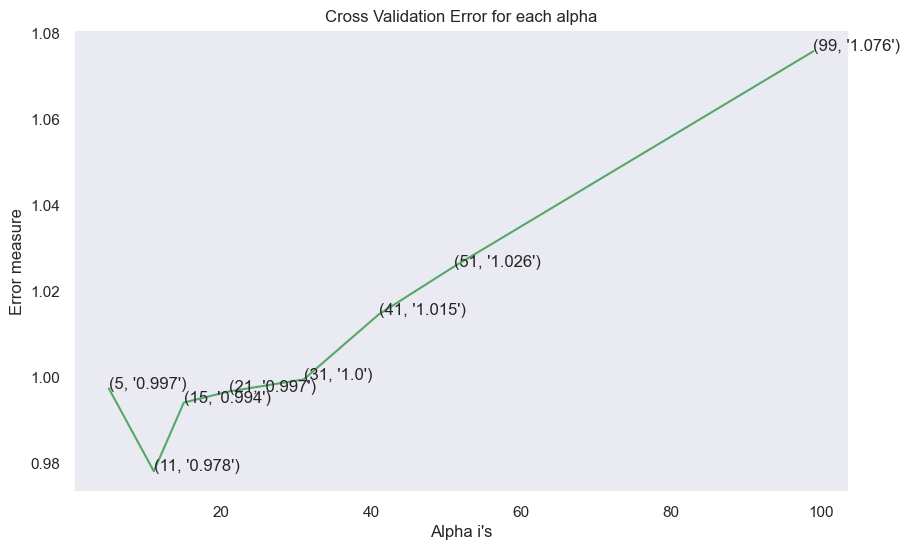

For values of best alpha =  11 The train log loss is: 0.6528771505889714
For values of best alpha =  11 The cross validation log loss is: 0.978259137506148
For values of best alpha =  11 The test log loss is: 1.0203362563266714


In [464]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 0.978259137506148
Number of mis-classified points : 34.02255639097744%
-------------------- Confusion matrix --------------------


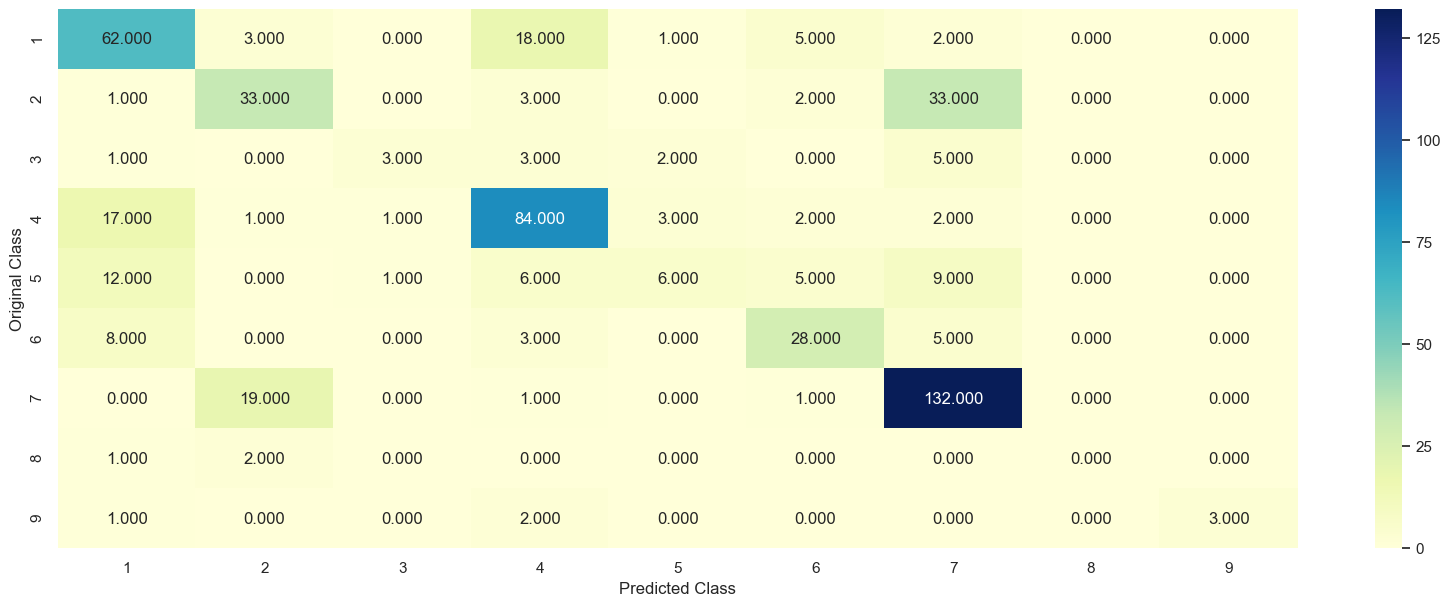

-------------------- Precision matrix (Columm Sum=1) --------------------


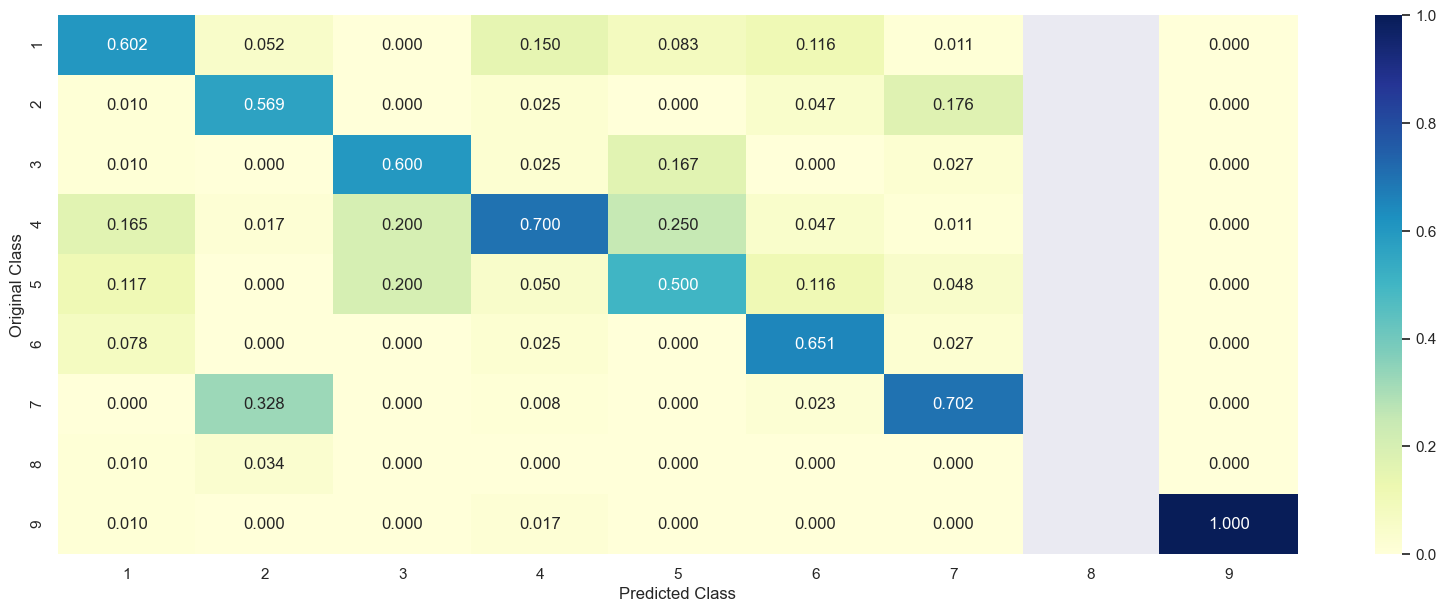

-------------------- Recall matrix (Row sum=1) --------------------


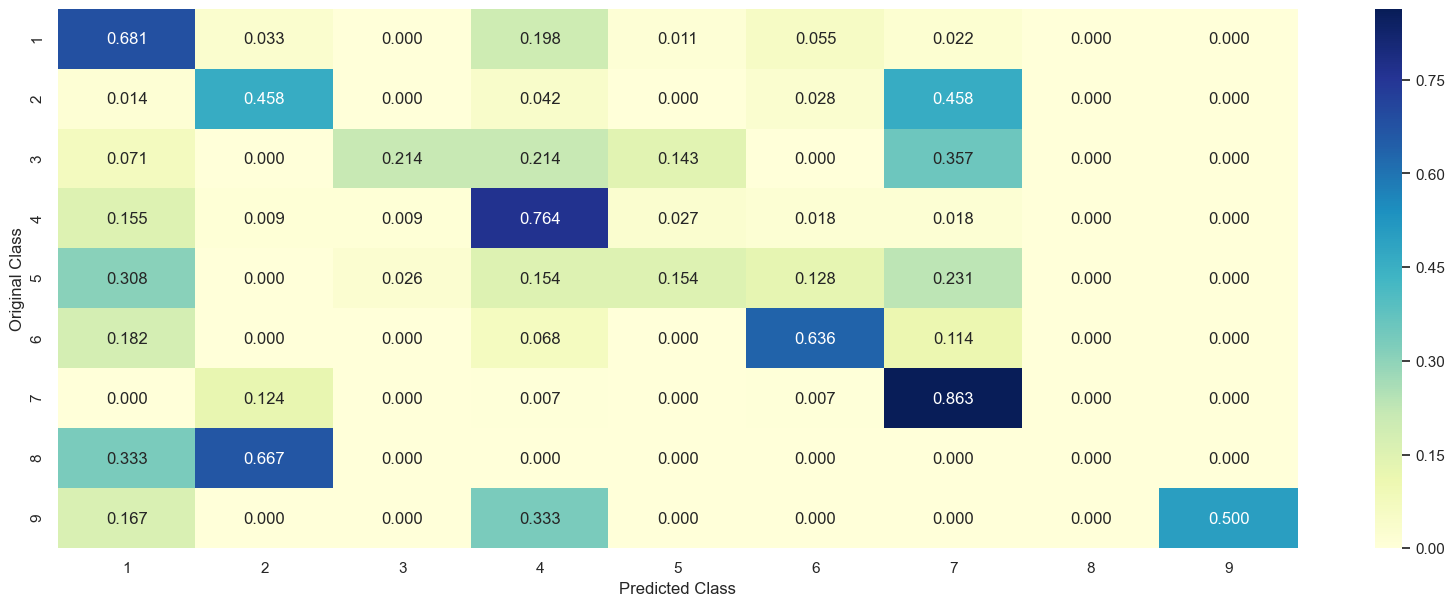

In [465]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [468]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 3
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 2
Actual Class : 2
The  11  nearest neighbours of the test points belongs to classes [7 2 7 2 2 2 7 7 2 7 7]
Fequency of nearest points : Counter({7: 6, 2: 5})


<h3>4.2.4. Sample Query Point-2 </h3>

In [470]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 2
Actual Class : 7
the k value for knn is 11 and the nearest neighbours of the test points belongs to classes [2 7 2 7 2 2 2 7 7 7 2]
Fequency of nearest points : Counter({2: 6, 7: 5})


<h2>4.3. Logistic Regression</h2>

In [471]:
train_x_onehotCoding = hstack((train_gene_var_onehotCoding,x_train_trans,tfidf_train_vec)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding,x_test_trans,tfidf_test_vec)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding,x_cv_trans,tfidf_cv_vec)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [472]:
x_train_trans.shape

(2124, 6)

In [473]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names_(top_indices, text, gene, var,no_features, **kwargs):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = TfidfVectorizer(vocabulary = kwargs['vocab'])
    #import pdb
    #pdb.set_trace()
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    #real_val_feat = ['text_count','unique_words','unique_norm_words_log','word_length','var_length','n2v_ratio']
    word_present = 0
    for i,v in enumerate(top_indices):
        # gene feature
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if gene == word else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
                
        # variation feature
        elif (v < fea1_len+fea2_len):
            word = var_count_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if var == word else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v<fea1_len+fea2_len+1):
            print(i,"Text Count feature is important")
        elif (v<fea1_len+fea2_len+2):
            print(i,"Unique Words feature is important")
        elif (v<fea1_len+fea2_len+3):
            print(i,"log Unique norm word feature is important")
        elif (v<fea1_len+fea2_len+4):
            print(i,"word length feature is important")
        elif (v<fea1_len+fea2_len+5):
            print(i,"variation length feature is important")
        elif (v<fea1_len+fea2_len+6):
            print(i,"noun to verb ration feature is important")
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len+6)]
            yes_no = True if word in text.lower().split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.0587240781260494
for alpha = 1e-05
Log Loss : 1.0165145670941629
for alpha = 0.0001
Log Loss : 0.9951438992509186
for alpha = 0.001
Log Loss : 1.025422519360237
for alpha = 0.01
Log Loss : 1.2112302289525887
for alpha = 0.1
Log Loss : 1.5189228300706457
for alpha = 1
Log Loss : 1.6787552706966316
for alpha = 10
Log Loss : 1.704581526318001
for alpha = 100
Log Loss : 1.707766597228621


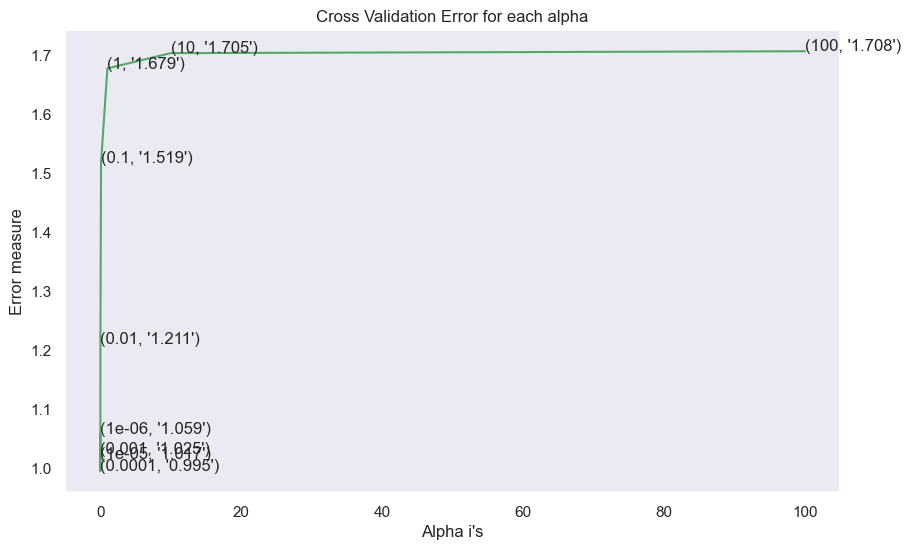

For values of best alpha =  0.0001 The train log loss is: 0.5567786961273666
For values of best alpha =  0.0001 The cross validation log loss is: 0.9951438992509186
For values of best alpha =  0.0001 The test log loss is: 1.0061316702143088


In [474]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 0.9951438992509186
Number of mis-classified points : 34.02255639097744%
-------------------- Confusion matrix --------------------


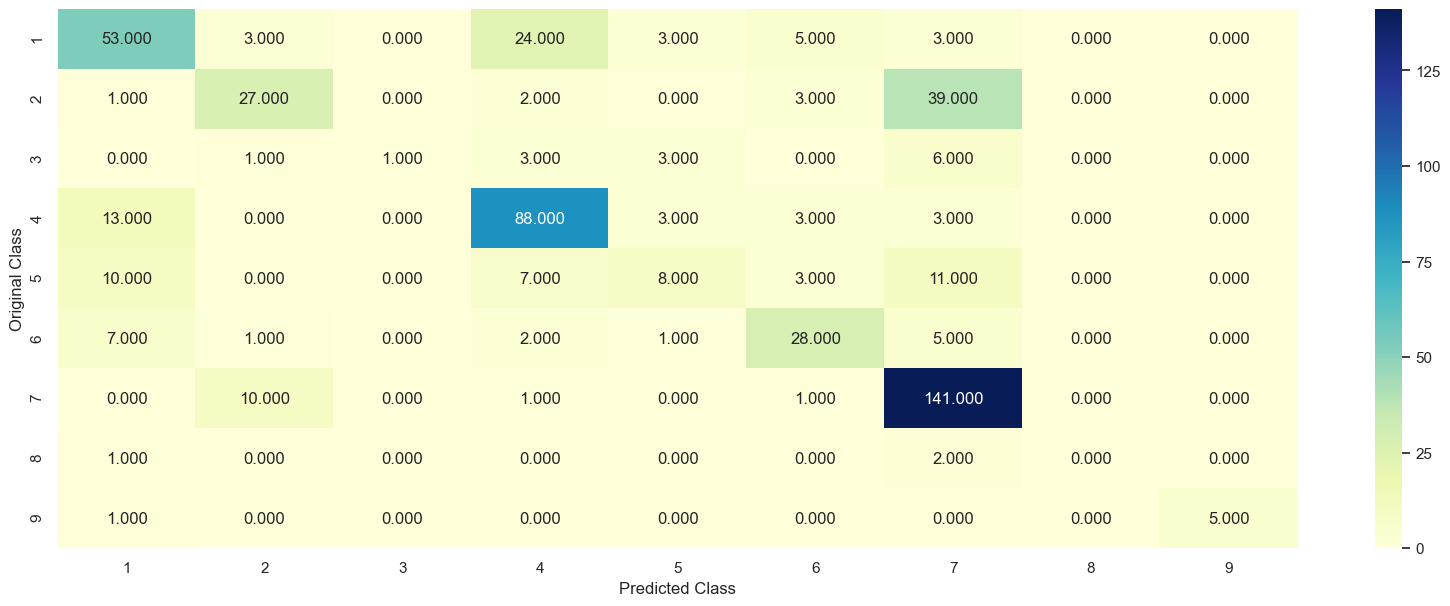

-------------------- Precision matrix (Columm Sum=1) --------------------


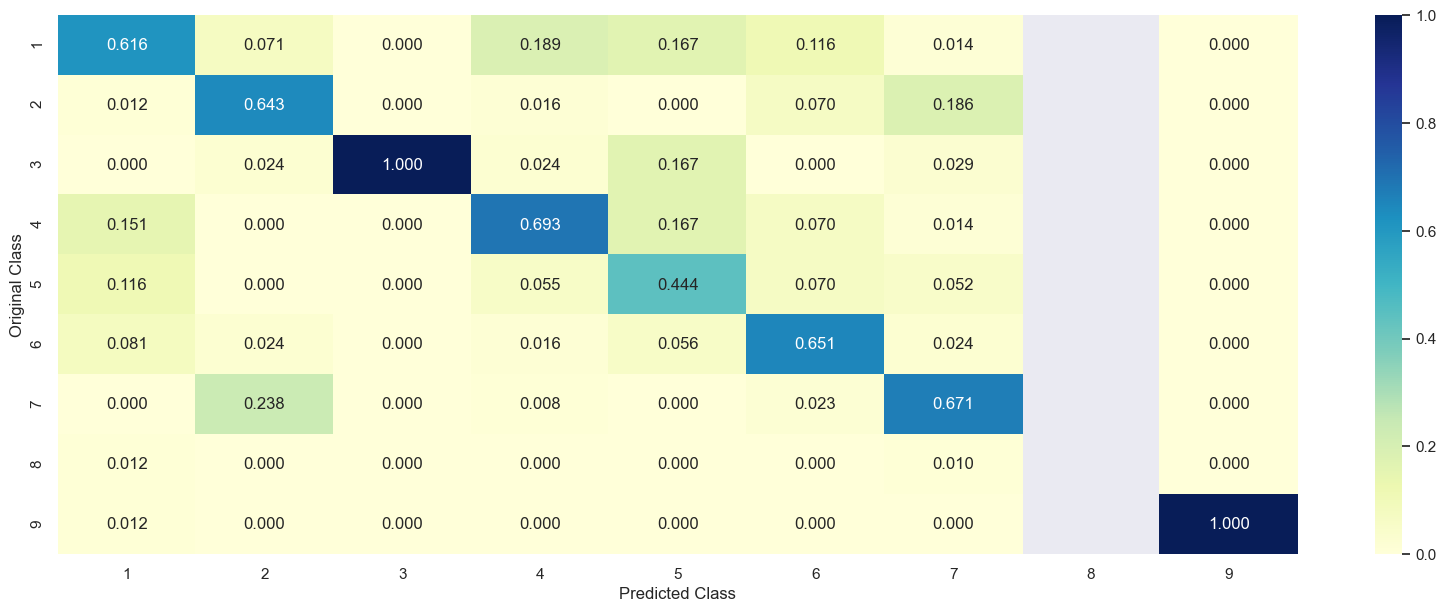

-------------------- Recall matrix (Row sum=1) --------------------


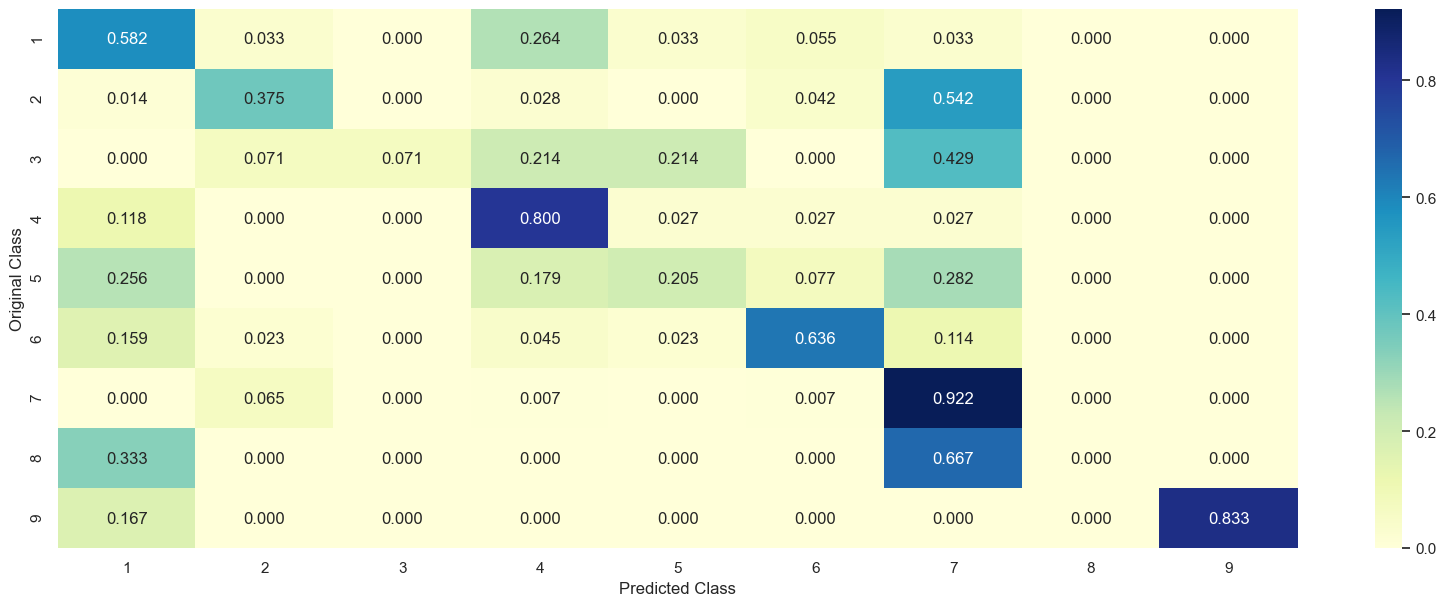

In [476]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [295]:
"""
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        # gene feature
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        # variation feature
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))
"""

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [479]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names_(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],\
                     test_df['Variation'].iloc[test_point_index],no_feature,vocab=top1000_tfidf_features)


Predicted Class : 7
Predicted Class Probabilities: [[0.0495 0.2628 0.0218 0.0502 0.0405 0.0616 0.4884 0.0074 0.0179]]
Actual Class : 7
--------------------------------------------------
23 Text feature [akt] present in test data point [True]
31 Text feature [erk] present in test data point [True]
65 Text feature [breast] present in test data point [True]
66 Text feature [ras] present in test data point [True]
81 Text feature [egf] present in test data point [True]
103 Text feature [acvr1] present in test data point [True]
121 Text feature [lines] present in test data point [True]
123 Text feature [mtor] present in test data point [True]
203 Text feature [ptpn11] present in test data point [True]
231 Text feature [fgfr3] present in test data point [True]
398 Text feature [patients] present in test data point [True]
417 Text feature [braf] present in test data point [True]
Out of the top  500  features  12 are present in query point


<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [483]:
test_point_index = 3
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names_(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],\
                     test_df['Variation'].iloc[test_point_index],no_feature,vocab=top1000_tfidf_features)


Predicted Class : 7
Predicted Class Probabilities: [[0.0093 0.2861 0.0072 0.0712 0.0507 0.0301 0.5392 0.0053 0.0007]]
Actual Class : 2
--------------------------------------------------
24 Text feature [egfr] present in test data point [True]
76 Text feature [kras] present in test data point [True]
81 Text feature [egf] present in test data point [True]
121 Text feature [lines] present in test data point [True]
306 Text feature [appendix] present in test data point [True]
398 Text feature [patients] present in test data point [True]
417 Text feature [braf] present in test data point [True]
Out of the top  500  features  7 are present in query point


<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.0846702173749376
for alpha = 1e-05
Log Loss : 1.0259247961574465
for alpha = 0.0001
Log Loss : 1.0152204295149365
for alpha = 0.001
Log Loss : 1.0132716990184383
for alpha = 0.01
Log Loss : 1.1937883203261124
for alpha = 0.1
Log Loss : 1.5311463334785715
for alpha = 1
Log Loss : 1.6934191090845863


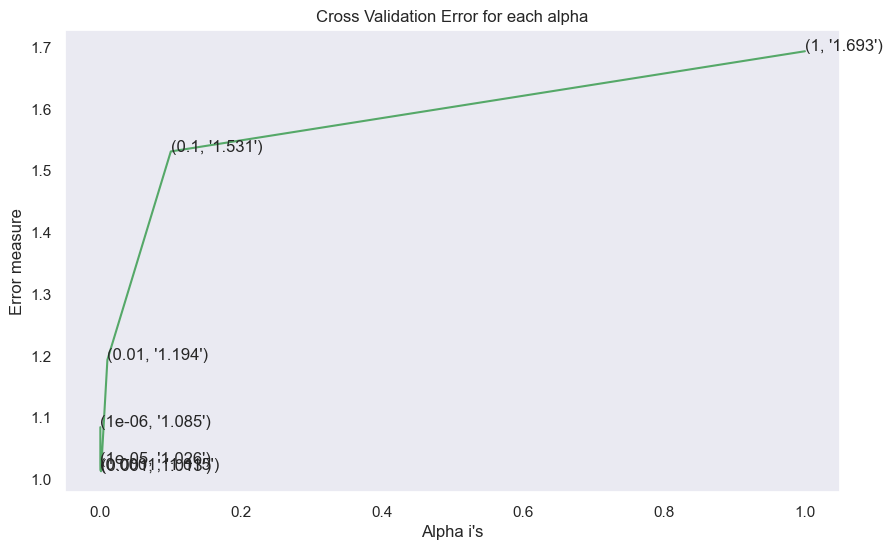

For values of best alpha =  0.001 The train log loss is: 0.7050992279385269
For values of best alpha =  0.001 The cross validation log loss is: 1.0132716990184383
For values of best alpha =  0.001 The test log loss is: 1.0157845594880128


In [484]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.0132716990184383
Number of mis-classified points : 34.962406015037594%
-------------------- Confusion matrix --------------------


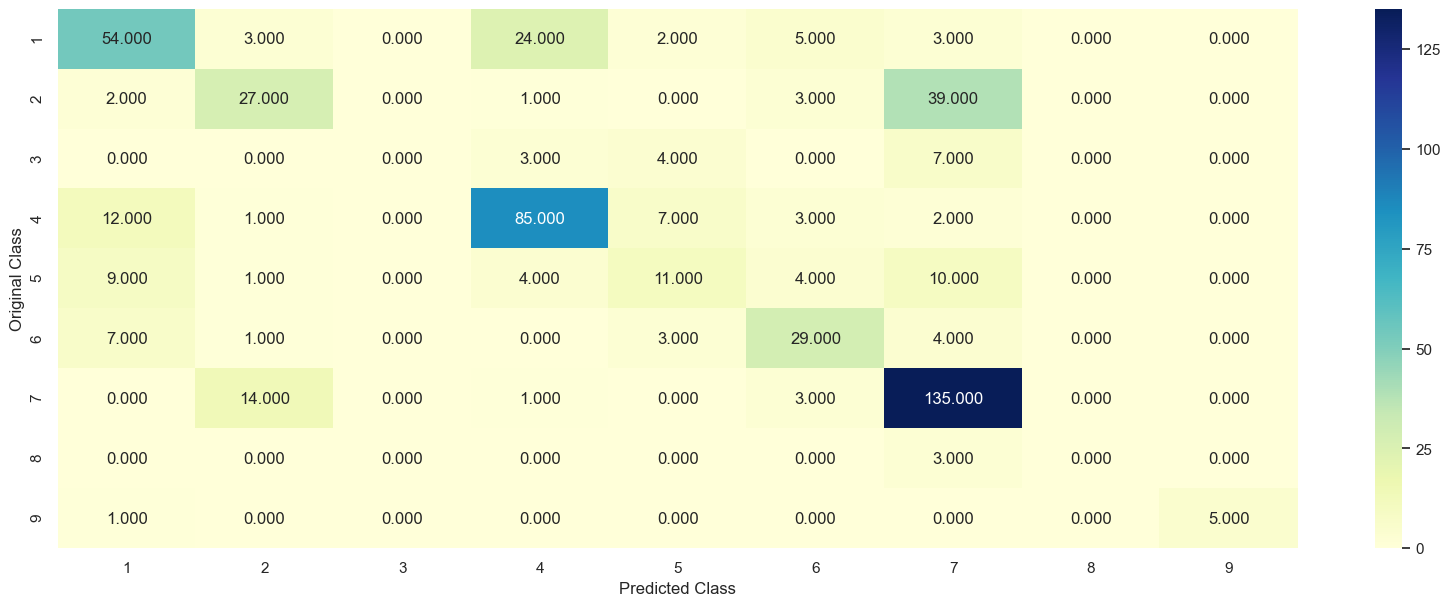

-------------------- Precision matrix (Columm Sum=1) --------------------


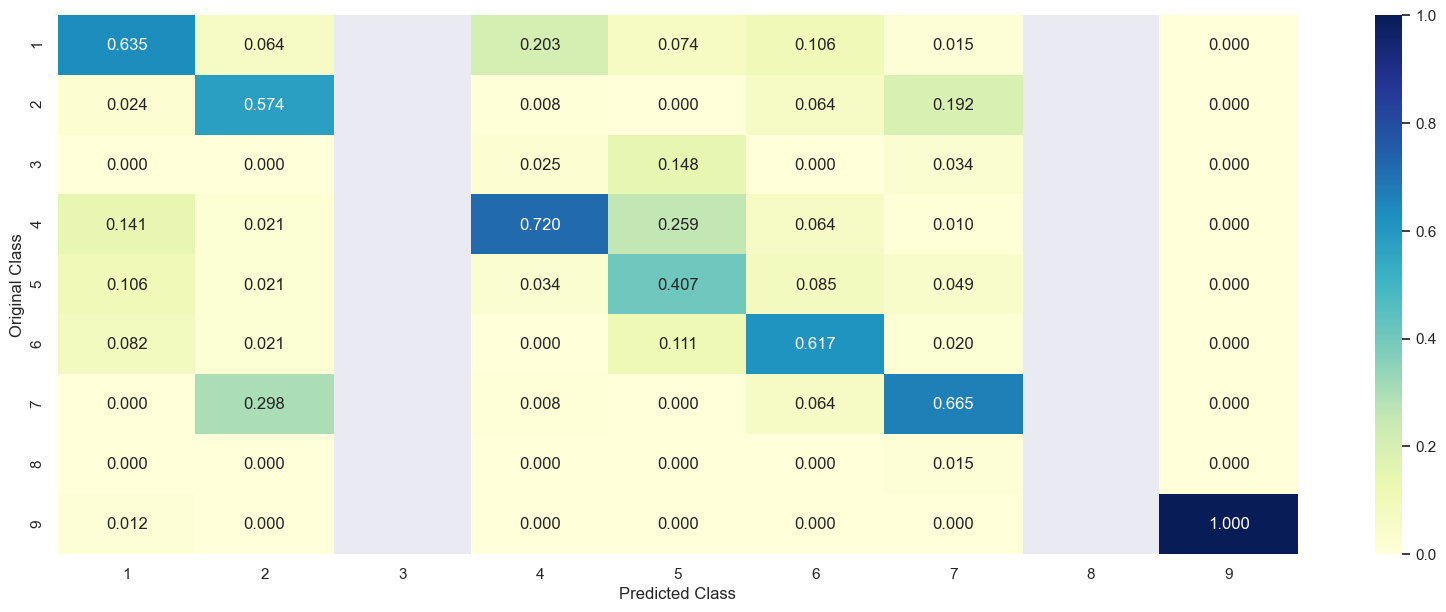

-------------------- Recall matrix (Row sum=1) --------------------


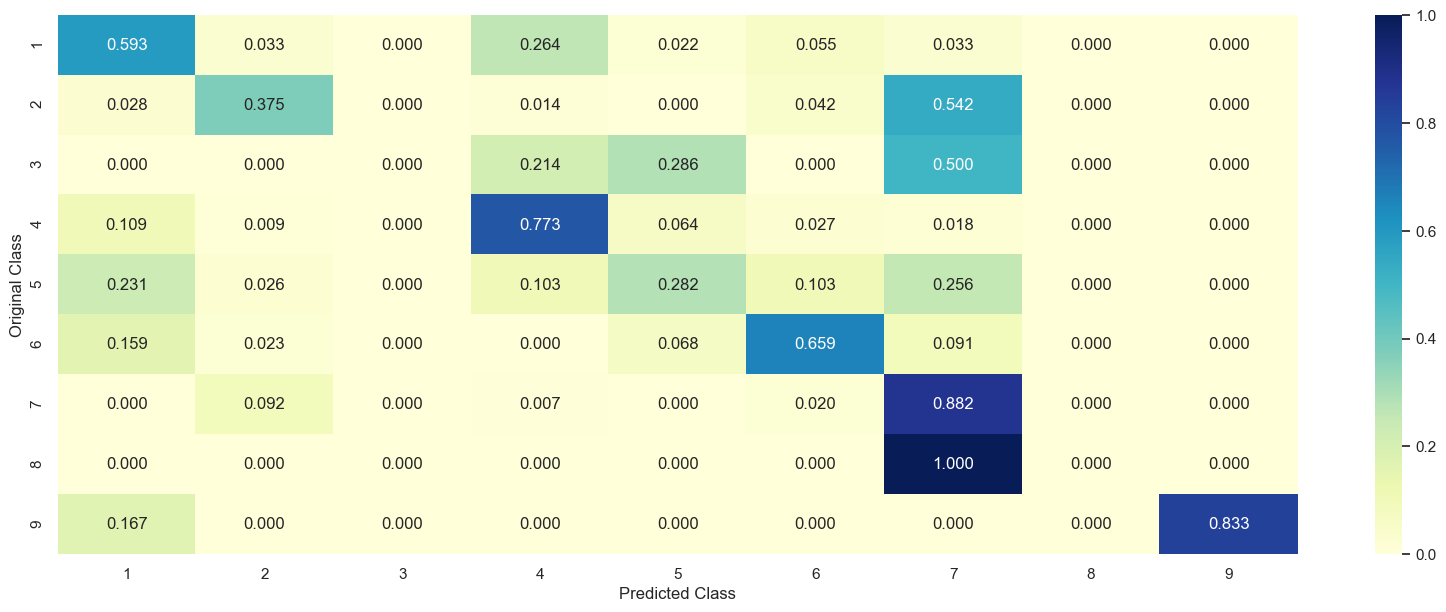

In [485]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [487]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names_(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],\
                     test_df['Variation'].iloc[test_point_index],no_feature,vocab=top1000_tfidf_features)


Predicted Class : 7
Predicted Class Probabilities: [[0.0895 0.2283 0.0218 0.1253 0.049  0.0726 0.3892 0.0124 0.0119]]
Actual Class : 7
--------------------------------------------------
21 Text feature [akt] present in test data point [True]
43 Text feature [pten] present in test data point [True]
51 Text feature [mtor] present in test data point [True]
57 Text feature [protein] present in test data point [True]
59 Text feature [erk] present in test data point [True]
67 Text feature [ras] present in test data point [True]
75 Text feature [patients] present in test data point [True]
125 Text feature [fgfr3] present in test data point [True]
126 Text feature [egf] present in test data point [True]
141 Text feature [splicing] present in test data point [True]
147 Text feature [braf] present in test data point [True]
148 Text feature [ptpn11] present in test data point [True]
155 Text feature [al] present in test data point [True]
156 Text feature [acvr1] present in test data point [True]


<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [269]:
test_point_index = 100
no_feature = 2
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],\
                     test_df['Variation'].iloc[test_point_index],no_feature,tc=bin_test_tc.iloc[test_point_index],\
                     uw=bin_test_uw.iloc[test_point_index],unw=bin_test_unw.iloc[test_point_index],\
                     nc=bin_test_nc.iloc[test_point_index],vc=bin_test_vc.iloc[test_point_index],\
                     vocab=top1000_tfidf_features,bin_features = x_binned_feat)

Predicted Class : 1
Predicted Class Probabilities: [[0.3971 0.0833 0.012  0.0814 0.039  0.1664 0.2145 0.0033 0.0029]]
Actual Class : 5
--------------------------------------------------
273 Text feature [elf3] present in test data point [True]
395 Binned feature [10th_percentile_unw] present in test data point [True]
404 Binned feature [80th_percentile_nc] present in test data point [True]
469 Text feature [kit] present in test data point [True]
Out of the top  500  features  4 are present in query point


<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.0452866553721776
for C = 0.0001
Log Loss : 1.0337453797272178
for C = 0.001
Log Loss : 1.0697393178053372
for C = 0.01
Log Loss : 1.2101097496126183
for C = 0.1
Log Loss : 1.5047311735975022
for C = 1
Log Loss : 1.7063943633358591
for C = 10
Log Loss : 1.708157793280475
for C = 100
Log Loss : 1.7081532951974836


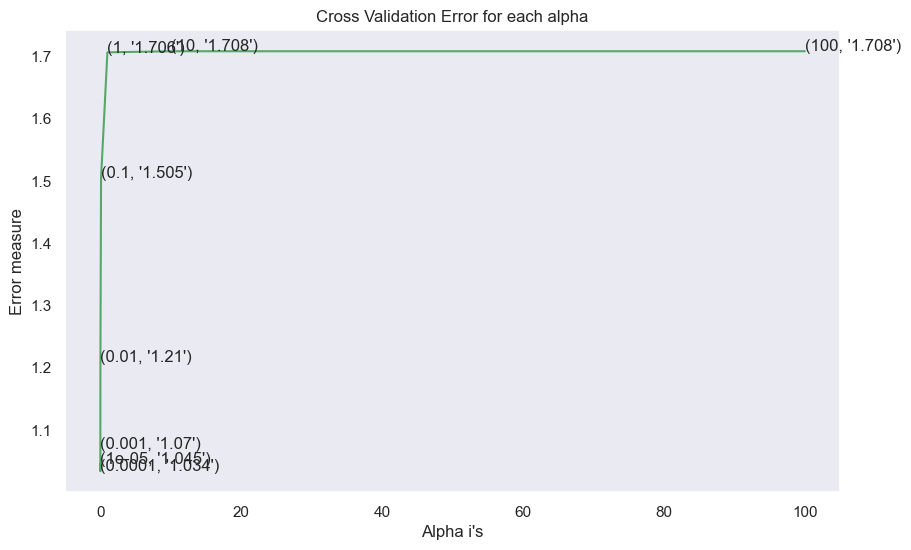

For values of best alpha =  0.0001 The train log loss is: 0.5594961767102351
For values of best alpha =  0.0001 The cross validation log loss is: 1.0337453797272178
For values of best alpha =  0.0001 The test log loss is: 1.018337797908661


In [488]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.0337453797272178
Number of mis-classified points : 33.83458646616541%
-------------------- Confusion matrix --------------------


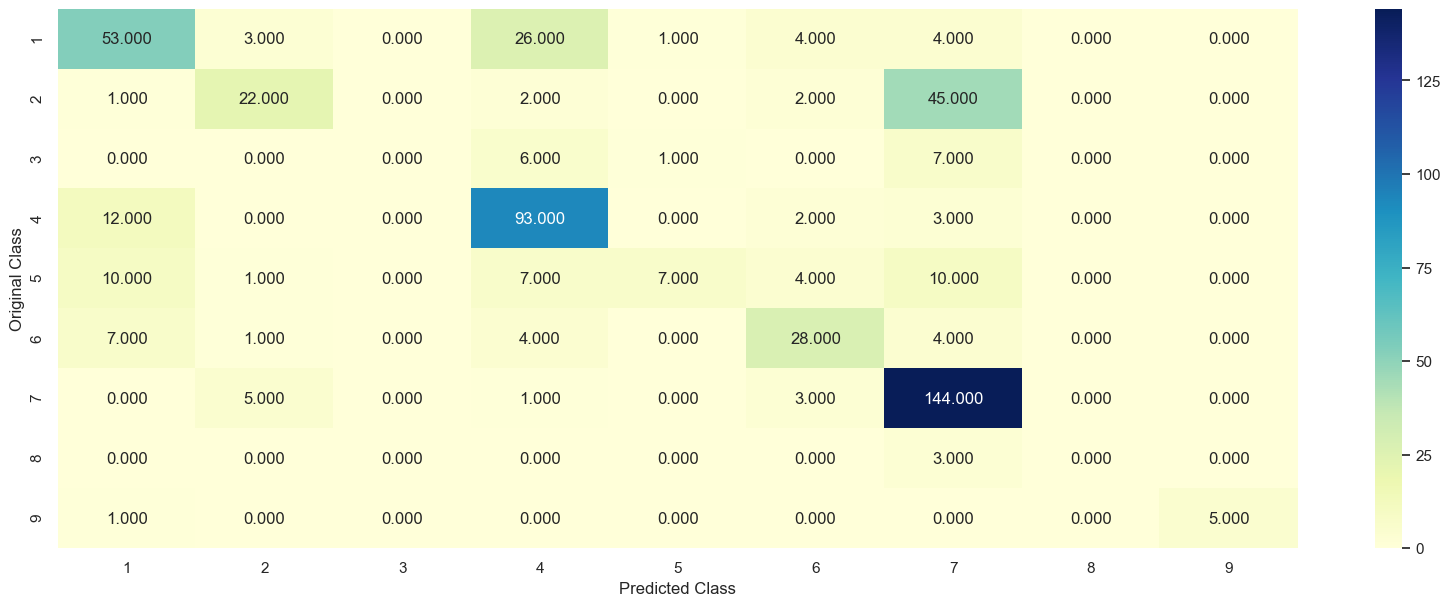

-------------------- Precision matrix (Columm Sum=1) --------------------


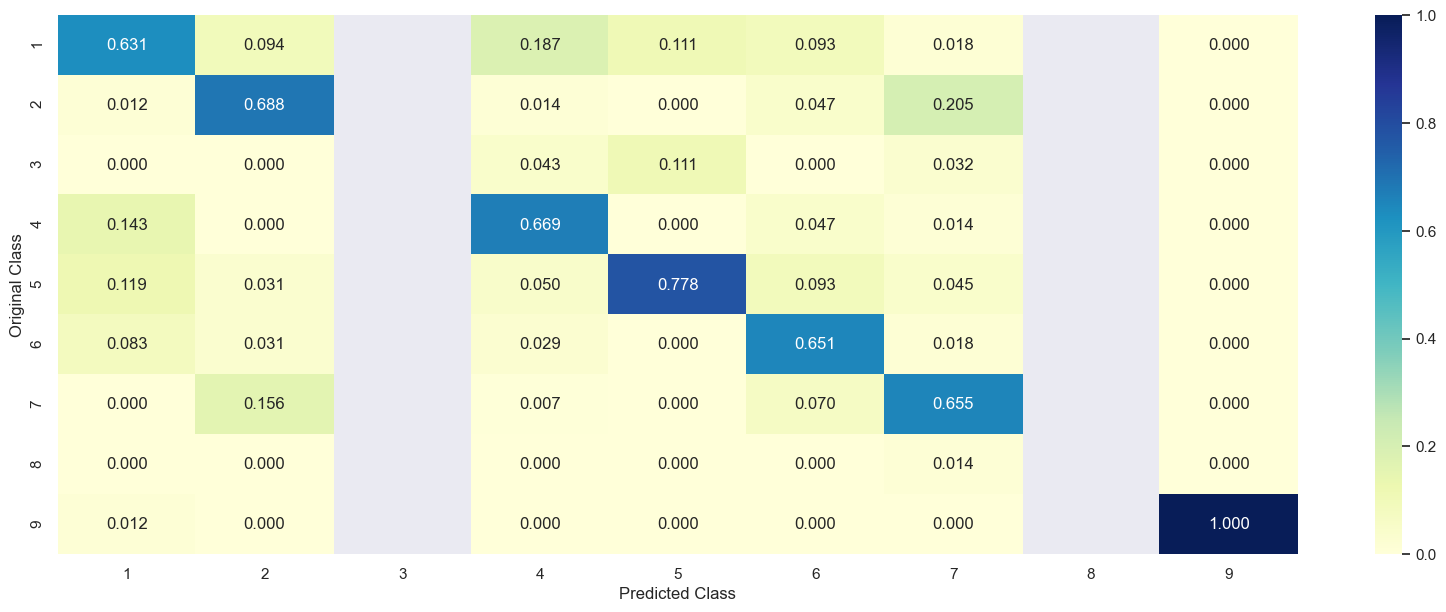

-------------------- Recall matrix (Row sum=1) --------------------


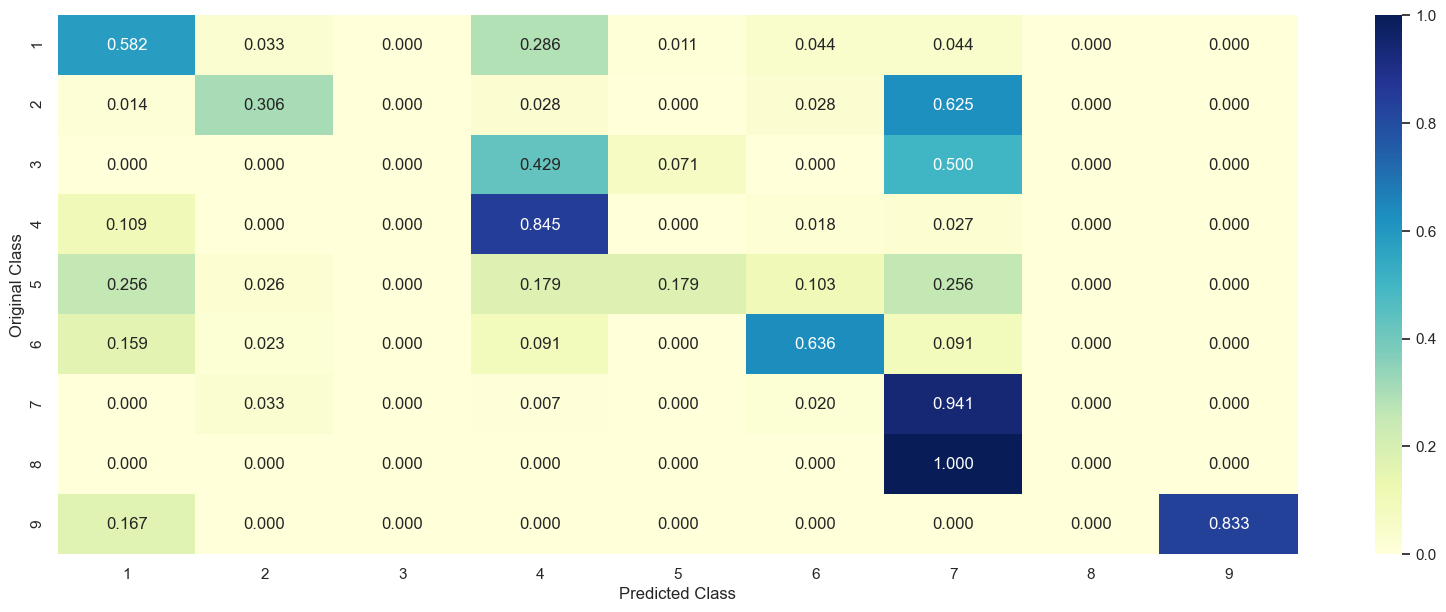

In [489]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [491]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names_(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],\
                     test_df['Variation'].iloc[test_point_index],no_feature,vocab=top1000_tfidf_features)


Predicted Class : 7
Predicted Class Probabilities: [[0.0422 0.3122 0.0209 0.0568 0.0386 0.0354 0.4791 0.0081 0.0066]]
Actual Class : 7
--------------------------------------------------
34 Text feature [breast] present in test data point [True]
60 Text feature [erk] present in test data point [True]
112 Text feature [egf] present in test data point [True]
262 Text feature [acvr1] present in test data point [True]
333 Text feature [lines] present in test data point [True]
383 Text feature [mtor] present in test data point [True]
397 Text feature [akt] present in test data point [True]
475 Text feature [ras] present in test data point [True]
477 Text feature [nras] present in test data point [True]
Out of the top  500  features  9 are present in query point


<h4>4.3.3.2. For Incorrectly classified point</h4>

In [498]:
test_point_index = 5
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names_(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],\
                     test_df['Variation'].iloc[test_point_index],no_feature,vocab=top1000_tfidf_features)

Predicted Class : 7
Predicted Class Probabilities: [[0.0042 0.3931 0.0072 0.0095 0.0037 0.0015 0.5745 0.0042 0.002 ]]
Actual Class : 2
--------------------------------------------------
59 Text feature [ret] present in test data point [True]
153 Text feature [dasatinib] present in test data point [True]
154 Text feature [hotspots] present in test data point [True]
200 Text feature [cyclin] present in test data point [True]
201 Text feature [gists] present in test data point [True]
263 Text feature [flt3] present in test data point [True]
329 Text feature [ph] present in test data point [True]
330 Text feature [appendix] present in test data point [True]
333 Text feature [lines] present in test data point [True]
381 Text feature [pdgfrb] present in test data point [True]
382 Text feature [pd] present in test data point [True]
383 Text feature [mtor] present in test data point [True]
397 Text feature [akt] present in test data point [True]
459 Text feature [vegfr] present in test data po

<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [499]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.1519327213168888
for n_estimators = 100 and max depth =  10
Log Loss : 1.0744414119227441
for n_estimators = 200 and max depth =  5
Log Loss : 1.1508484484875414
for n_estimators = 200 and max depth =  10
Log Loss : 1.0723825006659655
for n_estimators = 500 and max depth =  5
Log Loss : 1.1437032153467095
for n_estimators = 500 and max depth =  10
Log Loss : 1.0649706744544498
for n_estimators = 1000 and max depth =  5
Log Loss : 1.1354906437723635
for n_estimators = 1000 and max depth =  10
Log Loss : 1.0610606544078747
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1326945091655178
for n_estimators = 2000 and max depth =  10
Log Loss : 1.0589207215282108
For values of best estimator =  2000 The train log loss is: 0.7456986678725602
For values of best estimator =  2000 The cross validation log loss is: 1.0589207215282108
For values of best estimator =  2000 The test log loss is: 1.0882022901298503


<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.0589207215282108
Number of mis-classified points : 35.714285714285715%
-------------------- Confusion matrix --------------------


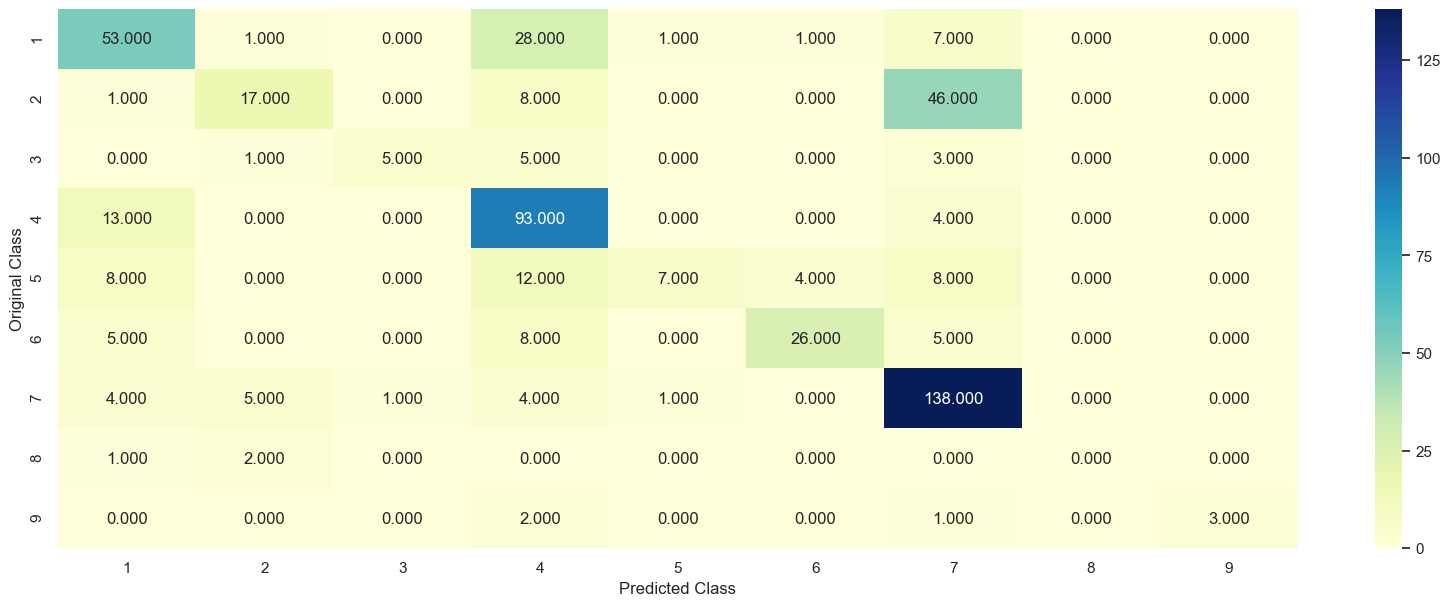

-------------------- Precision matrix (Columm Sum=1) --------------------


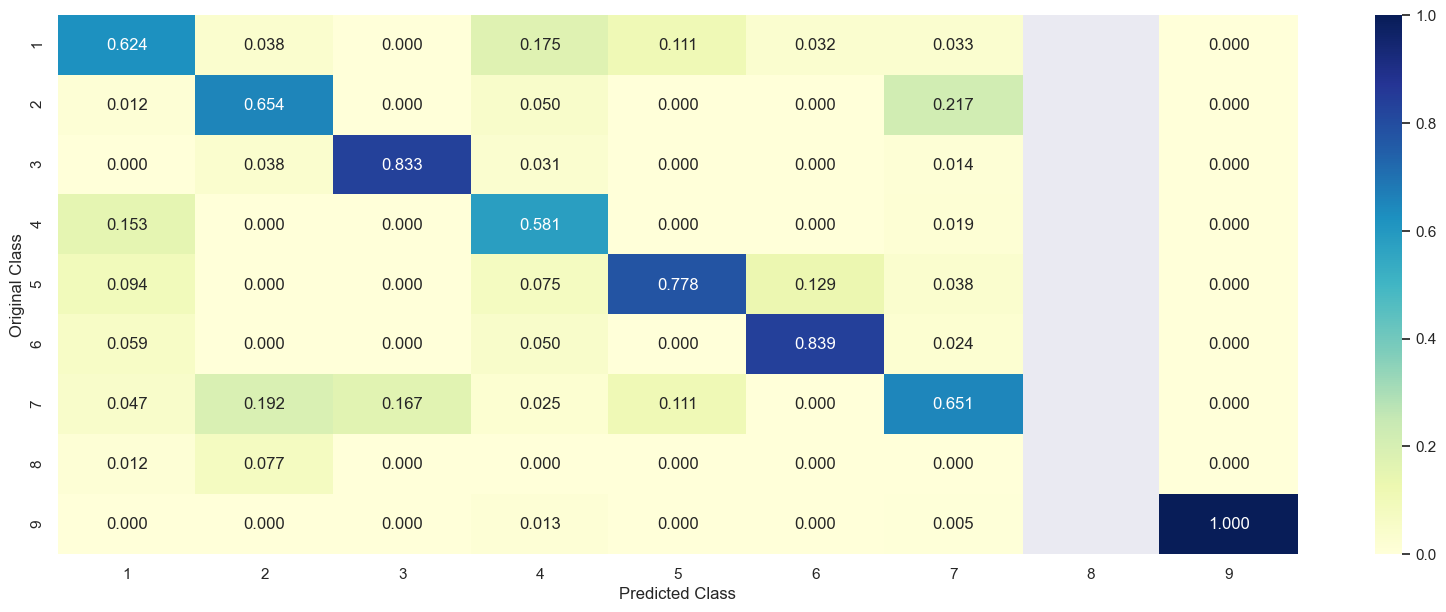

-------------------- Recall matrix (Row sum=1) --------------------


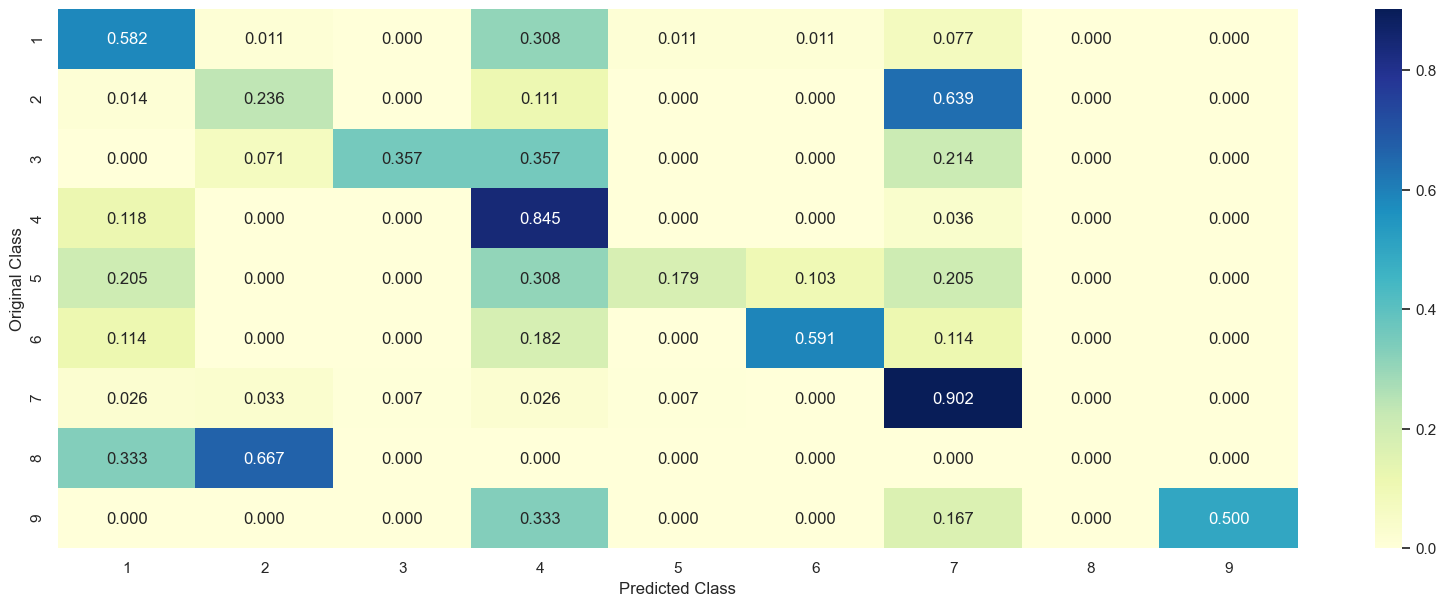

In [500]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [505]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names_(indices, test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],\
                     test_df['Variation'].iloc[test_point_index],no_feature,vocab=top1000_tfidf_features)



Predicted Class : 7
Predicted Class Probabilities: [[0.0495 0.2599 0.0214 0.0929 0.0492 0.0403 0.4735 0.0069 0.0064]]
Actual Class : 7
--------------------------------------------------
0 Text feature [protein] present in test data point [True]
1 Text feature [akt] present in test data point [True]
2 Text feature [patients] present in test data point [True]
4 Text feature [lines] present in test data point [True]
7 Text feature [erk] present in test data point [True]
8 variation length feature is important
11 Text feature [pten] present in test data point [True]
12 Text feature [phosphatase] present in test data point [True]
14 word length feature is important
16 Text feature [ras] present in test data point [True]
28 Text feature [splicing] present in test data point [True]
32 Text feature [breast] present in test data point [True]
33 noun to verb ration feature is important
36 Text Count feature is important
37 Unique Words feature is important
40 Text feature [al] present in test da

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [515]:
test_point_index = 3
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)[:no_feature]
print("-"*50)

get_impfeature_names_(indices, test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],\
                     test_df['Variation'].iloc[test_point_index],no_feature,vocab=top1000_tfidf_features)



Predicted Class : 7
Predicted Class Probabilities: [[0.0681 0.2506 0.0226 0.0924 0.0512 0.0472 0.4501 0.0098 0.0079]]
Actuall Class : 2
--------------------------------------------------
0 Text feature [protein] present in test data point [True]
2 Text feature [patients] present in test data point [True]
4 Text feature [lines] present in test data point [True]
5 Text feature [resistance] present in test data point [True]
8 variation length feature is important
11 Text feature [pten] present in test data point [True]
12 Text feature [phosphatase] present in test data point [True]
14 word length feature is important
18 Text feature [phosphoinositide] present in test data point [True]
22 Text feature [kit] present in test data point [True]
30 Text feature [egfr] present in test data point [True]
33 noun to verb ration feature is important
34 Text feature [pi3k] present in test data point [True]
36 Text Count feature is important
37 Unique Words feature is important
38 Text feature [exon] 

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [516]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 2.054182093136344
for n_estimators = 10 and max depth =  3
Log Loss : 1.7096057382933418
for n_estimators = 10 and max depth =  5
Log Loss : 1.3967451814245493
for n_estimators = 10 and max depth =  10
Log Loss : 2.1710410960673774
for n_estimators = 50 and max depth =  2
Log Loss : 1.6590428433434858
for n_estimators = 50 and max depth =  3
Log Loss : 1.4354289156878597
for n_estimators = 50 and max depth =  5
Log Loss : 1.380621377273672
for n_estimators = 50 and max depth =  10
Log Loss : 1.9150890385778307
for n_estimators = 100 and max depth =  2
Log Loss : 1.5140623805438074
for n_estimators = 100 and max depth =  3
Log Loss : 1.4731612913471566
for n_estimators = 100 and max depth =  5
Log Loss : 1.295324918527419
for n_estimators = 100 and max depth =  10
Log Loss : 1.9088126968719912
for n_estimators = 200 and max depth =  2
Log Loss : 1.535719761941956
for n_estimators = 200 and max depth =  3
Log Loss : 1.4715082896569123
f

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.295324918527419
Number of mis-classified points : 43.609022556390975%
-------------------- Confusion matrix --------------------


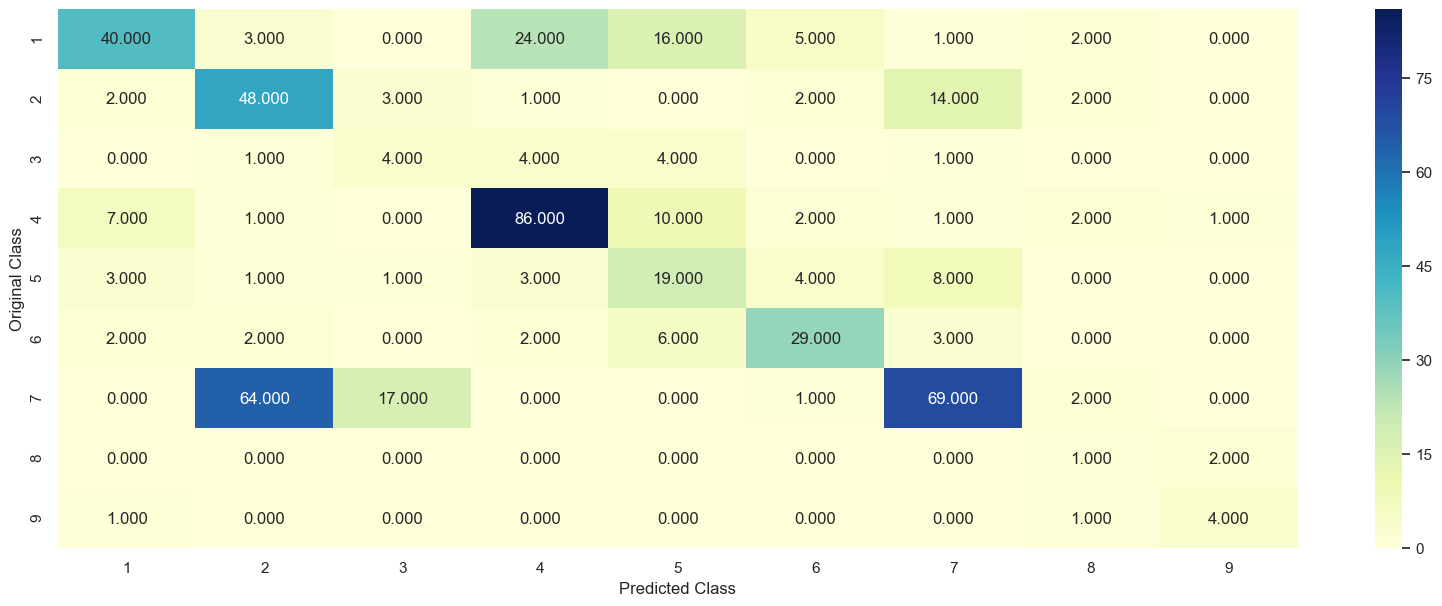

-------------------- Precision matrix (Columm Sum=1) --------------------


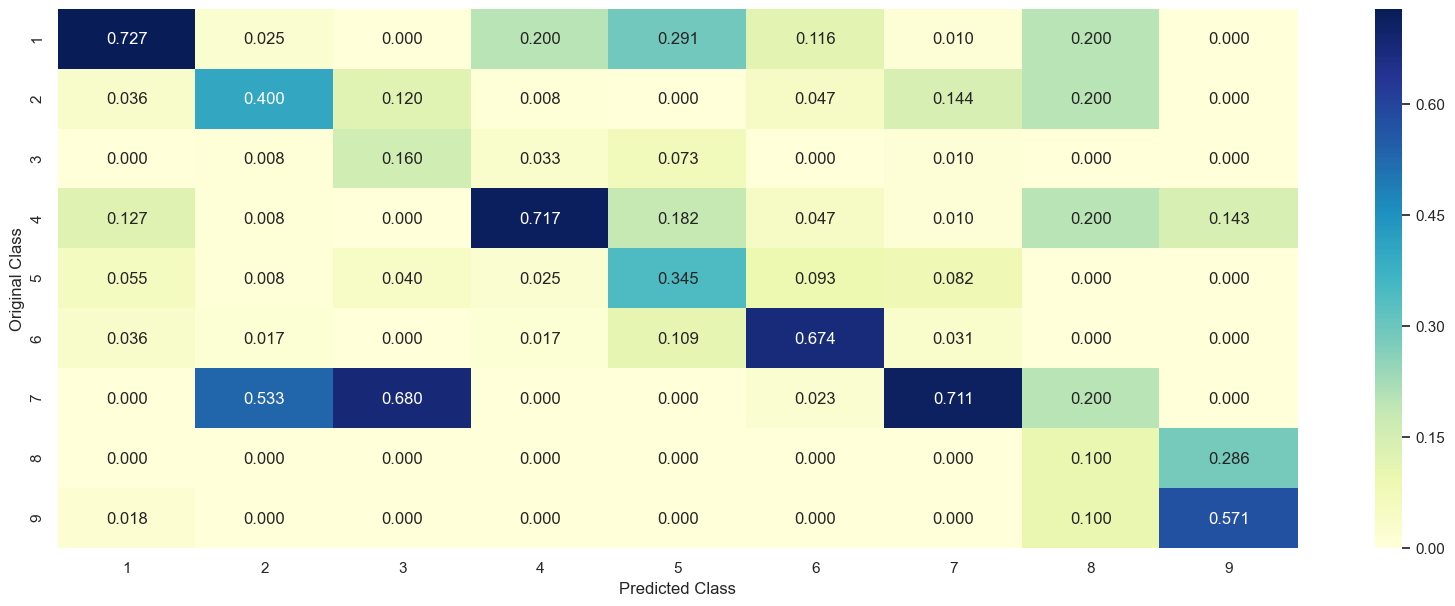

-------------------- Recall matrix (Row sum=1) --------------------


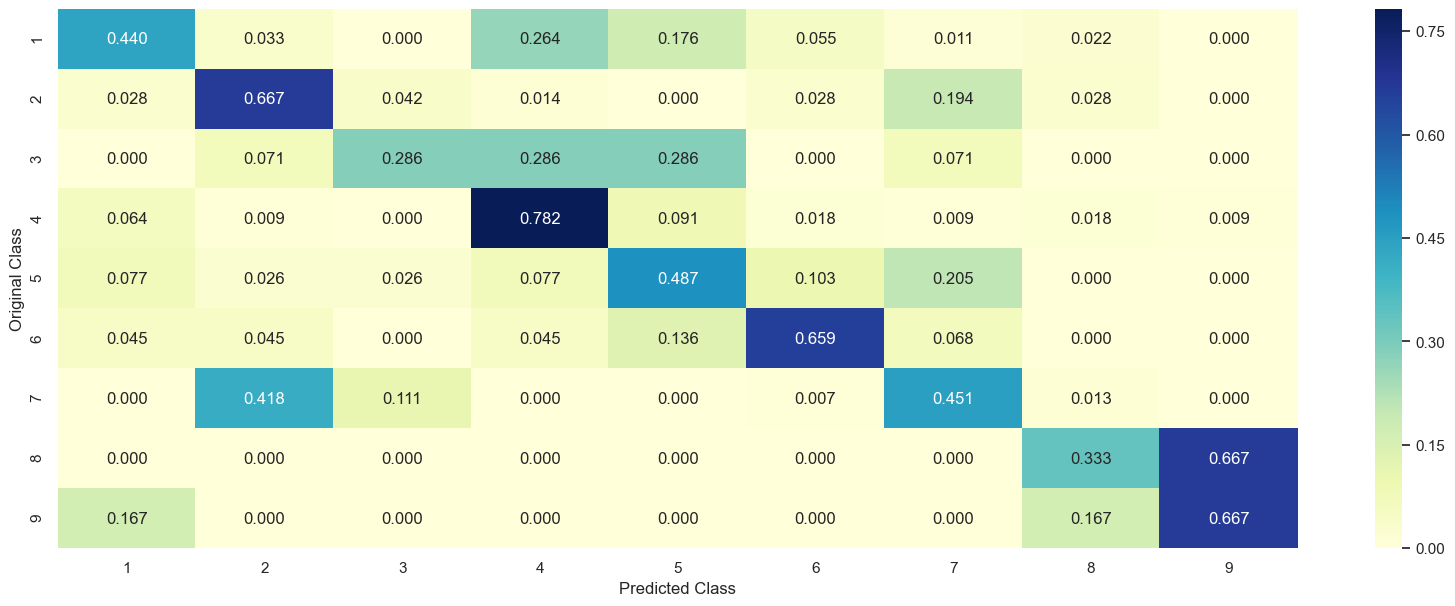

In [517]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

Clearly, We can see that Random Forest model with response coding is the worst performer of all. 

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [518]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 3
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[0.0113 0.4308 0.1014 0.0176 0.0377 0.0371 0.3035 0.0486 0.012 ]]
Actual Class : 2
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Gene is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [520]:
test_point_index = 2
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[0.0064 0.7855 0.0302 0.0098 0.0164 0.0225 0.0964 0.0255 0.0072]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Gene is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [523]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

# Using models with higher variance so that the bagging can introduce bias and led more better generalization

clf1 = SGDClassifier(alpha=0.00001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.001, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.01)
clf3.fit(train_x_onehotCoding_nb, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding_nb, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding_nb))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding_nb, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding_nb))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding_nb))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.01
Support vector machines : Log Loss: 1.08
Naive Bayes : Log Loss: 1.19
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.179
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.043
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.560
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.140
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.174
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.523


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.40686732204162446
Log loss (CV) on the stacking classifier : 1.1404348172505787
Log loss (test) on the stacking classifier : 1.1565324514380781
Number of missclassified point : 0.3533834586466165
-------------------- Confusion matrix --------------------


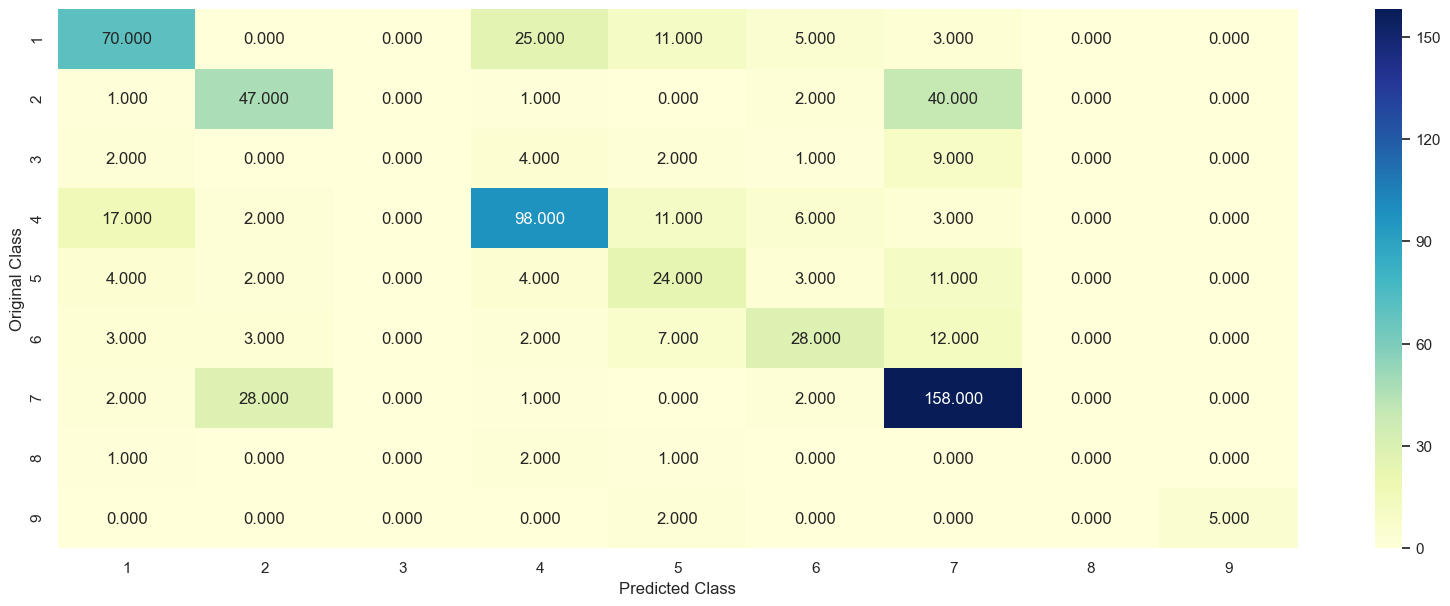

-------------------- Precision matrix (Columm Sum=1) --------------------


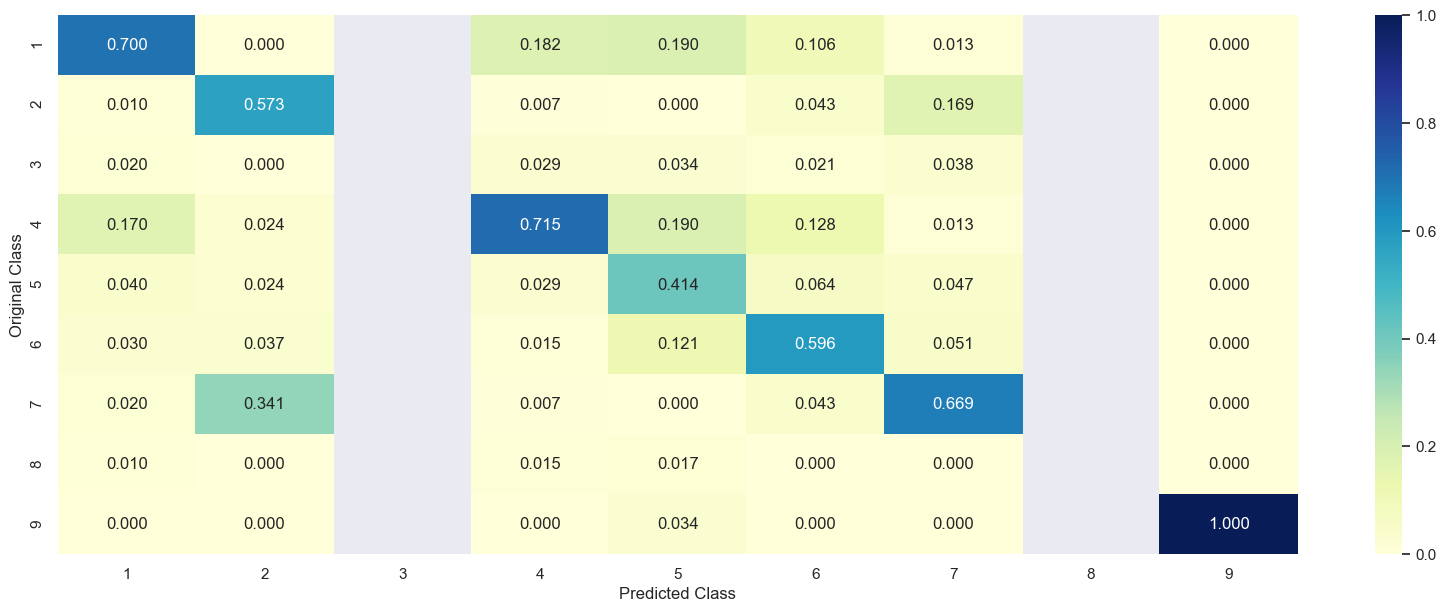

-------------------- Recall matrix (Row sum=1) --------------------


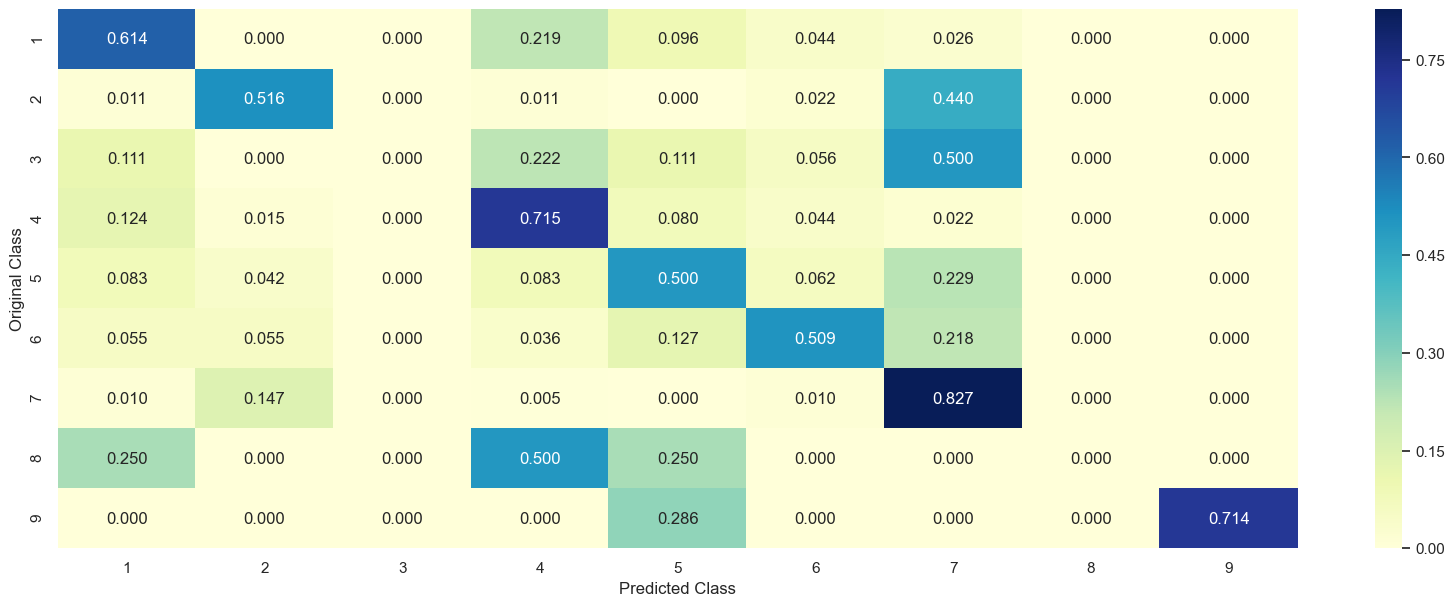

In [525]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding_nb, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding_nb))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding_nb))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding_nb))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding_nb)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding_nb))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.5508270555559328
Log loss (CV) on the VotingClassifier : 1.1973104549756328
Log loss (test) on the VotingClassifier : 1.2056492112042412
Number of missclassified point : 0.3609022556390977
-------------------- Confusion matrix --------------------


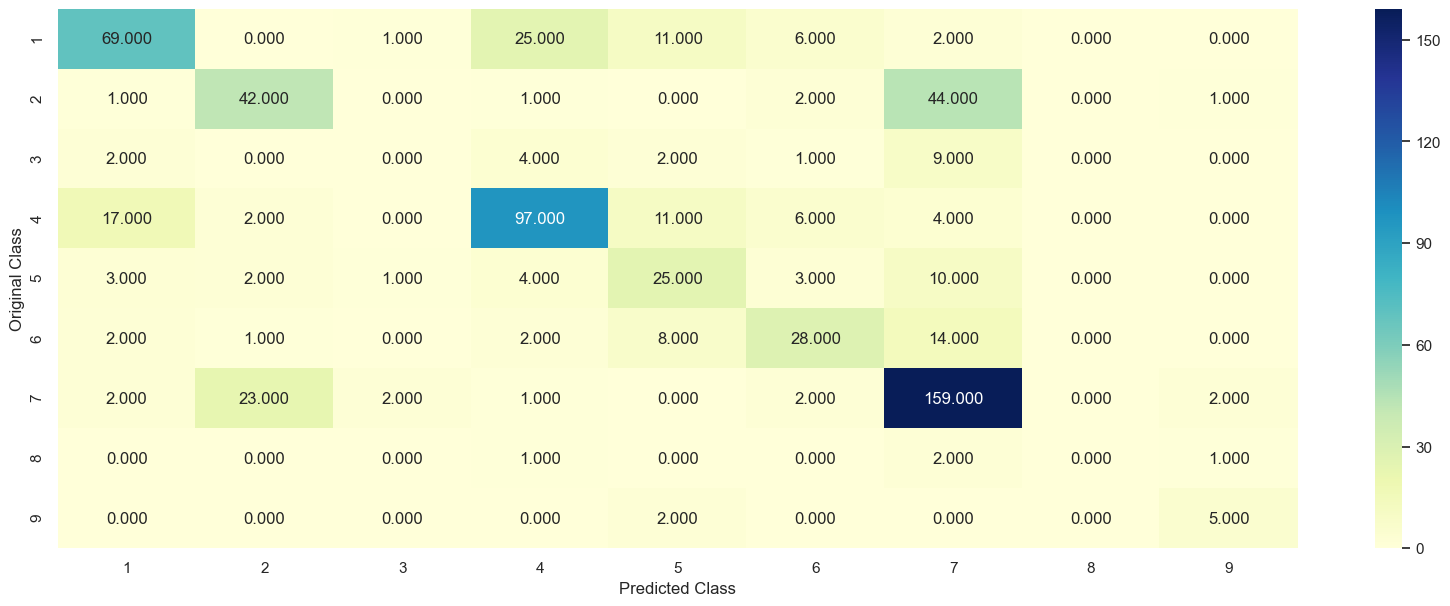

-------------------- Precision matrix (Columm Sum=1) --------------------


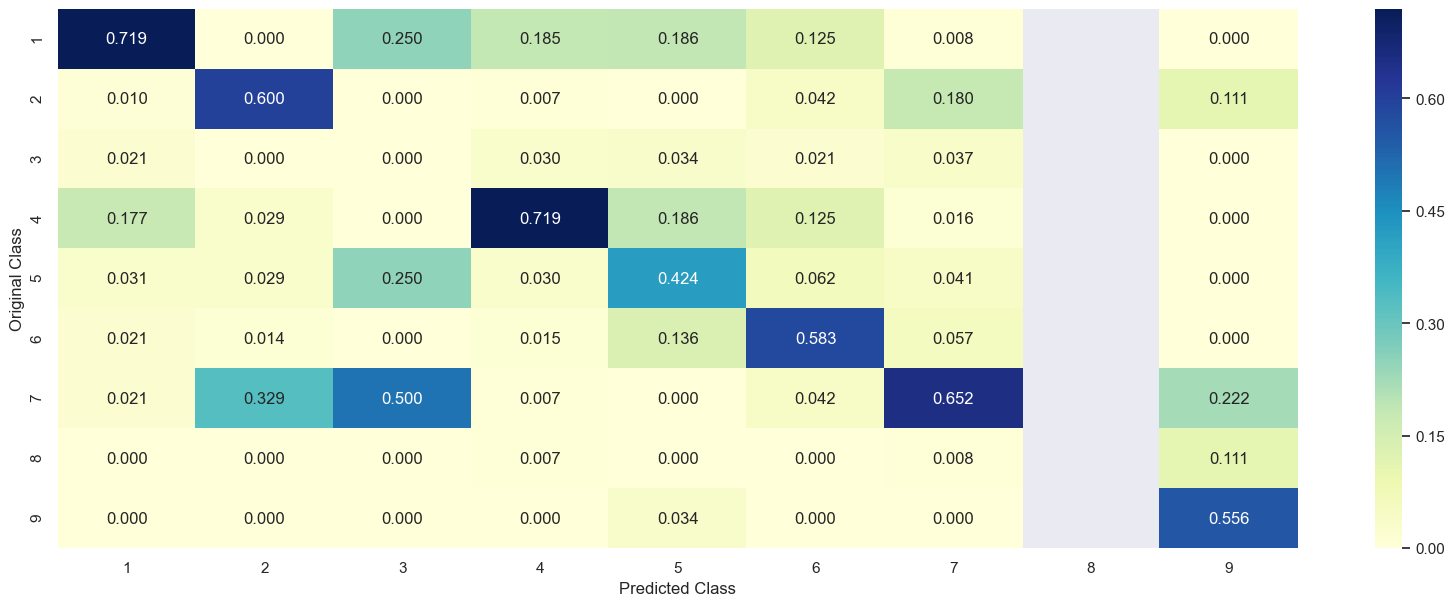

-------------------- Recall matrix (Row sum=1) --------------------


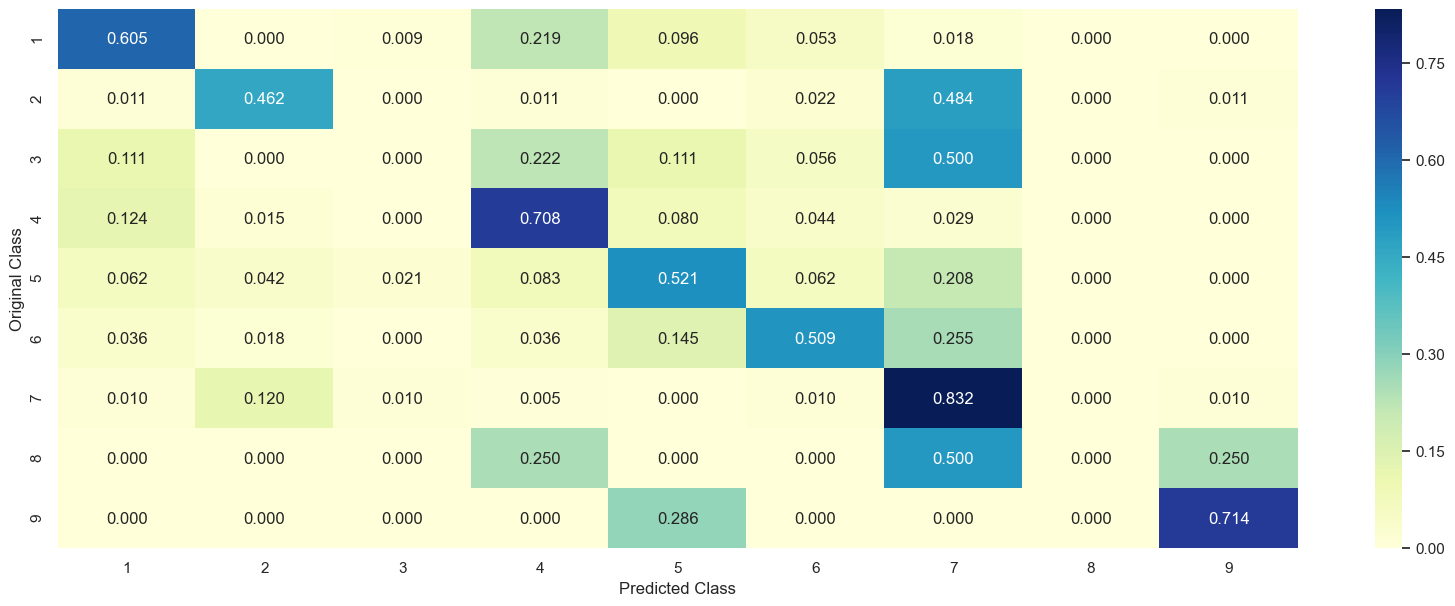

In [527]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding_nb, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding_nb)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding_nb)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding_nb)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding_nb)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding_nb))

<h1>5. Assignments</h1>

<ol>
    <li> Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer and run the same cells)</li>
    <li> Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
    <li> Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0</li>
</ol>

#### Now applying Logistic regression with unigrams and bigrams features 

In [528]:
# creating the uni-grams and bigrams features -

# Building TFIDF vectorizer model
tfidf_vec = TfidfVectorizer(min_df=3,ngram_range=(1, 2))
tfidf_train_vec = tfidf_vec.fit_transform(train_df['TEXT'])
tfidf_feat = tfidf_vec.get_feature_names()
print(tfidf_feat[:100])


['00', '00 00', '00 0005', '00 006', '00 02', '00 03', '00 05', '00 06', '00 08', '00 10', '00 1010', '00 11', '00 116', '00 12', '00 15', '00 16', '00 17', '00 171', '00 21', '00 29', '00 30', '00 32', '00 33', '00 34', '00 35', '00 37', '00 38', '00 47', '00 48', '00 49', '00 50', '00 52', '00 53', '00 56', '00 58', '00 60', '00 61', '00 64', '00 65', '00 67', '00 68', '00 70', '00 713', '00 74', '00 75', '00 81', '00 82', '00 84', '00 85', '00 93', '00 97', '00 99', '00 accepted', '00 associated', '00 copyright', '00 costs', '00 d835y', '00 deleterious', '00 doi', '00 fahsold', '00 fig', '00 graphpad', '00 growth', '00 http', '00 introduction', '00 krkljus', '00 li', '00 mb', '00 na', '00 novelc', '00 novelfigure', '00 ns', '00 pdgfra', '00 primer', '00 revised', '00 significantly', '00 softgenetics', '00 table', '00 tat', '00 trovo', '00 upadhyaya', '00 wild', '00 windows', '00 www', '000', '000 00', '000 000', '000 003', '000 005', '000 033', '000 05a', '000 10', '000 100', '000 1

In [529]:
tfidf_train_vec.shape

(2124, 768107)

In [530]:
# The features will be in descending order 
top1000_tfidf_feat = get_top_tf_idf_words(tfidf_vec, x=tfidf_train_vec, top_n=5000)
print(top1000_tfidf_feat[:10])
print("Total Number of unique features will be - ",len(list(set(top1000_tfidf_feat))))

['braf' 'fgfr3' 'rad54' 'flt1' 'fat1' 'ptprd' 'fat1' 'ago2' 'kmt2d'
 'foxa1']
Total Number of unique features will be -  1352


In [531]:
# Now selecting the Top 1000 features responsible for top 1000 TFIDF value

d = defaultdict(int)
top1000_tfidf_features = []
for words in top1000_tfidf_feat:
    try:
        d[words] += 1
        if d[words] < 2 and len(top1000_tfidf_features)<1000:
            top1000_tfidf_features.append(words)
    except:
        print("Exeption raised !!")
print("The Top 10 words are : ",top1000_tfidf_features[:10])
print("Done ... ")

The Top 10 words are :  ['braf', 'fgfr3', 'rad54', 'flt1', 'fat1', 'ptprd', 'ago2', 'kmt2d', 'foxa1', 'merlin']
Done ... 


In [532]:
# now let us understand how many features are present in cv and test data in this top 1000 TFIDF features.
# https://stackoverflow.com/questions/25116595/understanding-numpys-dstack-function
print("Intersection of cv text with top 1000 tfidf features\n")
print(set(np.dstack([cv_df['TEXT']]).flatten()[0].split()).intersection(set(top1000_tfidf_features)))
print("{}% of train features are present in cv".format((len(set(np.dstack([cv_df['TEXT']]).flatten()[0].split()).intersection(set(top1000_tfidf_features)))/len(top1000_tfidf_features))*100))
print("-"*70)
print("Intersection of test text with top 1000 tfidf features\n")
print(set(np.dstack([test_df['TEXT']]).flatten()[0].split()).intersection(set(top1000_tfidf_features)))
print("{}% of train features are present in test".format((len(set(np.dstack([test_df['TEXT']]).flatten()[0].split()).intersection(set(top1000_tfidf_features)))/len(top1000_tfidf_features))*100))


Intersection of cv text with top 1000 tfidf features

{'uv', 'pten', 'ras', 'glioblastoma', 'xl', 'ptprd', 'ptp', 'gbm', 'melanoma', 'exo', 'ii', 'ig', 'g1', 'alleles', 'insulin', 'kit', 'p16ink4a', 'kg', 'surveyor', 'pik3ca', 'raf', 'u87mg', 'her2', 'amplification', 'p53'}
2.5% of train features are present in cv
----------------------------------------------------------------------
Intersection of test text with top 1000 tfidf features

{'ap26113', 'ki', 'egfr', 'alk', 'hotspots', 'al', 'f1174l', 'gefitinib', 'notch1', 'pten', 'families', 'lymphoma', 'melanomas', 'mek', 'kras', 'jak2', 'nras', 'ros1', 'src', 'stat3', 'mycn', 'met', 'ii', 'pd', 'akt', 'pi3k', 'et', 'abl', 'mek1', 'nrg1', 'lorlatinib', '06463922', 'apc', 'fusion', 'pc9', 'imatinib', 'alectinib', 'caspase', 'insulin', 'kit', 'fusions', 'kg', 'bcr', 'pik3ca', 'bim', 'erbb3', 'asp3026', 'pdgfr', 'mtor', 'neuroblastoma', 'akt1', 'braf', 'her2', 'resistance', 'amplification', 'crizotinib', 'igf', 'ceritinib', 'flt3', 'erbb'

In [533]:
# Now using this top 1000 tfidf features to re-train the tfidf model
tfidf_vec = TfidfVectorizer(vocabulary=top1000_tfidf_features)
tfidf_train_vec = tfidf_vec.fit_transform(train_df['TEXT'])
tfidf_feat = tfidf_vec.get_feature_names()
print(tfidf_feat[:100])

['braf', 'fgfr3', 'rad54', 'flt1', 'fat1', 'ptprd', 'ago2', 'kmt2d', 'foxa1', 'merlin', 'kdm5a', 'bap1', 'ddr2', 'atr', 'fancj', 'xrcc2', 'rnf43', 'pak1', 'cdk12', 'ctcf', 'asxl1', 'casp8', 'carm1', 'lkb1', 'foxp1', 'ercc3', 'mef2b', 'ppm1d', 'fbw7', 'ret', 'mga', 'caspase', 'rit1', 'fgfr2', 'brip1', 'ezh2', 'raf', 'vhl', 'elf3', 'myd88', 'srsf2', 'sox9', 'nrf2', 'ercc4', 'hla', 'atm', 'trkb', 'npm1', 'gata3', 'alk', 'hnf', 'stag2', 'etv6', 'kdm5c', 'rybp', 'cbl', 'mpl', 'chek2', 'fgfr4', 'map3k1', 'btk', 'vegfa', 'mll', 'bcor', 'smo', 'rkip', 'igf1r', 'atrx', 'her2', 'brd4', 'mycn', 'ros1', 'stk33', 'jak1', 'runx1', 'p16', 'bach1', 'erbb4', 'akt2', 'dicer1', 'nsd2', 'cbfa2', 'smad4', 'ercc2', 'prb', 'etv1', 'reacp53', 'smarca4', 'tsc2', 'pten', 'ptp', 'blimp1', 'med12', 'cohesin', 'u2af1', 'nf2', 'brca1', 'spop', 'idh1', 'myc']


In [534]:
# transforming the cv and test data
tfidf_cv_vec = tfidf_vec.transform(cv_df['TEXT'])
print("cv shape : ",tfidf_cv_vec.shape)
tfidf_test_vec = tfidf_vec.transform(test_df['TEXT'])
print("test shape : ",tfidf_test_vec.shape)

cv shape :  (532, 1000)
test shape :  (665, 1000)


In [302]:
# merging gene, variance and text features for Multinomial Naive Bayes

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))


train_x_onehotCoding = hstack((train_gene_var_onehotCoding,x_train_trans,tfidf_train_vec)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding,x_test_trans,tfidf_test_vec)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding,x_cv_trans,tfidf_cv_vec)).tocsr()
cv_y = np.array(list(cv_df['Class']))


print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_nb.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_nb.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_nb.shape)


One hot encoding features :
(number of data points * number of features) in train data =  (2124, 3247)
(number of data points * number of features) in test data =  (665, 3247)
(number of data points * number of features) in cross validation data = (532, 3247)


for alpha = 1e-06
Log Loss : 1.0587240781260494
for alpha = 1e-05
Log Loss : 1.0165145670941629
for alpha = 0.0001
Log Loss : 0.9951438992509186
for alpha = 0.001
Log Loss : 1.025422519360237
for alpha = 0.01
Log Loss : 1.2112302289525887
for alpha = 0.1
Log Loss : 1.5189228300706457
for alpha = 1
Log Loss : 1.6787552706966316
for alpha = 10
Log Loss : 1.704581526318001
for alpha = 100
Log Loss : 1.707766597228621


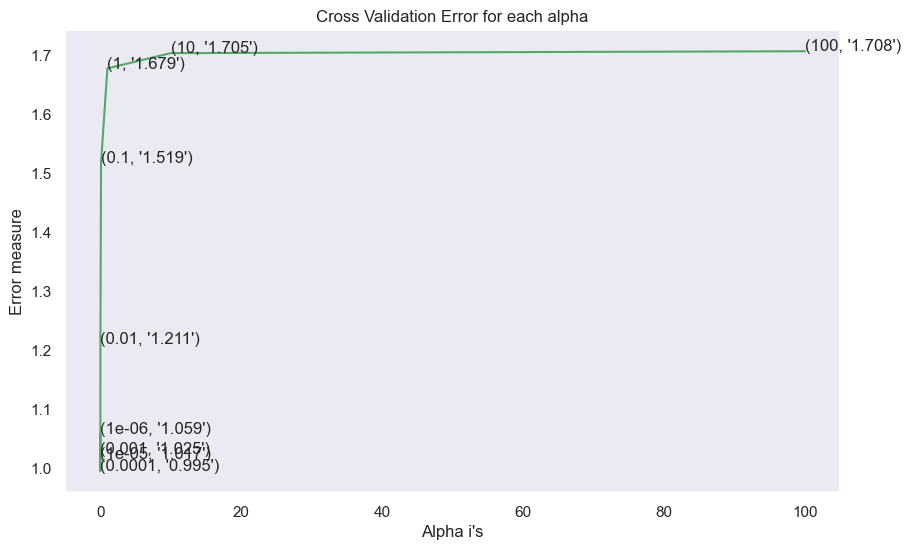

For values of best alpha =  0.0001 The train log loss is: 0.5567786961273666
For values of best alpha =  0.0001 The cross validation log loss is: 0.9951438992509186
For values of best alpha =  0.0001 The test log loss is: 1.0061316702143088


In [535]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### minimizing the log loss below 1

['00', '000', '0000001', '000001', '000002', '000007', '00001', '000011', '000012', '00002644', '00005', '000059', '000077', '0001', '000132', '00014', '000141', '000179', '0002', '0002158', '000245', '000249', '000251', '000258', '000267', '00029', '0003', '000369266', '00037', '0004', '0005', '000535', '000548', '000588', '0006', '0007', '0008', '00088', '0009', '000g', '000xg', '001', '0010', '0011', '001198', '0012', '001210', '0013', '0014', '0015', '0016', '001635', '001654', '0017', '0018', '001810', '0019', '001a', '002', '0021', '0022', '0023', '0024', '0025', '0025021', '0026', '0027', '002755', '0028', '002a', '003', '0030', '003008', '003133', '0032', '0033', '003333', '0034', '0035', '0036', '003797', '0038', '0039', '003a', '004', '0041', '0043', '004304', '00433', '004333', '0044', '004448', '004456', '0045', '0048', '004927', '004972', '004985', '005', '005026']
['fgfr3' 'braf' 'ptprd' 'flt1' 'fat1' 'fat1' 'ptprd' 'bap1' 'merlin'
 'elf3']
Total Number of unique features

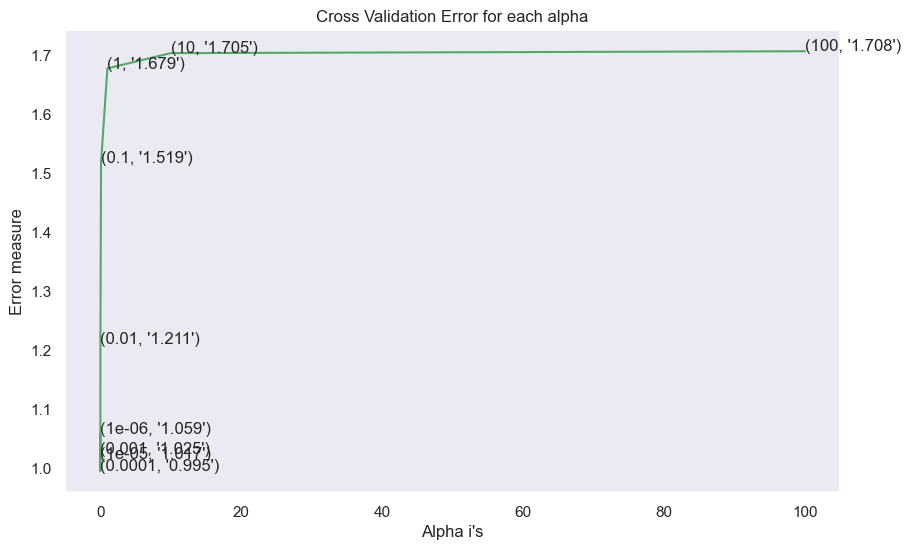

For values of best alpha =  0.0001 The train log loss is: 0.5567786961273666
For values of best alpha =  0.0001 The cross validation log loss is: 0.9951438992509186
For values of best alpha =  0.0001 The test log loss is: 1.0061316702143088
Log loss : 0.9951438992509186
Number of mis-classified points : 34.02255639097744%
-------------------- Confusion matrix --------------------


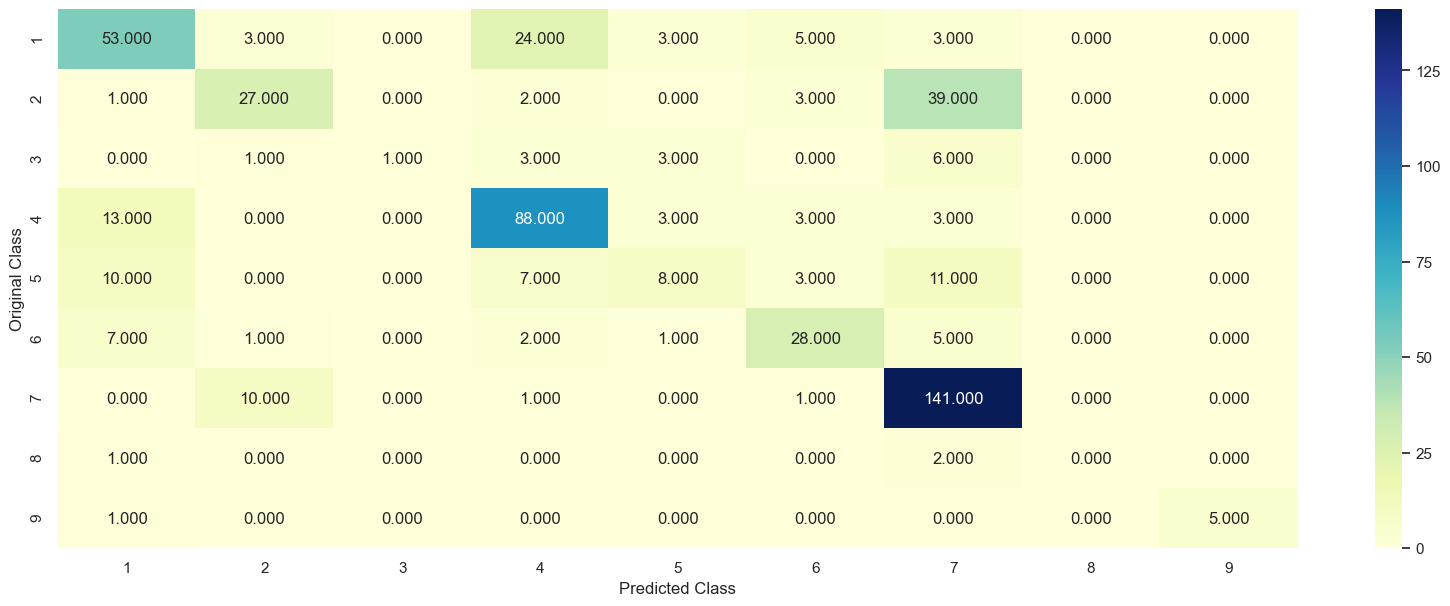

-------------------- Precision matrix (Columm Sum=1) --------------------


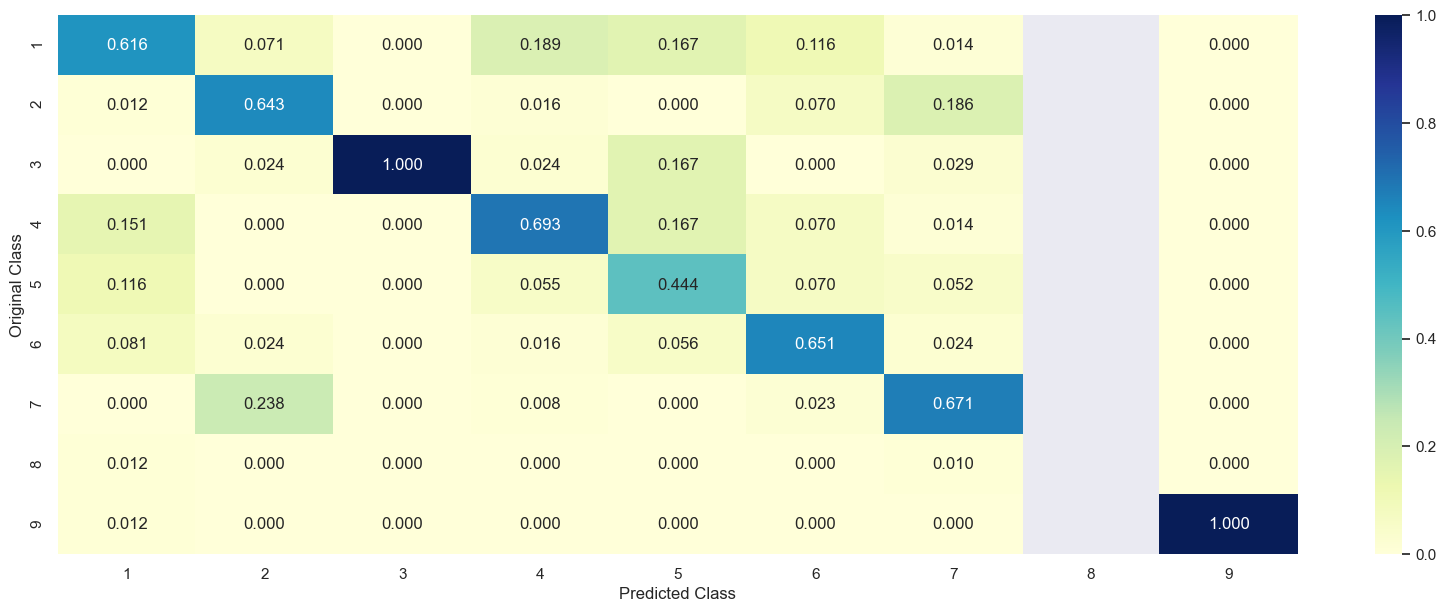

-------------------- Recall matrix (Row sum=1) --------------------


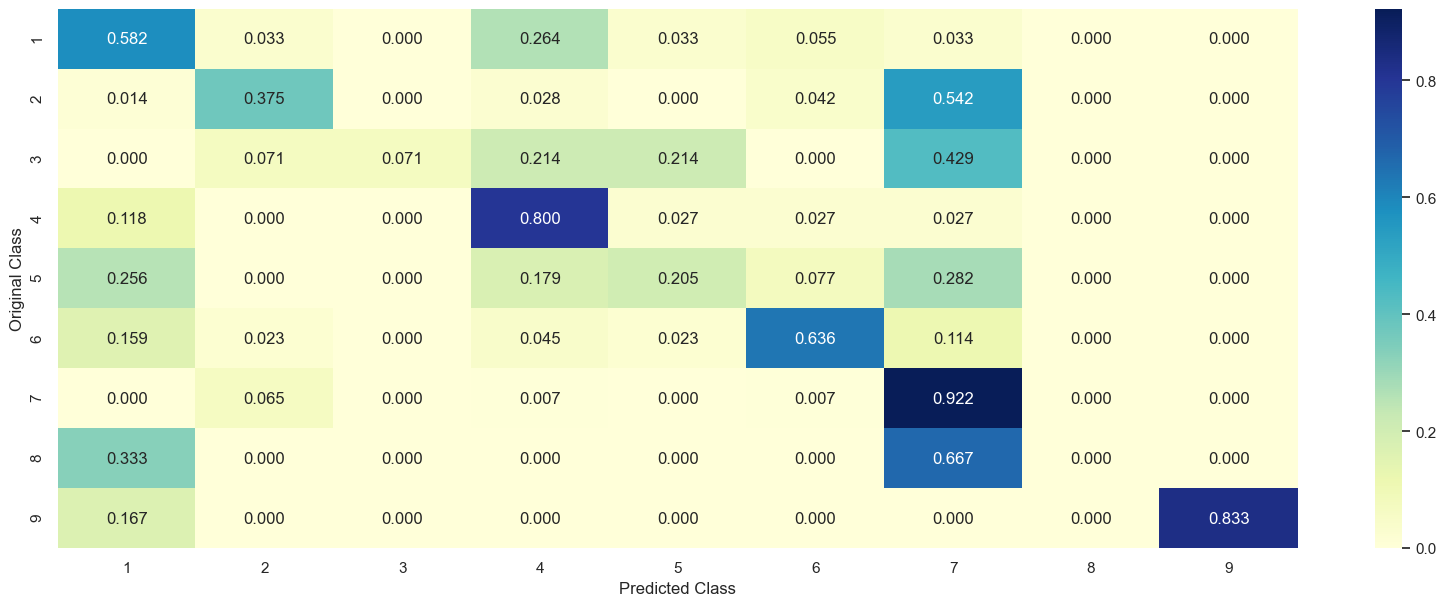

In [568]:
# Building TFIDF vectorizer model
tfidf_vec = TfidfVectorizer(min_df=4)
tfidf_train_vec = tfidf_vec.fit_transform(train_df['TEXT'])
tfidf_feat = tfidf_vec.get_feature_names()
print(tfidf_feat[:100])


# The features will be in descending order 
top1000_tfidf_feat = get_top_tf_idf_words(tfidf_vec, x=tfidf_train_vec, top_n=5000)
print(top1000_tfidf_feat[:10])
print("Total Number of unique features will be - ",len(list(set(top1000_tfidf_feat))))


# Now selecting the Top 1000 features responsible for top 1000 TFIDF value

d = defaultdict(int)
top1000_tfidf_features = []
for words in top1000_tfidf_feat:
    try:
        d[words] += 1
        if d[words] < 2 and len(top1000_tfidf_features)<1000:
            top1000_tfidf_features.append(words)
    except:
        print("Exeption raised !!")
print("The Top 10 words are : ",top1000_tfidf_features[:10])
print("Done ... ")



# Now using this top 1000 tfidf features to re-train the tfidf model
tfidf_vec = TfidfVectorizer(vocabulary=top1000_tfidf_features)
tfidf_train_vec = tfidf_vec.fit_transform(train_df['TEXT'])
tfidf_feat = tfidf_vec.get_feature_names()
print(tfidf_feat[:100])


# transforming the cv and test data
tfidf_cv_vec = tfidf_vec.transform(cv_df['TEXT'])
print("cv shape : ",tfidf_cv_vec.shape)
tfidf_test_vec = tfidf_vec.transform(test_df['TEXT'])
print("test shape : ",tfidf_test_vec.shape)





train_x_onehotCoding = hstack((train_gene_var_onehotCoding,x_train_trans,tfidf_train_vec)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding,x_test_trans,tfidf_test_vec)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding,x_cv_trans,tfidf_cv_vec)).tocsr()
cv_y = np.array(list(cv_df['Class']))



# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …]) Fit linear model with Stochastic Gradient Descent.
# predict(X)    Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])    Fit the calibrated model
# get_params([deep])    Get parameters for this estimator.
# predict(X)    Predict the target of new samples.
# predict_proba(X)  Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))






# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …]) Fit linear model with Stochastic Gradient Descent.
# predict(X)    Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

Clearly we can see that the log loss is reduced to less than 1 by using class balancing in logistic regression using all features.

In [570]:
# let's take top 2000 TFIDF features 


# https://stackoverflow.com/questions/34232190/scikit-learn-tfidfvectorizer-how-to-get-top-n-terms-with-highest-tf-idf-score
# https://stackoverflow.com/questions/52299420/scipy-csr-matrix-understand-indptr

# Building TFIDF vectorizer model
tfidf_vec = TfidfVectorizer(min_df=4,ngram_range=(1, 2))
tfidf_train_vec = tfidf_vec.fit_transform(train_df['TEXT'])
tfidf_feat = tfidf_vec.get_feature_names()
print(tfidf_feat[:100])


# The features will be in descending order 
top_tfidf_feat = get_top_tf_idf_words(tfidf_vec, x=tfidf_train_vec, top_n=10000)
print(top_tfidf_feat[:10])
print("Total Number of unique features will be - ",len(list(set(top_tfidf_feat))))
print("-"*70)


# Now selecting the Top features responsible for top 1000 TFIDF value

d = defaultdict(int)
top_tfidf_features = []
for words in top_tfidf_feat:
    try:
        d[words] += 1
        if d[words] < 2 and len(top_tfidf_features)<2000:
            top_tfidf_features.append(words)
    except:
        print("Exeption raised !!")
print("The Top 10 words are : ",top_tfidf_features[:10])
print("Done ... ")


['00', '00 00', '00 0005', '00 006', '00 02', '00 03', '00 05', '00 06', '00 08', '00 10', '00 1010', '00 11', '00 12', '00 15', '00 16', '00 17', '00 29', '00 30', '00 32', '00 34', '00 35', '00 37', '00 38', '00 47', '00 48', '00 49', '00 50', '00 52', '00 53', '00 56', '00 58', '00 60', '00 61', '00 64', '00 65', '00 67', '00 68', '00 70', '00 713', '00 74', '00 75', '00 81', '00 82', '00 84', '00 85', '00 93', '00 97', '00 99', '00 accepted', '00 associated', '00 costs', '00 deleterious', '00 doi', '00 fahsold', '00 http', '00 introduction', '00 krkljus', '00 li', '00 mb', '00 na', '00 novelc', '00 novelfigure', '00 pdgfra', '00 primer', '00 revised', '00 significantly', '00 trovo', '00 upadhyaya', '00 wild', '00 www', '000', '000 00', '000 000', '000 003', '000 005', '000 033', '000 05a', '000 10', '000 100', '000 11', '000 1167', '000 124', '000 14', '000 15', '000 150', '000 1519', '000 157', '000 17', '000 175', '000 19', '000 20', '000 200', '000 22', '000 24', '000 26', '000 

In [571]:



# Now using this top 2000 tfidf features to re-train the tfidf model
tfidf_vec = TfidfVectorizer(vocabulary=top_tfidf_features)
tfidf_train_vec = tfidf_vec.fit_transform(train_df['TEXT'])
tfidf_feat = tfidf_vec.get_feature_names()
print(tfidf_feat[:100])


# transforming the cv and test data
tfidf_cv_vec = tfidf_vec.transform(cv_df['TEXT'])
print("cv shape : ",tfidf_cv_vec.shape)
tfidf_test_vec = tfidf_vec.transform(test_df['TEXT'])
print("test shape : ",tfidf_test_vec.shape)



['fgfr3', 'braf', 'flt1', 'fat1', 'ptprd', 'elf3', 'bap1', 'ago2', 'kmt2d', 'foxa1', 'merlin', 'mef2b', 'kdm5a', 'ddr2', 'mpl', 'kdm5c', 'atr', 'fancj', 'xrcc2', 'rnf43', 'ercc3', 'pak1', 'carm1', 'ctcf', 'lkb1', 'cdk12', 'casp8', 'asxl1', 'foxp1', 'ret', 'myd88', 'fbw7', 'mga', 'rit1', 'caspase', 'fgfr2', 'brip1', 'ezh2', 'vhl', 'raf', 'hla', 'sox9', 'srsf2', 'etv6', 'ercc4', 'chek2', 'nrf2', 'gata3', 'trkb', 'atm', 'npm1', 'cbl', 'stag2', 'hnf', 'alk', 'map3k1', 'rybp', 'fgfr4', 'igf1r', 'bcor', 'btk', 'rkip', 'jak1', 'atrx', 'vegfa', 'her2', 'mll', 'ros1', 'smo', 'mycn', 'bach1', 'brd4', 'stk33', 'runx1', 'prb', 'p16', 'akt2', 'nsd2', 'dicer1', 'med12', 'smarca4', 'cbfa2', 'erbb4', 'smad4', 'etv1', 'ercc2', 'cohesin', 'tsc2', 'myc', 'pten', 'nf2', 'u2af1', 'idh1', 'ptp', 'blimp1', 'egfr', 'brca1', 'etv5', 'arid1b', 'jun']
cv shape :  (532, 2000)
test shape :  (665, 2000)


In [577]:
# let's remove the unstable variation features and see the results




# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

# x_train_binned_feat
# x_test_binned_feat

train_x_onehotCoding_1 = hstack((train_gene_feature_onehotCoding,x_train_trans,tfidf_train_vec)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_1 = hstack((test_gene_feature_onehotCoding,x_test_trans,tfidf_test_vec)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_1 = hstack((cv_gene_feature_onehotCoding,x_cv_trans,tfidf_cv_vec)).tocsr()
cv_y = np.array(list(cv_df['Class']))


print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_1.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_1.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_1.shape)




One hot encoding features :
(number of data points * number of features) in train data =  (2124, 2233)
(number of data points * number of features) in test data =  (665, 2233)
(number of data points * number of features) in cross validation data = (532, 2233)


for alpha = 1e-06
Log Loss : 1.1260357494632605
for alpha = 1e-05
Log Loss : 1.0951458277901889
for alpha = 0.0001
Log Loss : 1.0646426080769813
for alpha = 0.001
Log Loss : 1.0748281400047786
for alpha = 0.01
Log Loss : 1.2589682762162968
for alpha = 0.1
Log Loss : 1.5416945013305123
for alpha = 1
Log Loss : 1.6870963830822823
for alpha = 10
Log Loss : 1.7108306559047872
for alpha = 100
Log Loss : 1.7137689203002553


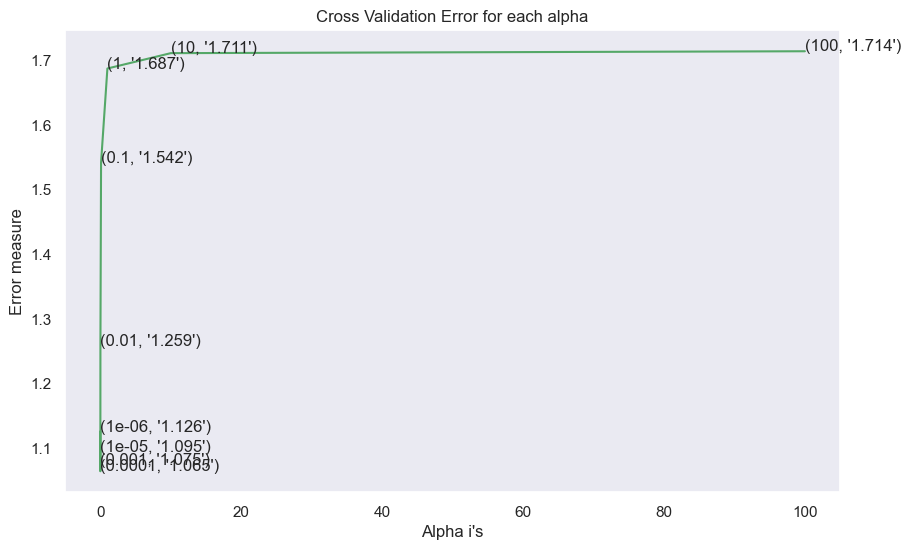

For values of best alpha =  0.0001 The train log loss is: 0.7819642385153611
For values of best alpha =  0.0001 The cross validation log loss is: 1.0646426080769813
For values of best alpha =  0.0001 The test log loss is: 1.0710692196791067
Log loss : 1.0646426080769813
Number of mis-classified points : 37.40601503759399%
-------------------- Confusion matrix --------------------


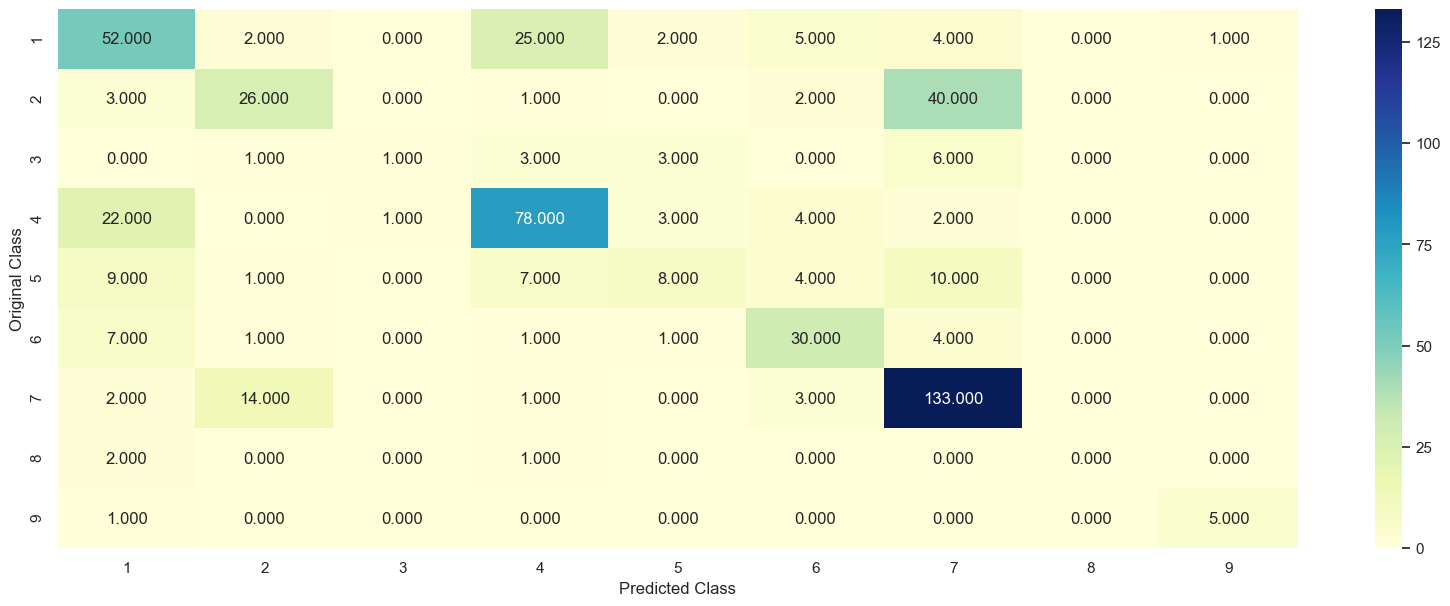

-------------------- Precision matrix (Columm Sum=1) --------------------


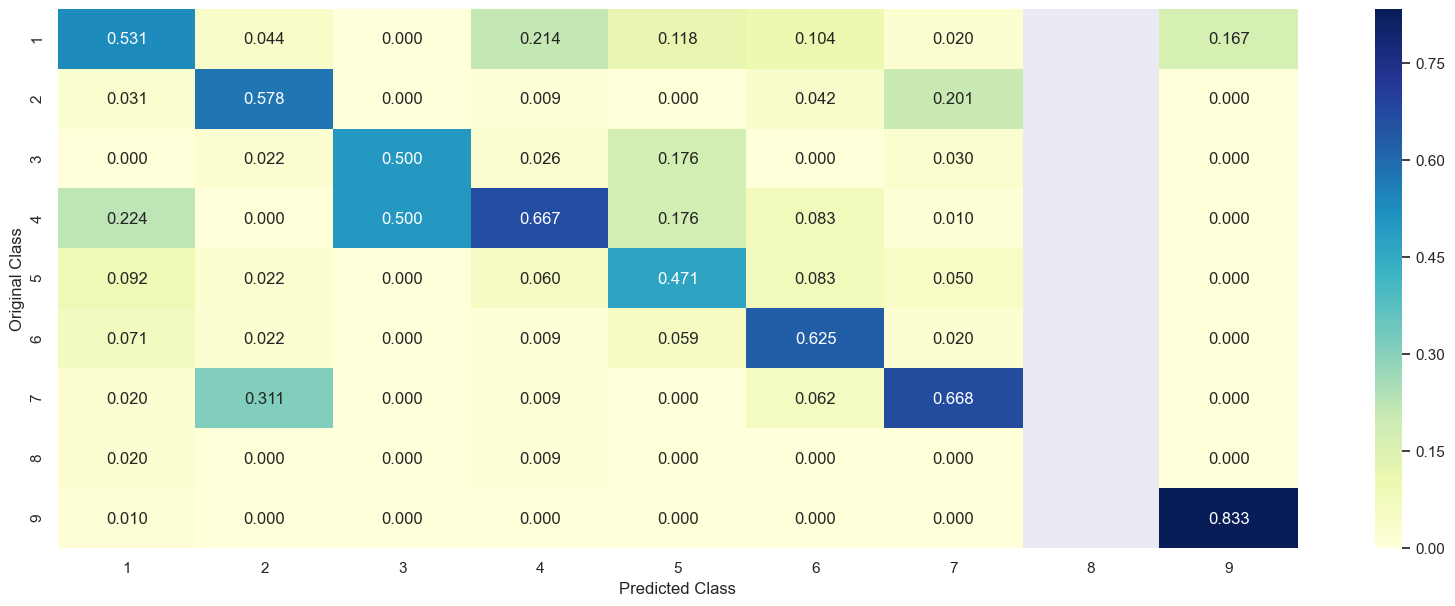

-------------------- Recall matrix (Row sum=1) --------------------


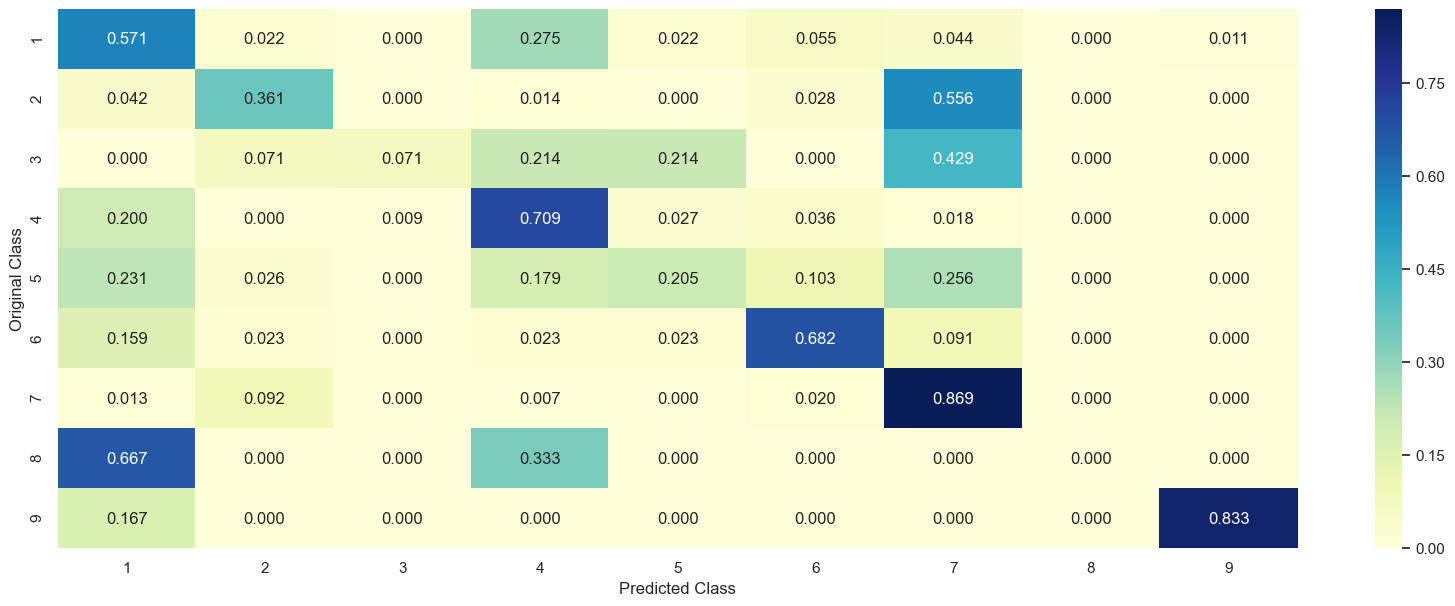

In [579]:
# let's use the logistic regression model on these features- 
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …]) Fit linear model with Stochastic Gradient Descent.
# predict(X)    Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])    Fit the calibrated model
# get_params([deep])    Get parameters for this estimator.
# predict(X)    Predict the target of new samples.
# predict_proba(X)  Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_1, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_1, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_1)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_1, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))






# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …]) Fit linear model with Stochastic Gradient Descent.
# predict(X)    Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_1, train_y, cv_x_onehotCoding_1, cv_y, clf)

The High dimensionality i.e. increase 1000 more has reduced the log loss from <1 to 1.06. 

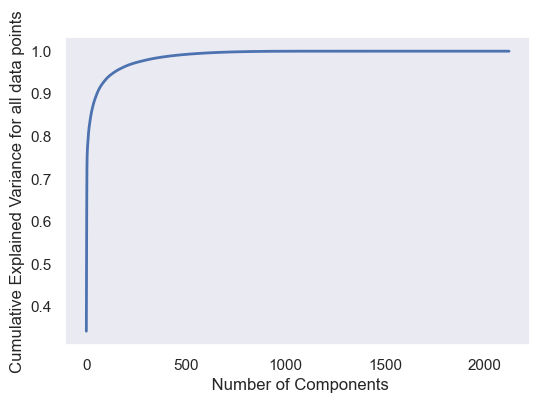

In [574]:
# Let's use the dimensionality reduction techniques like SVD to overcome the effect of overfitting. 
# ALso Our dimension is way higher than the number of data points we have.

from sklearn.decomposition import TruncatedSVD


svd = TruncatedSVD(n_components=train_x_onehotCoding_1.shape[1]-1)
svd.components_ = train_x_onehotCoding_1.shape[1]
# fitting to  Truncated SVD class
svd_data = svd.fit_transform(train_x_onehotCoding_1,y_train)

percentage_var_explained = svd.explained_variance_ratio_
cum_var_explained = np.cumsum(percentage_var_explained)

# plotting the cum_var_explained
plt.figure(1,figsize=(6,4))
plt.clf() # clear the current figure
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.ylabel("Cumulative Explained Variance for all data points")
plt.xlabel(" Number of Components")
plt.show()

In [581]:
# Amazing The 500 components are able to explain almost >90% of variance
# transforming the fitted Truncated SVD and with n_components with elbow method
svd_trunc = TruncatedSVD(n_components = 500) # preserving the variance more than 80%
svd_trunc.fit(train_x_onehotCoding_1,y_train)
# Transformation with required components
svd_train = svd_trunc.transform(train_x_onehotCoding_1)
svd_cv = svd_trunc.transform(cv_x_onehotCoding_1)
svd_test = svd_trunc.transform(test_x_onehotCoding_1)

In [591]:
# Let's select the tree based algorithm here and see the results as our final dimensionality is fairly low now- 
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(svd_train, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(svd_train, train_y)
        sig_clf_probs = sig_clf.predict_proba(svd_cv)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(svd_train, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(svd_train, train_y)

predict_y = sig_clf.predict_proba(svd_train)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(svd_cv)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(svd_test)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.131119129539377
for n_estimators = 100 and max depth =  10
Log Loss : 1.0671729570681205
for n_estimators = 200 and max depth =  5
Log Loss : 1.1084827067430192
for n_estimators = 200 and max depth =  10
Log Loss : 1.0578354159844172
for n_estimators = 500 and max depth =  5
Log Loss : 1.0981018311299158
for n_estimators = 500 and max depth =  10
Log Loss : 1.0506271327555778
for n_estimators = 1000 and max depth =  5
Log Loss : 1.0937416265379372
for n_estimators = 1000 and max depth =  10
Log Loss : 1.0498929902280105
for n_estimators = 2000 and max depth =  5
Log Loss : 1.0927711645635756
for n_estimators = 2000 and max depth =  10
Log Loss : 1.0495082465223724
For values of best estimator =  2000 The train log loss is: 0.5784988904259469
For values of best estimator =  2000 The cross validation log loss is: 1.0495082465223724
For values of best estimator =  2000 The test log loss is: 1.0769666517846876


The log is still same, Here we have found that variation is also an important features. Let's take top 10 variation features into consideration. Also, We can do feature engineering to make less class data points more stable by using encoding only those variation feature which are in minority. But let's focus on reducing log loss for a while.

In [665]:
# Building TFIDF vectorizer model
tfidf_vec = TfidfVectorizer(min_df=4)
tfidf_train_vec = tfidf_vec.fit_transform(train_df['TEXT'])
tfidf_feat = tfidf_vec.get_feature_names()
print(tfidf_feat[:100])


# The features will be in descending order 
top1000_tfidf_feat = get_top_tf_idf_words(tfidf_vec, x=tfidf_train_vec, top_n=5000)
print(top1000_tfidf_feat[:10])
print("Total Number of unique features will be - ",len(list(set(top1000_tfidf_feat))))


# Now selecting the Top 1000 features responsible for top 1000 TFIDF value

d = defaultdict(int)
top1000_tfidf_features = []
for words in top1000_tfidf_feat:
    try:
        d[words] += 1
        if d[words] < 2 and len(top1000_tfidf_features)<1000:
            top1000_tfidf_features.append(words)
    except:
        print("Exeption raised !!")
print("The Top 10 words are : ",top1000_tfidf_features[:10])
print("Done ... ")



# Now using this top 1000 tfidf features to re-train the tfidf model
tfidf_vec = TfidfVectorizer(vocabulary=top1000_tfidf_features)
tfidf_train_vec = tfidf_vec.fit_transform(train_df['TEXT'])
tfidf_feat = tfidf_vec.get_feature_names()
print(tfidf_feat[:100])


# transforming the cv and test data
tfidf_cv_vec = tfidf_vec.transform(cv_df['TEXT'])
print("cv shape : ",tfidf_cv_vec.shape)
tfidf_test_vec = tfidf_vec.transform(test_df['TEXT'])
print("test shape : ",tfidf_test_vec.shape)


['00', '000', '0000001', '000001', '000002', '000007', '00001', '000011', '000012', '00002644', '00005', '000059', '000077', '0001', '000132', '00014', '000141', '000179', '0002', '0002158', '000245', '000249', '000251', '000258', '000267', '00029', '0003', '000369266', '00037', '0004', '0005', '000535', '000548', '000588', '0006', '0007', '0008', '00088', '0009', '000g', '000xg', '001', '0010', '0011', '001198', '0012', '001210', '0013', '0014', '0015', '0016', '001635', '001654', '0017', '0018', '001810', '0019', '001a', '002', '0021', '0022', '0023', '0024', '0025', '0025021', '0026', '0027', '002755', '0028', '002a', '003', '0030', '003008', '003133', '0032', '0033', '003333', '0034', '0035', '0036', '003797', '0038', '0039', '003a', '004', '0041', '0043', '004304', '00433', '004333', '0044', '004448', '004456', '0045', '0048', '004927', '004972', '004985', '005', '005026']
['fgfr3' 'braf' 'ptprd' 'flt1' 'fat1' 'fat1' 'ptprd' 'bap1' 'merlin'
 'elf3']
Total Number of unique features

In [781]:
temp = np.array(train_df['Variation'].value_counts()[:10].index)

train_df.apply(lambda x: x['Variation'] if (x['Variation'] in temp) else 'Others',axis=1).value_counts()

Others                  1957
Truncating_Mutations      57
Amplification             41
Deletion                  40
Fusions                   17
T286A                      2
Q61R                       2
Q61L                       2
Q22K                       2
A146T                      2
Y64A                       2
dtype: int64

In [782]:
# let's change the variation features 
train_df_temp = train_df.copy()
cv_df_temp = cv_df.copy()
test_df_temp = test_df.copy()

train_df_temp['top_var_feature'] = train_df_temp.apply(lambda x: x['Variation'] if (x['Variation'] in temp) else 'Others',axis=1)

cv_df_temp['top_var_feature'] = cv_df_temp.apply(lambda x: x['Variation'] if (x['Variation'] in temp) else 'Others',axis=1)

test_df_temp['top_var_feature'] = test_df_temp.apply(lambda x: x['Variation'] if (x['Variation'] in temp) else 'Others',axis=1)

# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding_ = variation_vectorizer.fit_transform(train_df_temp['top_var_feature'])
test_variation_feature_onehotCoding_ = variation_vectorizer.transform(test_df_temp['top_var_feature'])
cv_variation_feature_onehotCoding_ = variation_vectorizer.transform(cv_df_temp['top_var_feature'])

variation_vectorizer.get_feature_names()

['a146t',
 'amplification',
 'deletion',
 'fusions',
 'others',
 'q22k',
 'q61l',
 'q61r',
 't286a',
 'truncating_mutations',
 'y64a']

In [783]:
# stack these features together




# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding_))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding_))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding_))

# x_train_binned_feat
# x_test_binned_feat

train_x_onehotCoding_1 = hstack((train_gene_var_onehotCoding,x_train_trans,tfidf_train_vec)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_1 = hstack((test_gene_var_onehotCoding,x_test_trans,tfidf_test_vec)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_1 = hstack((cv_gene_var_onehotCoding,x_cv_trans,tfidf_cv_vec)).tocsr()
cv_y = np.array(list(cv_df['Class']))


print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_1.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_1.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_1.shape)




One hot encoding features :
(number of data points * number of features) in train data =  (2124, 1244)
(number of data points * number of features) in test data =  (665, 1244)
(number of data points * number of features) in cross validation data = (532, 1244)


for alpha = 1e-06
Log Loss : 1.1029284869256657
for alpha = 1e-05
Log Loss : 1.061931864002538
for alpha = 0.0001
Log Loss : 0.9974381656688663
for alpha = 0.001
Log Loss : 1.0309171229897809
for alpha = 0.01
Log Loss : 1.3114777819488284
for alpha = 0.1
Log Loss : 1.6771784740465705
for alpha = 1
Log Loss : 1.7615880881562287
for alpha = 10
Log Loss : 1.7697241268142831
for alpha = 100
Log Loss : 1.7706160733263834


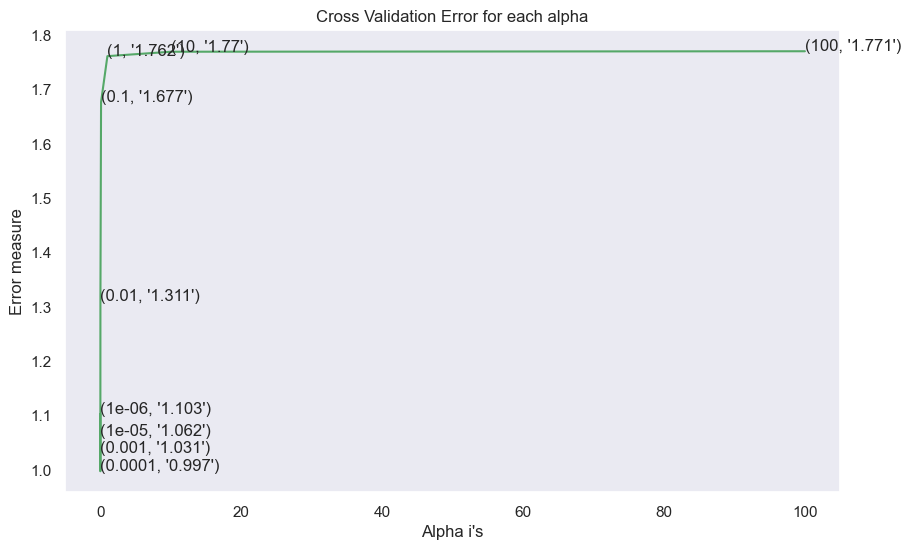

For values of best alpha =  0.0001 The train log loss is: 0.7260995149764201
For values of best alpha =  0.0001 The cross validation log loss is: 0.9974381656688663
For values of best alpha =  0.0001 The test log loss is: 0.9920764595196043
Log loss : 0.9974381656688663
Number of mis-classified points : 34.3984962406015%
-------------------- Confusion matrix --------------------


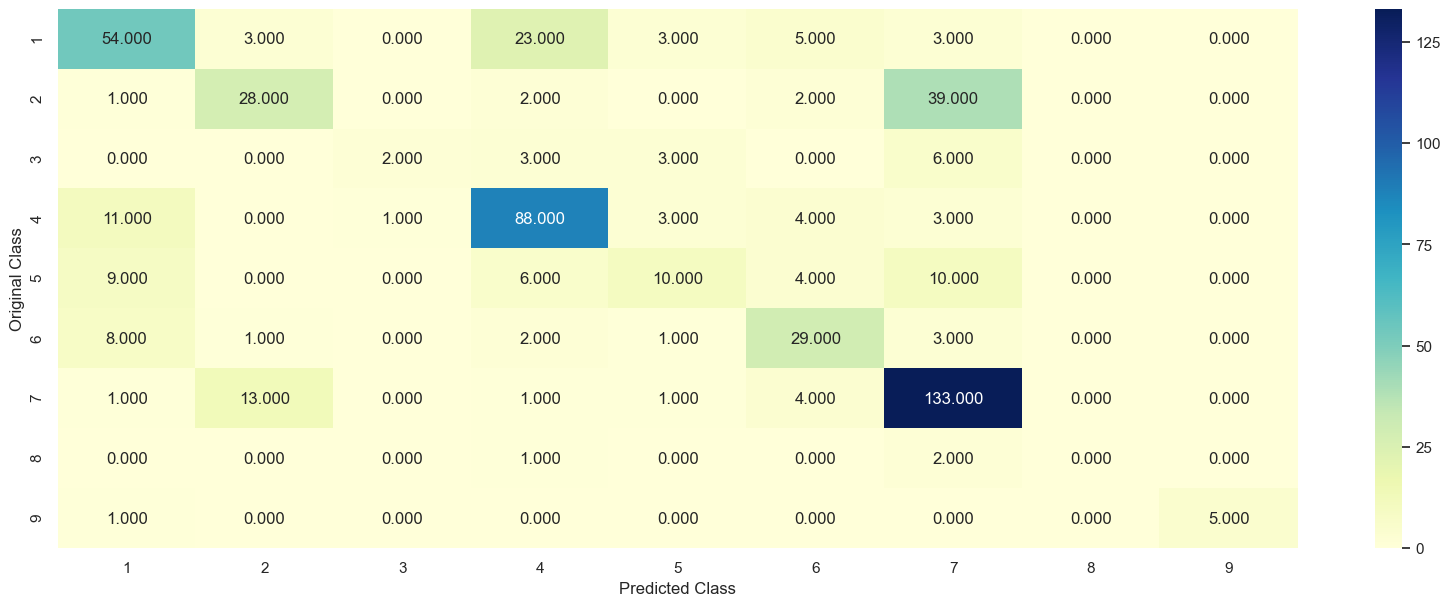

-------------------- Precision matrix (Columm Sum=1) --------------------


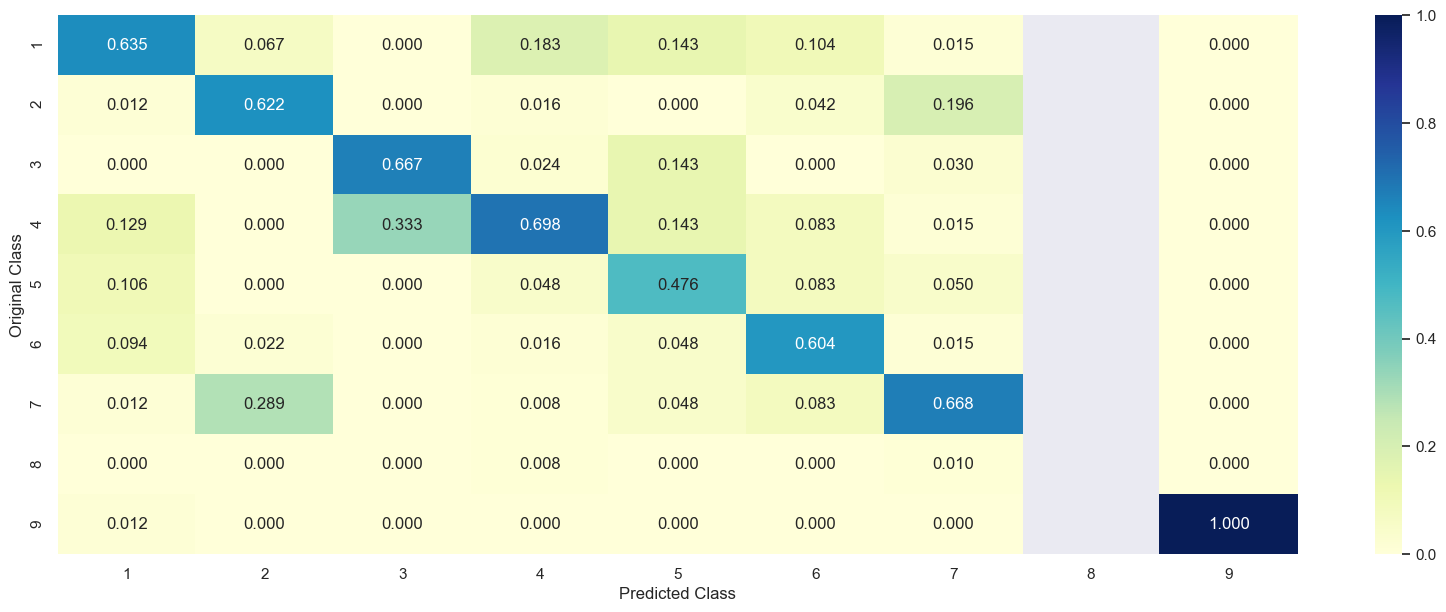

-------------------- Recall matrix (Row sum=1) --------------------


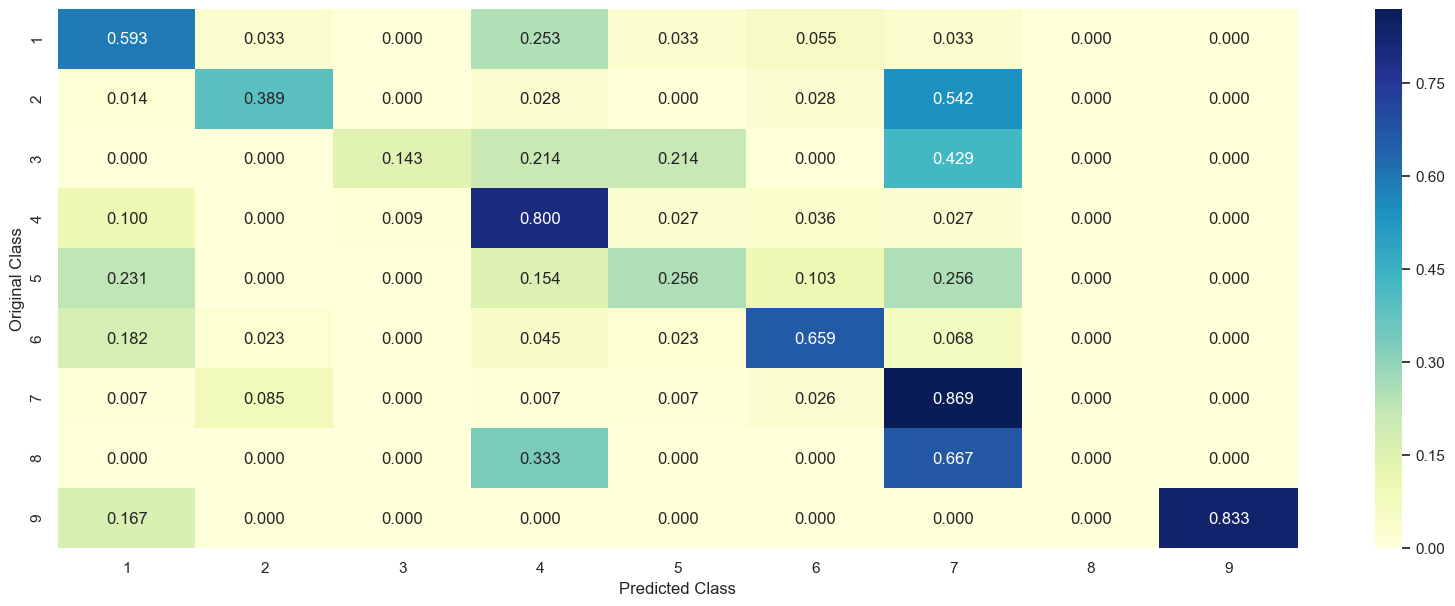

In [785]:
# let's use the logistic regression model on these features- 
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …]) Fit linear model with Stochastic Gradient Descent.
# predict(X)    Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])    Fit the calibrated model
# get_params([deep])    Get parameters for this estimator.
# predict(X)    Predict the target of new samples.
# predict_proba(X)  Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_1, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_1, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_1)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_1, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))






# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …]) Fit linear model with Stochastic Gradient Descent.
# predict(X)    Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_1, train_y, cv_x_onehotCoding_1, cv_y, clf)

In [790]:
# let's pick the top 5 value of each class

no_feat = 3
temp = []
for i in range(1,10):
    temp.extend(list(train_df[train_df['Class']==i]['Variation'].value_counts()[:no_feat].index))

In [791]:
# let's change the variation features 
train_df_temp = train_df.copy()
cv_df_temp = cv_df.copy()
test_df_temp = test_df.copy()

train_df_temp['top_var_feature'] = train_df_temp.apply(lambda x: x['Variation'] if (x['Variation'] in temp) else 'Others',axis=1)

cv_df_temp['top_var_feature'] = cv_df_temp.apply(lambda x: x['Variation'] if (x['Variation'] in temp) else 'Others',axis=1)

test_df_temp['top_var_feature'] = test_df_temp.apply(lambda x: x['Variation'] if (x['Variation'] in temp) else 'Others',axis=1)

# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding_ = variation_vectorizer.fit_transform(train_df_temp['top_var_feature'])
test_variation_feature_onehotCoding_ = variation_vectorizer.transform(test_df_temp['top_var_feature'])
cv_variation_feature_onehotCoding_ = variation_vectorizer.transform(cv_df_temp['top_var_feature'])

variation_vectorizer.get_feature_names()

['a19v',
 'a727v',
 'amplification',
 'c1767s',
 'd1280v',
 'deletion',
 'e475k',
 'fusions',
 'g1706a',
 'g35r',
 'g44s',
 'k62r',
 'k666m',
 'others',
 'promoter_hypermethylation',
 'q209l',
 'q61r',
 'r2505',
 'r625d',
 's492r',
 'truncating_mutations',
 'v1804a',
 'v289f',
 'v536m']

In [792]:
# stack these features together




# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding_))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding_))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding_))

# x_train_binned_feat
# x_test_binned_feat

train_x_onehotCoding_1 = hstack((train_gene_var_onehotCoding,x_train_trans,tfidf_train_vec)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_1 = hstack((test_gene_var_onehotCoding,x_test_trans,tfidf_test_vec)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_1 = hstack((cv_gene_var_onehotCoding,x_cv_trans,tfidf_cv_vec)).tocsr()
cv_y = np.array(list(cv_df['Class']))


print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_1.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_1.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_1.shape)




One hot encoding features :
(number of data points * number of features) in train data =  (2124, 1257)
(number of data points * number of features) in test data =  (665, 1257)
(number of data points * number of features) in cross validation data = (532, 1257)


for alpha = 1e-06
Log Loss : 1.084783582905763
for alpha = 1e-05
Log Loss : 1.0881123123474072
for alpha = 0.0001
Log Loss : 1.0006921717214567
for alpha = 0.001
Log Loss : 1.02803025324758
for alpha = 0.01
Log Loss : 1.320405704166284
for alpha = 0.1
Log Loss : 1.6845540541756763
for alpha = 1
Log Loss : 1.7640922483087347
for alpha = 10
Log Loss : 1.7714292540434133
for alpha = 100
Log Loss : 1.7722142160958738


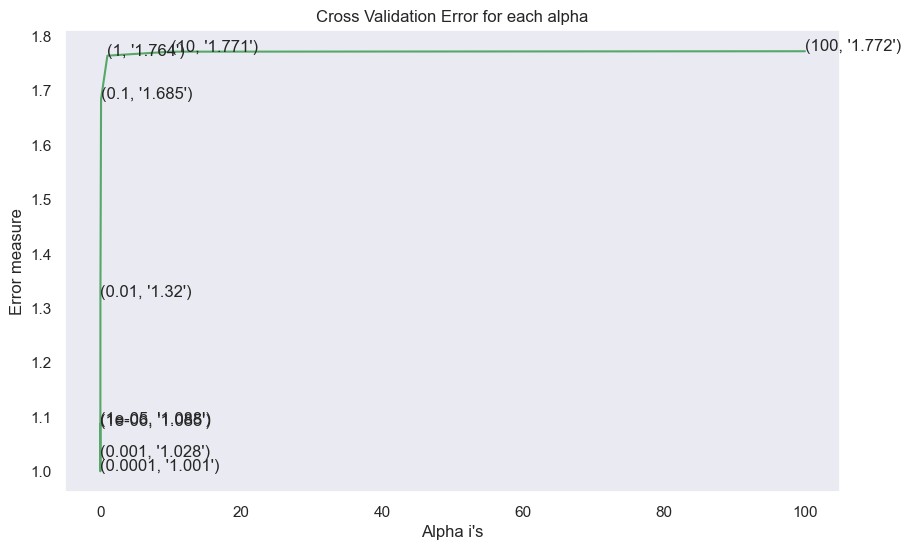

For values of best alpha =  0.0001 The train log loss is: 0.7216617229872674
For values of best alpha =  0.0001 The cross validation log loss is: 1.0006921717214567
For values of best alpha =  0.0001 The test log loss is: 0.9989548050833262
Log loss : 1.0006921717214567
Number of mis-classified points : 34.58646616541353%
-------------------- Confusion matrix --------------------


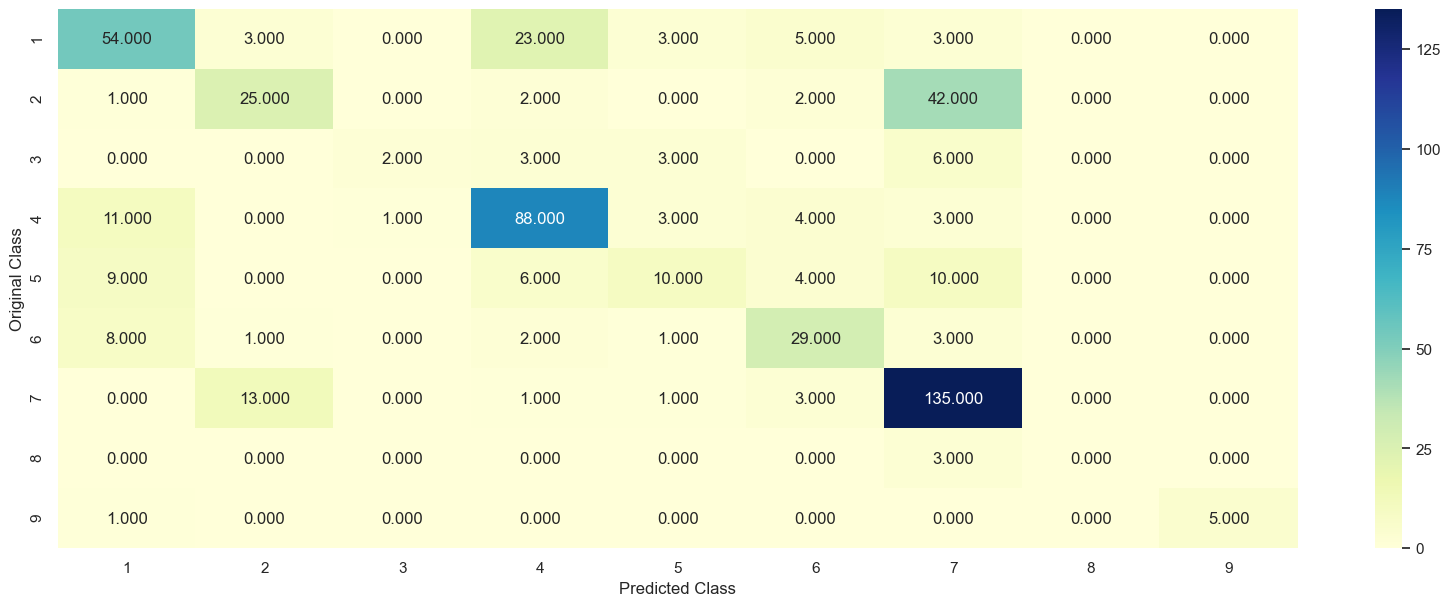

-------------------- Precision matrix (Columm Sum=1) --------------------


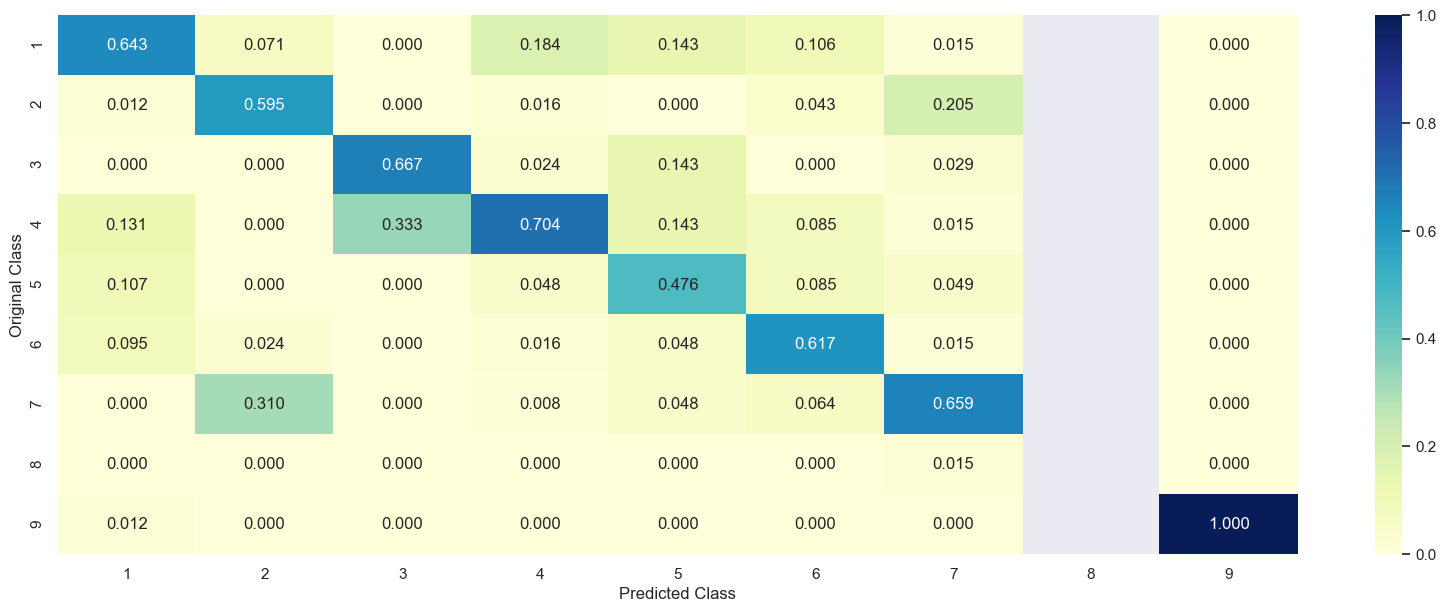

-------------------- Recall matrix (Row sum=1) --------------------


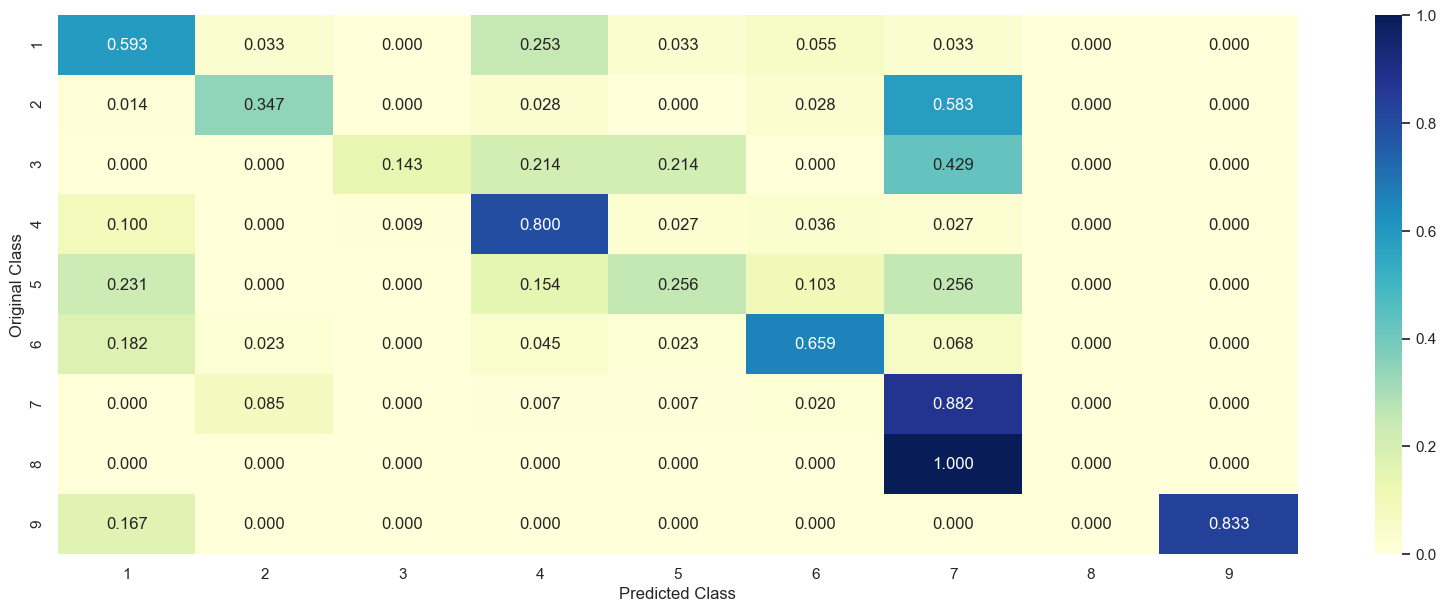

In [793]:
# let's use the logistic regression model on these features- 
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …]) Fit linear model with Stochastic Gradient Descent.
# predict(X)    Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])    Fit the calibrated model
# get_params([deep])    Get parameters for this estimator.
# predict(X)    Predict the target of new samples.
# predict_proba(X)  Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_1, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_1, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_1)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_1, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_1, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))






# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …]) Fit linear model with Stochastic Gradient Descent.
# predict(X)    Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_1, train_y, cv_x_onehotCoding_1, cv_y, clf)

In [796]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ['Model Name','Encoding','Test Log Loss','missclassfied points']

x.add_row(['naive bayes','BOW','1.15','34.96%'])
x.add_row(['KNN','response coding','0.98','34.02%'])
x.add_row(['Logistic Regression (Balanced)','BOW','0.99','34.02%'])
x.add_row(['Logistic Regression (Un Balanced)','BOW','1.0132','34.96%'])
x.add_row(['SVM','BOW','1.033','33.83%'])
x.add_row(['Random Forest','BOW','1.059','35.71%'])
x.add_row(['Random Forest','Response coding','1.29','43.60%'])
x.add_row(['Stacking Classifier','BOW','1.15','35.33%'])
x.add_row(['Voting Clf','BOW','1.20','36.09%'])
x.add_row(['LR (1,2) gram','BOW','1.006',"--"])
x.add_row(['LR Top 10 var feature','BOW','0.99','34.49%'])

print(x)


+-----------------------------------+-----------------+---------------+----------------------+
|             Model Name            |     Encoding    | Test Log Loss | missclassfied points |
+-----------------------------------+-----------------+---------------+----------------------+
|            naive bayes            |       BOW       |      1.15     |        34.96%        |
|                KNN                | response coding |      0.98     |        34.02%        |
|   Logistic Regression (Balanced)  |       BOW       |      0.99     |        34.02%        |
| Logistic Regression (Un Balanced) |       BOW       |     1.0132    |        34.96%        |
|                SVM                |       BOW       |     1.033     |        33.83%        |
|           Random Forest           |       BOW       |     1.059     |        35.71%        |
|           Random Forest           | Response coding |      1.29     |        43.60%        |
|        Stacking Classifier        |       BOW   

## Conclusion
* The Logistic Regression and KNN is winner here as their performance is almost similar.
* The NB model tends to highly misclassify class 3 
* For KNN model class 8 is highly missclassified and class(2,7) and (2,8) are also miss classifying.
* For LR balanced model tends miss higly classify class 8 and class (7,8) and (2,7).
* For SVM models class 3 and 8 are missclassifying.
* Random response coding is the worst performer of all as the missclassification rate is above 40%.
* The ensemble technique i.e. stacking or voting have some what similar performance, However stacking classifier tends to perform slighly better.
* At last we found the less data points and high dimension is major problems here for most of the ML algorithms, So we removed the variation feature and found out the log loss is staying near 1 but it's not decreasing. So we built a new feature of taking only top 10 variation features and considering other to one single value i.e. "other" has redued our logg loss less than 1. 
* Clearly most of the algorithms get confused with class 2,7,8,3 due to lack of data of the similarity of mutations, for that we need stronger features than find the dis similarity. We might need the help domain expert in this pathologist.
